# Machine Learning Project

**Yasmine Boulkaid**
, **Edda Iveland**, **Vilde Opdal**
et **Laura Vazquez**

### Introduction

The objective of this project is to predict the variable Value-co2-emissions from the "Global Data on Sustainable Energy" dataset sourced from the KAGGLE competition website. We will achieve this by evaluating the performance of different machine learning regression methods.

We will firstly get familiarized with the dataset and prepare it for the modelisation stage, then explore different types of regression methods. After, we will compare the different methods used, and draw conclusions. As a final stage, we will amputate the dataset with replacements for missing values and compare the performance of regression methods used on this new dataset.


In [ ]:
#installing nescessary packages
install.packages('ggplot2')
install.packages('reshape2')
install.packages('gridExtra')
install.packages("reticulate")
install.packages("tidyverse")
install.packages("GGally")
install.packages("plotly")
install.packages("factoextra")
install.packages("FactoMineR")
install.packages("corrplot")
install.packages("glmnet")
install.packages("ggfortify")
install.packages("pROC")
install.packages("e1071")
install.packages("ROCR")
install.packages("caret")
install.packages("lattice")
install.packages("rpart.plot")
install.packages("partykit")
install.packages("grid")
install.packages("libcoin")
install.packages("mvtnorm")
install.packages("randomForest")
install.packages("ggRandomForests")
install.packages("gbm")
install.packages("MASS")
install.packages("Metrics")
#install.packages("nnet")
install.packages("missForest")
install.packages("VIM")
install.packages("naniar")
install.packages('lattice') 
install.packages('caTools') 
install.packages("Metrics")
install.packages("Amelia")
install.packages("DALEX")
install.packages("nnet")
install.packages("tidyverse")

In [ ]:
library(reticulate)
library(ggplot2)
library(tidyverse)
library(gridExtra)
library(GGally)
library(plotly)
# PARTIE 1
library(corrplot)
library(reshape2)
library(FactoMineR)
library(factoextra)
library(glmnet)
library(ggfortify)
library(pROC)
# PARTIE 2
library(e1071)
library(ROCR)
library(rpart) 
library(rpart.plot)
#library(lattice)
#library(caret)
library(grid)
library(libcoin)
library(mvtnorm)
library(partykit)
library(randomForest)
library(ggRandomForests)
library(gbm)
library(MASS)
library(nnet)
library(Metrics)
library(missForest)
library(VIM)
#library(naniar)
library(Amelia)
library(caTools) 
library(class) 
library(caret)
library(Metrics) 
library(DALEX)
library(MASS)
library(nnet)

## Exploratory analysis of the data

### Unidimensional analysis

#### Question 1

In [2]:
# Download data
path <- ""
data <- read.csv(paste(path, "global-data-on-sustainable-energy (1).csv", sep = ""),
                    sep = ",", header = TRUE)

# Printing data
head(data)
summary(data)

Entity      Year Access.to.electricity....of.population.
1 Afghanistan 2000  1.613591                              
2 Afghanistan 2001  4.074574                              
3 Afghanistan 2002  9.409158                              
4 Afghanistan 2003 14.738506                              
5 Afghanistan 2004 20.064968                              
6 Afghanistan 2005 25.390894                              
  Access.to.clean.fuels.for.cooking
1  6.2                             
2  7.2                             
3  8.2                             
4  9.5                             
5 10.9                             
6 12.2                             
  Renewable.electricity.generating.capacity.per.capita
1 9.22                                                
2 8.86                                                
3 8.47                                                
4 8.09                                                
5 7.75                                                
6 7.51                                                
  Financial.flows.to.developing.countries..US...
1    20000                                      
2   130000                                      
3  3950000                                      
4 25970000                                      
5       NA                                      
6  9830000                                      
  Renewable.energy.share.in.the.total.final.energy.consumption....
1 44.99                                                           
2 45.60                                                           
3 37.83                                                           
4 36.66                                                           
5 44.24                                                           
6 33.88                                                           
  Electricity.from.fossil.fuels..TWh. Electricity.from.nuclear..TWh.
1 0.16                                0                             
2 0.09                                0                             
3 0.13                                0                             
4 0.31                                0                             
5 0.33                                0                             
6 0.34                                0                             
  Electricity.from.renewables..TWh. ⋯
1 0.31                              ⋯
2 0.50                              ⋯
3 0.56                              ⋯
4 0.63                              ⋯
5 0.56                              ⋯
6 0.59                              ⋯
  Primary.energy.consumption.per.capita..kWh.person.
1 302.5948                                          
2 236.8919                                          
3 210.8622                                          
4 229.9682                                          
5 204.2312                                          
6 252.0691                                          
  Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.
1 1.64                                                       
2 1.74                                                       
3 1.40                                                       
4 1.40                                                       
5 1.20                                                       
6 1.41                                                       
  Value_co2_emissions_kt_by_country Renewables....equivalent.primary.energy.
1  760                              NA                                      
2  730                              NA                                      
3 1030                              NA                                      
4 1220                              NA                                      
5 1030                              NA                                      
6 1550                              NA                                      
  gdp_growth gdp_per_capita Density.n.P.Km2. La

    Entity               Year      Access.to.electricity....of.population.
 Length:3649        Min.   :2000   Min.   :  1.252                        
 Class :character   1st Qu.:2005   1st Qu.: 59.801                        
 Mode  :character   Median :2010   Median : 98.362                        
                    Mean   :2010   Mean   : 78.934                        
                    3rd Qu.:2015   3rd Qu.:100.000                        
                    Max.   :2020   Max.   :100.000                        
                                   NA's   :10                             
 Access.to.clean.fuels.for.cooking
 Min.   :  0.00                   
 1st Qu.: 23.18                   
 Median : 83.15                   
 Mean   : 63.26                   
 3rd Qu.:100.00                   
 Max.   :100.00                   
 NA's   :169                      
 Renewable.electricity.generating.capacity.per.capita
 Min.   :   0.00                                     
 1st Qu.:   

In [3]:
# Changing the type of qualitative variables into factors
# data[, "Entity"] <- as.factor(data[, "Entity"])
#data[, "Year"] <- as.factor(data[, "Year"])
year <- as.factor(data$Year)
data[, "Density.n.P.Km2."] <-as.numeric(gsub(",",".",data$Density.n.P.Km2.))

#### Question 2

In the next section, we look for missing values in the dataset

In [4]:
# Count the number of missing values in the entire data frame
num_missing = sum(is.na(data))
print(num_missing)


[1] 6978


In [5]:
# Checking which columbs are missing values
for (col_name in colnames(data)) {
  print(paste(col_name))
  print(sum(is.na(data[[col_name]])))
}

[1] "Entity"
[1] 0
[1] "Year"
[1] 0
[1] "Access.to.electricity....of.population."
[1] 10
[1] "Access.to.clean.fuels.for.cooking"
[1] 169
[1] "Renewable.electricity.generating.capacity.per.capita"
[1] 931
[1] "Financial.flows.to.developing.countries..US..."
[1] 2089
[1] "Renewable.energy.share.in.the.total.final.energy.consumption...."
[1] 194
[1] "Electricity.from.fossil.fuels..TWh."
[1] 21
[1] "Electricity.from.nuclear..TWh."
[1] 126
[1] "Electricity.from.renewables..TWh."
[1] 21
[1] "Low.carbon.electricity....electricity."
[1] 42
[1] "Primary.energy.consumption.per.capita..kWh.person."
[1] 0
[1] "Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP."
[1] 207
[1] "Value_co2_emissions_kt_by_country"
[1] 428
[1] "Renewables....equivalent.primary.energy."
[1] 2137
[1] "gdp_growth"
[1] 317
[1] "gdp_per_capita"
[1] 282
[1] "Density.n.P.Km2."
[1] 1
[1] "Land.Area.Km2."
[1] 1
[1] "Latitude"
[1] 1
[1] "Longitude"
[1] 1


** Many variables are have a big nuber of NA values in the current dataset, we therefore delete the following variables from the dataset: **

* Renewable-electricity-generating-capacity-per-capitacapitacapitacapita

*   Financial flows to developing countries (US Dollars)
*
Renewables (% equivalent primary energy).

We also remove "Electricity from fossil fuels" as it contributed to the variable to explain a lot more than the other variables.

In [6]:
# Columns to remove
columns_to_remove = c("Electricity.from.fossil.fuels..TWh.","Financial.flows.to.developing.countries..US...", "Renewable.electricity.generating.capacity.per.capita", "Renewables....equivalent.primary.energy.")
#Financial
data <- read.csv(paste(path, "global-data-on-sustainable-energy (1).csv", sep = ""),
                   sep = ",", header = TRUE)
year <- as.factor(data$Year)
data[, "Density.n.P.Km2."] <-as.numeric(gsub(",",".",data$Density.n.P.Km2.))

# Removeing the specified columns from the data frame
data = data[, -which(names(data) %in% columns_to_remove)]
head(data)


Entity      Year Access.to.electricity....of.population.
1 Afghanistan 2000  1.613591                              
2 Afghanistan 2001  4.074574                              
3 Afghanistan 2002  9.409158                              
4 Afghanistan 2003 14.738506                              
5 Afghanistan 2004 20.064968                              
6 Afghanistan 2005 25.390894                              
  Access.to.clean.fuels.for.cooking
1  6.2                             
2  7.2                             
3  8.2                             
4  9.5                             
5 10.9                             
6 12.2                             
  Renewable.energy.share.in.the.total.final.energy.consumption....
1 44.99                                                           
2 45.60                                                           
3 37.83                                                           
4 36.66                                                           
5 44.24                                                           
6 33.88                                                           
  Electricity.from.nuclear..TWh. Electricity.from.renewables..TWh.
1 0                              0.31                             
2 0                              0.50                             
3 0                              0.56                             
4 0                              0.63                             
5 0                              0.56                             
6 0                              0.59                             
  Low.carbon.electricity....electricity.
1 65.95744                              
2 84.74577                              
3 81.15942                              
4 67.02128                              
5 62.92135                              
6 63.44086                              
  Primary.energy.consumption.per.capita..kWh.person.
1 302.5948                                          
2 236.8919                                          
3 210.8622                                          
4 229.9682                                          
5 204.2312                                          
6 252.0691                                          
  Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.
1 1.64                                                       
2 1.74                                                       
3 1.40                                                       
4 1.40                                                       
5 1.20                                                       
6 1.41                                                       
  Value_co2_emissions_kt_by_country gdp_growth gdp_per_capita Density.n.P.Km2.
1  760                                     NA        NA       60              
2  730                                     NA        NA       60              
3 1030                                     NA  179.4266       60              
4 1220                               8.832278  190.6838       60              
5 1030                               1.414118  211.3821       60              
6 1550                              11.229715  242.0313       60              
  Land.Area.Km2. Latitude Longitude
1 652230         33.93911 67.70995 
2 652230         33.93911 67.70995 
3 652230         33.93911 67.70995 
4 652230         33.93911 67.70995 
5 652230         33.93911 67.70995 
6 652230         33.93911 67.70995

#### Question 3

For the rest of this project, we decided to use a data set containing only individuals with no missing values. This leaves 2868 observations, which is verified bellow.

In [7]:
print('Dimension of the original data set')
dim(data)
data_complete = data[complete.cases(data), ]
print('Dimension of the new data set')
dim(data_complete)
data_for_Partie2 = data
data=data_complete

[1] "Dimension of the original data set"


[1] 3649   17

[1] "Dimension of the new data set"


[1] 2868   17


By removing lines from the dataset with missing data, we lose 781 observations. Although we are still left with a relatively large dataset, this is a large amount of data. Later in the project, we will investigate whether imputation of data can allow us to keep the original amount of data.

#### Question 4
We begin by unidimentional descriptive analysis of the data. Looking at the qualitative variables: Entity and Year, what is noticable is that not every country has data from all the years between 2000 and 2020. To discover what countries are affected, we will do a barplot of all the countries that is missing at least a year. 

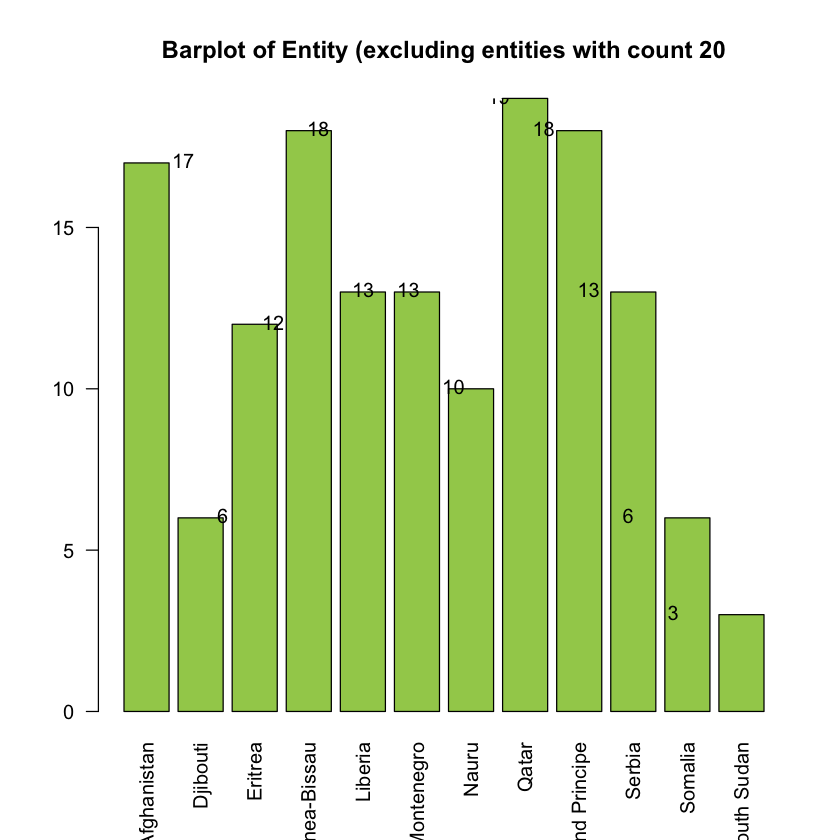

In [8]:
# Assuming 'data' is your data frame
entity_counts <- table(data$Entity)

# Set the threshold for the minimum number of appearances
appearance_threshold <- 20

# Get entities with count not equal to the threshold
filtered_entities <- names(entity_counts[entity_counts != appearance_threshold])

# Filter data for entities with count not equal to the threshold
filtered_data <- data[data$Entity %in% filtered_entities, ]

# Create a table of frequencies for the 'Entity' column in the filtered data
entity_table <- table(filtered_data$Entity)

# Create a barplot for the table of frequencies with rotated x-axis labels
barplot(entity_table, col = "darkolivegreen3", main = "Barplot of Entity (excluding entities with count 20",
        names.arg = filtered_entities, las = 2)

# Add counts as text labels on each bar
text(seq_along(entity_table), entity_table, labels = entity_table, pos = 4, col = "black", cex = 1)


Here, we notice that there are 12 countries (out of 176) thar are missing data from certain years. The country missing the most data is South Sudan with only 3 observations, whereas Quatar is only missing one obesrvation.

Now, we will look at the **quantitative** variables. Starting by plotting the histograms of the first three variables.

In [9]:
#Transformation of variables
#WARNING: Only run ONCE!!
data$Access.to.electricity....of.population. <- sqrt(data$Access.to.electricity....of.population.)
data$Access.to.clean.fuels.for.cooking <- sqrt(data$Access.to.clean.fuels.for.cooking)
data$Electricity.from.nuclear..TWh. <- sqrt(data$Electricity.from.nuclear..TWh.)
data$Electricity.from.renewables..TWh. <- sqrt(data$Electricity.from.renewables.)
data$Value_co2_emissions_kt_by_country <- log(data$Value_co2_emissions_kt_by_country)
data$Primary.energy.consumption.per.capita..kWh.person. <- log(data$Primary.energy.consumption.per.capita..kWh.person.)
data$gdp_per_capita <- log(data$gdp_per_capita)
data$Land.Area.Km2. <- log(data$Land.Area.Km2.)

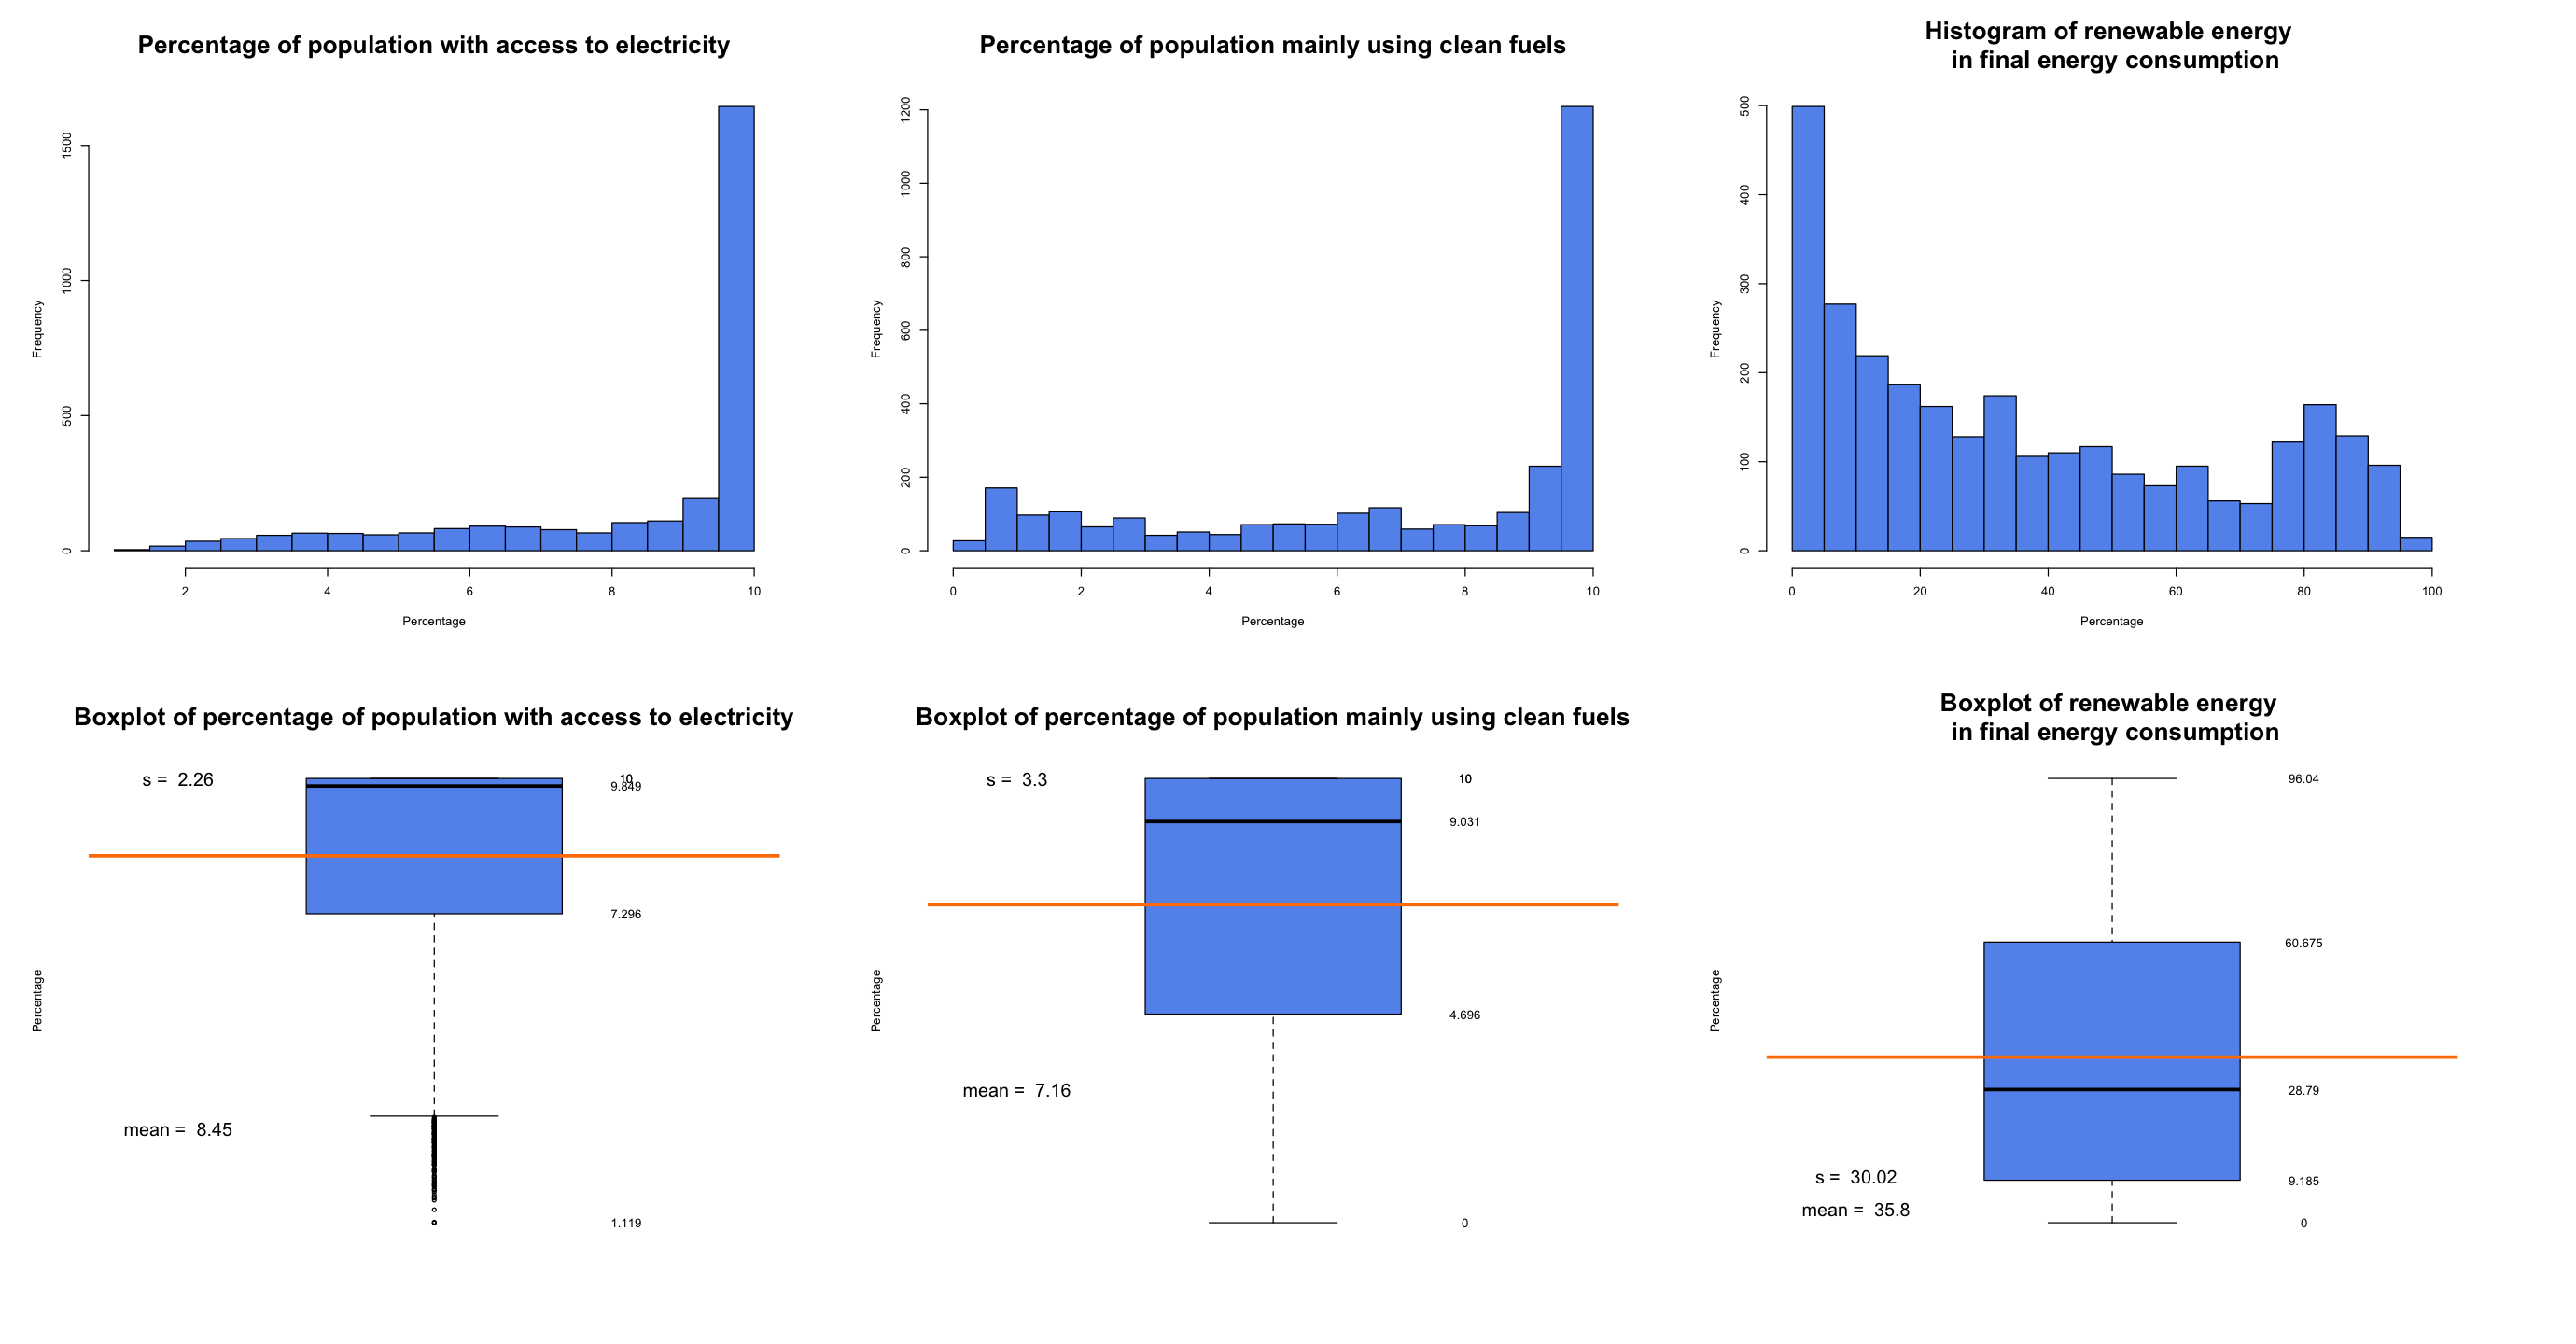

In [10]:
layout(matrix(c(1, 2, 3, 4, 5, 6 ), nrow=2, byrow=FALSE))
par(mar = c(5, 4, 4, 2) + 2, oma = c(0, 0, 0, 4))
options(repr.plot.width = 23, repr.plot.height = 12)

# Plot 1
hist(data$Access.to.electricity....of.population., main="Percentage of population with access to electricity",
     xlab = 'Percentage', ylab = 'Frequency', col= 'cornflowerblue', breaks = 25,  cex.main = 2)
boxplot(data$Access.to.electricity....of.population., main = "Boxplot of percentage of population with access to electricity",
        ylab = 'Percentage', axes=FALSE, col= 'cornflowerblue',  cex.main = 2)
text(y = fivenum(data$Access.to.electricity....of.population.), labels = round(fivenum(data$Access.to.electricity....of.population.),3), x = 1.3)
abline(h = mean(data$Access.to.electricity....of.population.), col = 'darkorange1', lwd=3)
text(x = 0.6, y = 3, labels = paste('mean = ', round(mean(data$Access.to.electricity....of.population.), 2)), cex = 1.5)
text(x = 0.6, y = 10, labels = paste('s = ', round(sd(data$Access.to.electricity....of.population.), 2)), cex = 1.5)
#legend(x = 0.5, y = 12.5, legend = 'mean', col = "darkorange1", lty = 1, cex = 1)

# Plot 2
hist(data$Access.to.clean.fuels.for.cooking, main="Percentage of population mainly using clean fuels",
     xlab = 'Percentage', ylab = 'Frequency', col= 'cornflowerblue', breaks = 25,  cex.main = 2)
boxplot(data$Access.to.clean.fuels.for.cooking, main = "Boxplot of percentage of population mainly using clean fuels",
        ylab = 'Percentage', axes=FALSE, col= 'cornflowerblue',  cex.main = 2)
text(y = fivenum(data$Access.to.clean.fuels.for.cooking), labels = round(fivenum(data$Access.to.clean.fuels.for.cooking),3), x = 1.3)
abline(h = mean(data$Access.to.clean.fuels.for.cooking), col = 'darkorange1', lwd=3)
text(x = 0.6, y = 3, labels = paste('mean = ', round(mean(data$Access.to.clean.fuels.for.cooking), 2)), cex = 1.5)
text(x = 0.6, y = 10, labels = paste('s = ', round(sd(data$Access.to.clean.fuels.for.cooking), 2)), cex = 1.5)
#legend(x = 0.5, y = 12.5, legend = 'mean', col = "darkorange1", lty = 1, cex = 1)

# Plot 3
hist(data$Renewable.energy.share.in.the.total.final.energy.consumption...., main="Histogram of renewable energy \n in final energy consumption",
     xlab = 'Percentage', ylab = 'Frequency', col= 'cornflowerblue', breaks = 25,  cex.main = 2)
boxplot(data$Renewable.energy.share.in.the.total.final.energy.consumption...., main = "Boxplot of renewable energy \n in final energy consumption",
        ylab = 'Percentage', axes=FALSE, col= 'cornflowerblue',  cex.main = 2)
text(y = fivenum(data$Renewable.energy.share.in.the.total.final.energy.consumption....), labels = round(fivenum(data$Renewable.energy.share.in.the.total.final.energy.consumption....),3), x = 1.3)
abline(h = mean(data$Renewable.energy.share.in.the.total.final.energy.consumption....), col = 'darkorange1', lwd=3)
text(x = 0.6, y = 3, labels = paste('mean = ', round(mean(data$Renewable.energy.share.in.the.total.final.energy.consumption....), 2)), cex = 1.5)
text(x = 0.6, y = 10, labels = paste('s = ', round(sd(data$Renewable.energy.share.in.the.total.final.energy.consumption....), 2)), cex = 1.5)
#legend(x = 0.5, y = 12.5, legend = 'mean', col = "darkorange1", lty = 1, cex = 1)


This shows us that most places, a 100% of the population has access to electricity. This is almost the case for usage of clean fuels, but a larger part of the world has 0% access to clean fuels. When it comes to renewable energy in final energy consumption, most have 0%, but the people who have more than that is more or less evenly distributed between 0 and 95%. On average, the percentage of renewable energy consumption is 35%. 

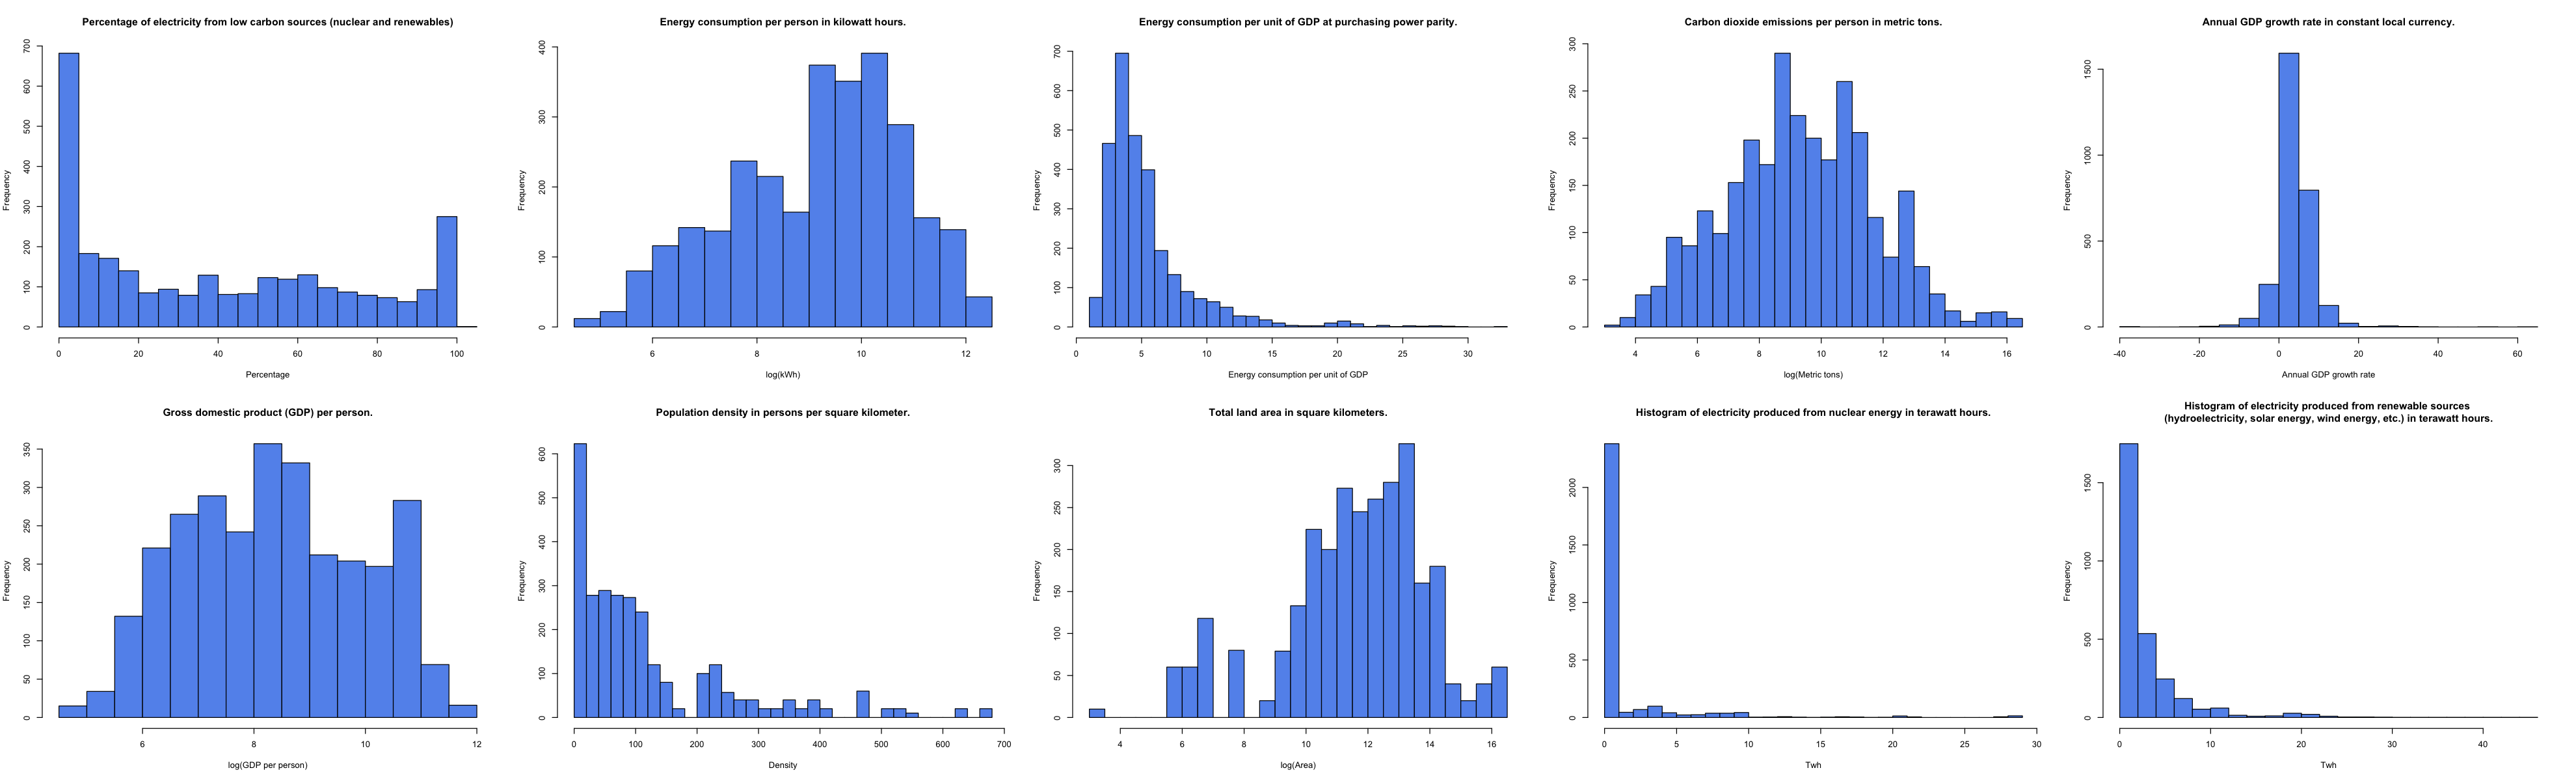

In [11]:
layout(matrix(c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10), nrow=2, byrow=TRUE))
options(repr.plot.width = 33, repr.plot.height = 10)
hist(data$Low.carbon.electricity....electricity., main="Percentage of electricity from low carbon sources (nuclear and renewables)",
           xlab = 'Percentage', ylab = 'Frequency', col= 'cornflowerblue', breaks = 25)
hist(data$Primary.energy.consumption.per.capita..kWh.person., main="Energy consumption per person in kilowatt hours.",
           xlab = 'log(kWh)', ylab = 'Frequency', col= 'cornflowerblue', breaks = 25)
hist(data$Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP., main="Energy consumption per unit of GDP at purchasing power parity.",
           xlab = 'Energy consumption per unit of GDP', ylab = 'Frequency', col= 'cornflowerblue', breaks = 25)
hist(data$Value_co2_emissions_kt_by_country, main="Carbon dioxide emissions per person in metric tons.",
           xlab = 'log(Metric tons)', ylab = 'Frequency', col= 'cornflowerblue', breaks = 25)
hist(data$gdp_growth, main="Annual GDP growth rate in constant local currency.",
           xlab = 'Annual GDP growth rate', ylab = 'Frequency', col= 'cornflowerblue', breaks = 25)
hist(data$gdp_per_capita, main="Gross domestic product (GDP) per person.",
           xlab = 'log(GDP per person)', ylab = 'Frequency', col= 'cornflowerblue', breaks = 25)
hist(data$Density.n.P.Km2., main="Population density in persons per square kilometer.",
           xlab = 'Density', ylab = 'Frequency', col= 'cornflowerblue', breaks = 25)
hist(data$Land.Area.Km2., main="Total land area in square kilometers.",
           xlab = 'log(Area)', ylab = 'Frequency', col= 'cornflowerblue', breaks = 25)
hist(data$Electricity.from.nuclear..TWh., main="Histogram of electricity produced from nuclear energy in terawatt hours.",
           xlab = 'Twh', ylab = 'Frequency', col= 'cornflowerblue', breaks = 25)
hist(data$Electricity.from.renewables..TWh., main="Histogram of electricity produced from renewable sources \n(hydroelectricity, solar energy, wind energy, etc.) in terawatt hours.",
           xlab = 'Twh', ylab = 'Frequency', col= 'cornflowerblue', breaks = 25)

Among the remaining variables, we also chose to log-tranform the $CO_2$ emissions per person, energy consumption per person in Kwh, GDP per person and total land area in km². From the descriptive analysis, we can interperet that: 
- It is common to have 0% electivity coming from low carbon sources, but the amount of places where that percentage is 100% is far from negligible. 
- Most people consume between $e⁹ - e^{11}$ = 8000-60000 kWh of energy per year
- The energy consumption per unit of GDP is centered around 4 Kwh per unit of GPP
- The most common carbon dioxide emission per person is e⁸ = 2980 metric tonnes per year
- The annual GDP growth rate is normally around 0-5%
- GDP per person is centered around e⁸ = 2980
- Most places have a very low population density
- For the variables of electricity produced from renewable and nuclear power, there is high frequancy of the lowest level of energy production. This is logical as not all countries produce a lot of electricity.

#### Question 5

Visualization of the great heterogeneity of CO2 emissions between countries.

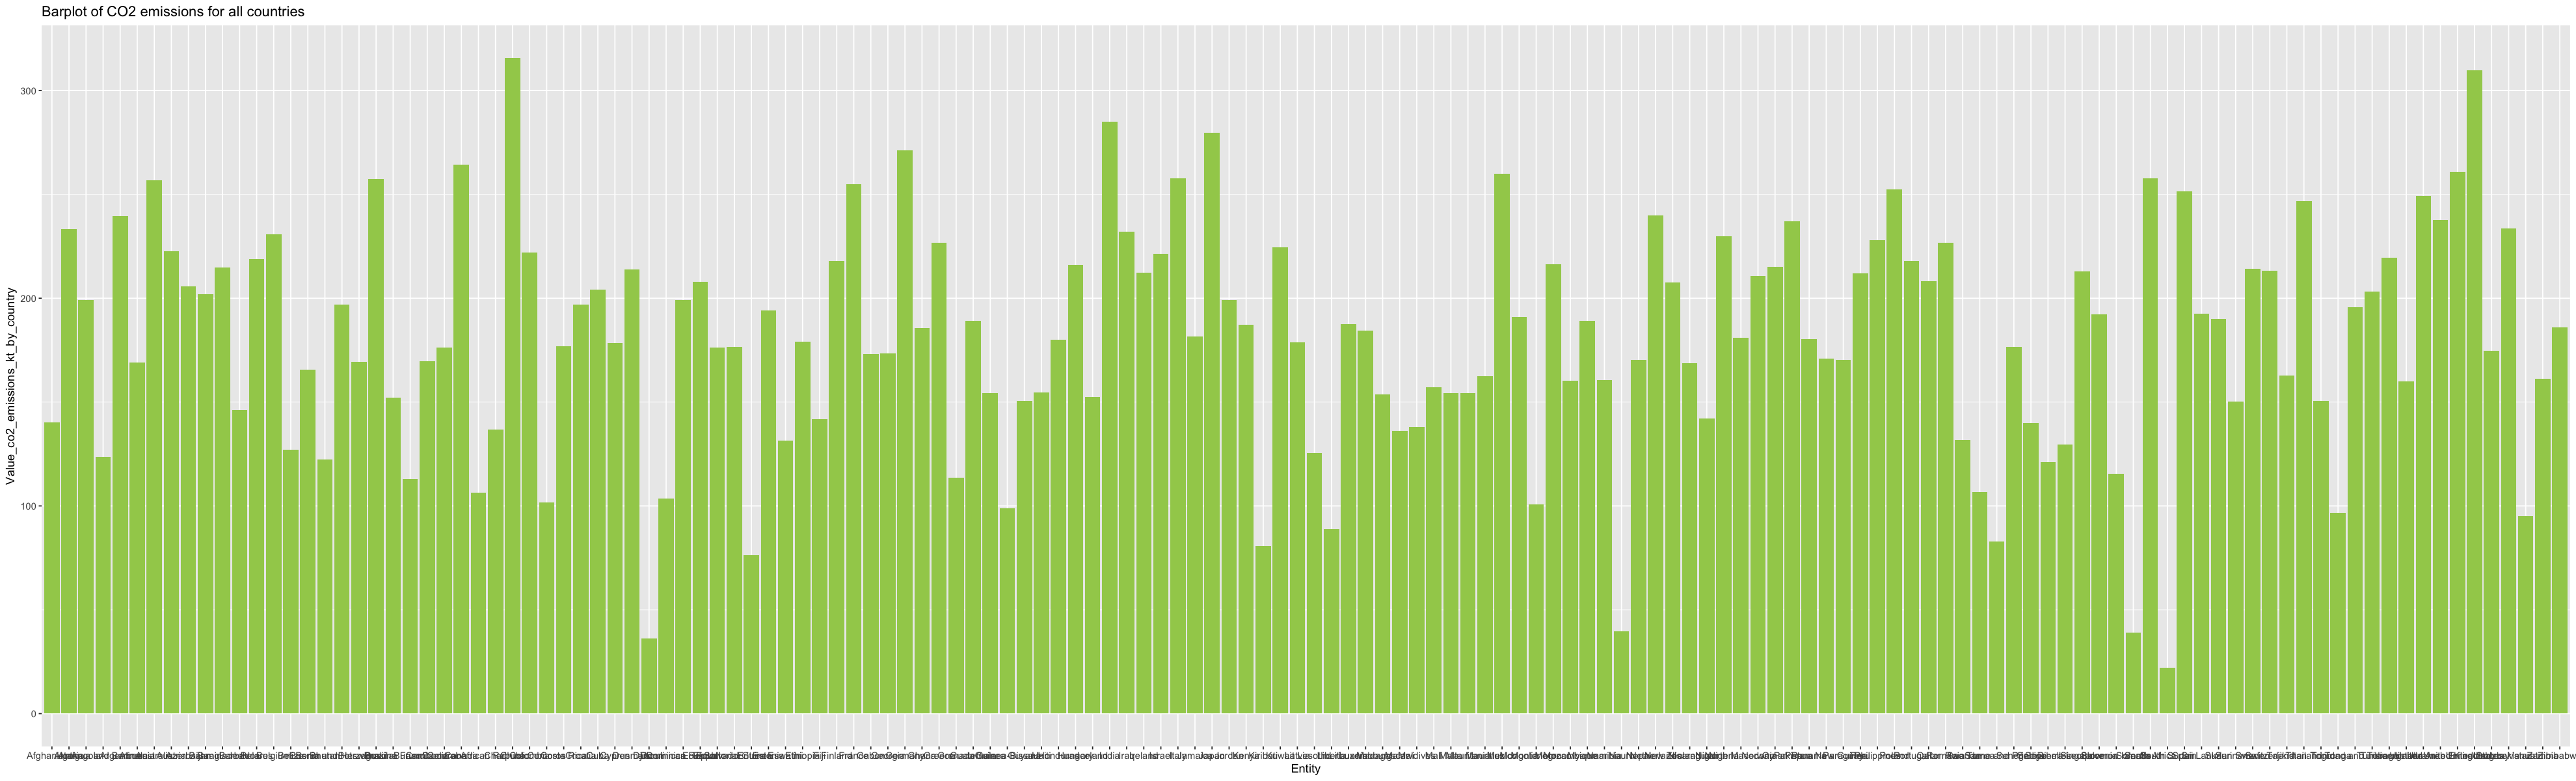

In [12]:
ggplot(data, aes(x = Entity, y = Value_co2_emissions_kt_by_country)) +
  geom_bar(stat = "identity", fill = "darkolivegreen3") +
  labs(title = "Barplot of CO2 emissions for all countries",
       x = "Entity", y = "Value_co2_emissions_kt_by_country")


In [13]:
# Aggregate CO2 emissions by country over all years
total_emissions_by_country <- aggregate(Value_co2_emissions_kt_by_country ~ Entity, data = data, sum)

# Identification of the top 5 CO2 emitting countries
top5_emitters <- total_emissions_by_country[order(total_emissions_by_country$Value_co2_emissions_kt_by_country, decreasing = TRUE), ]
top5_emitters <- head(top5_emitters, 5)

# Display the top 5 CO2 emitting countries.
cat("The top 5 CO2 emitting countries are: \n")
cat(paste(top5_emitters$Entity, collapse = ", "))

bottom5_emitters <- total_emissions_by_country[order(total_emissions_by_country$Value_co2_emissions_kt_by_country, decreasing = FALSE), ]
bottom5_emitters <- head(bottom5_emitters, 5)

cat("\n The bottom 5 CO2 emitting countries are: \n")
cat(paste(bottom5_emitters$Entity, collapse = ", "))

The top 5 CO2 emitting countries are: 
China, United States, India, Japan, Germany
 The bottom 5 CO2 emitting countries are: 
South Sudan, Djibouti, Somalia, Nauru, Eritrea

### Multidimensional descriptive analysis

We continue the descriptive analysis of the data through a multi-dimensional analysis. Firstly, we explore the data through a scatter plot matrix.

#### Question 6


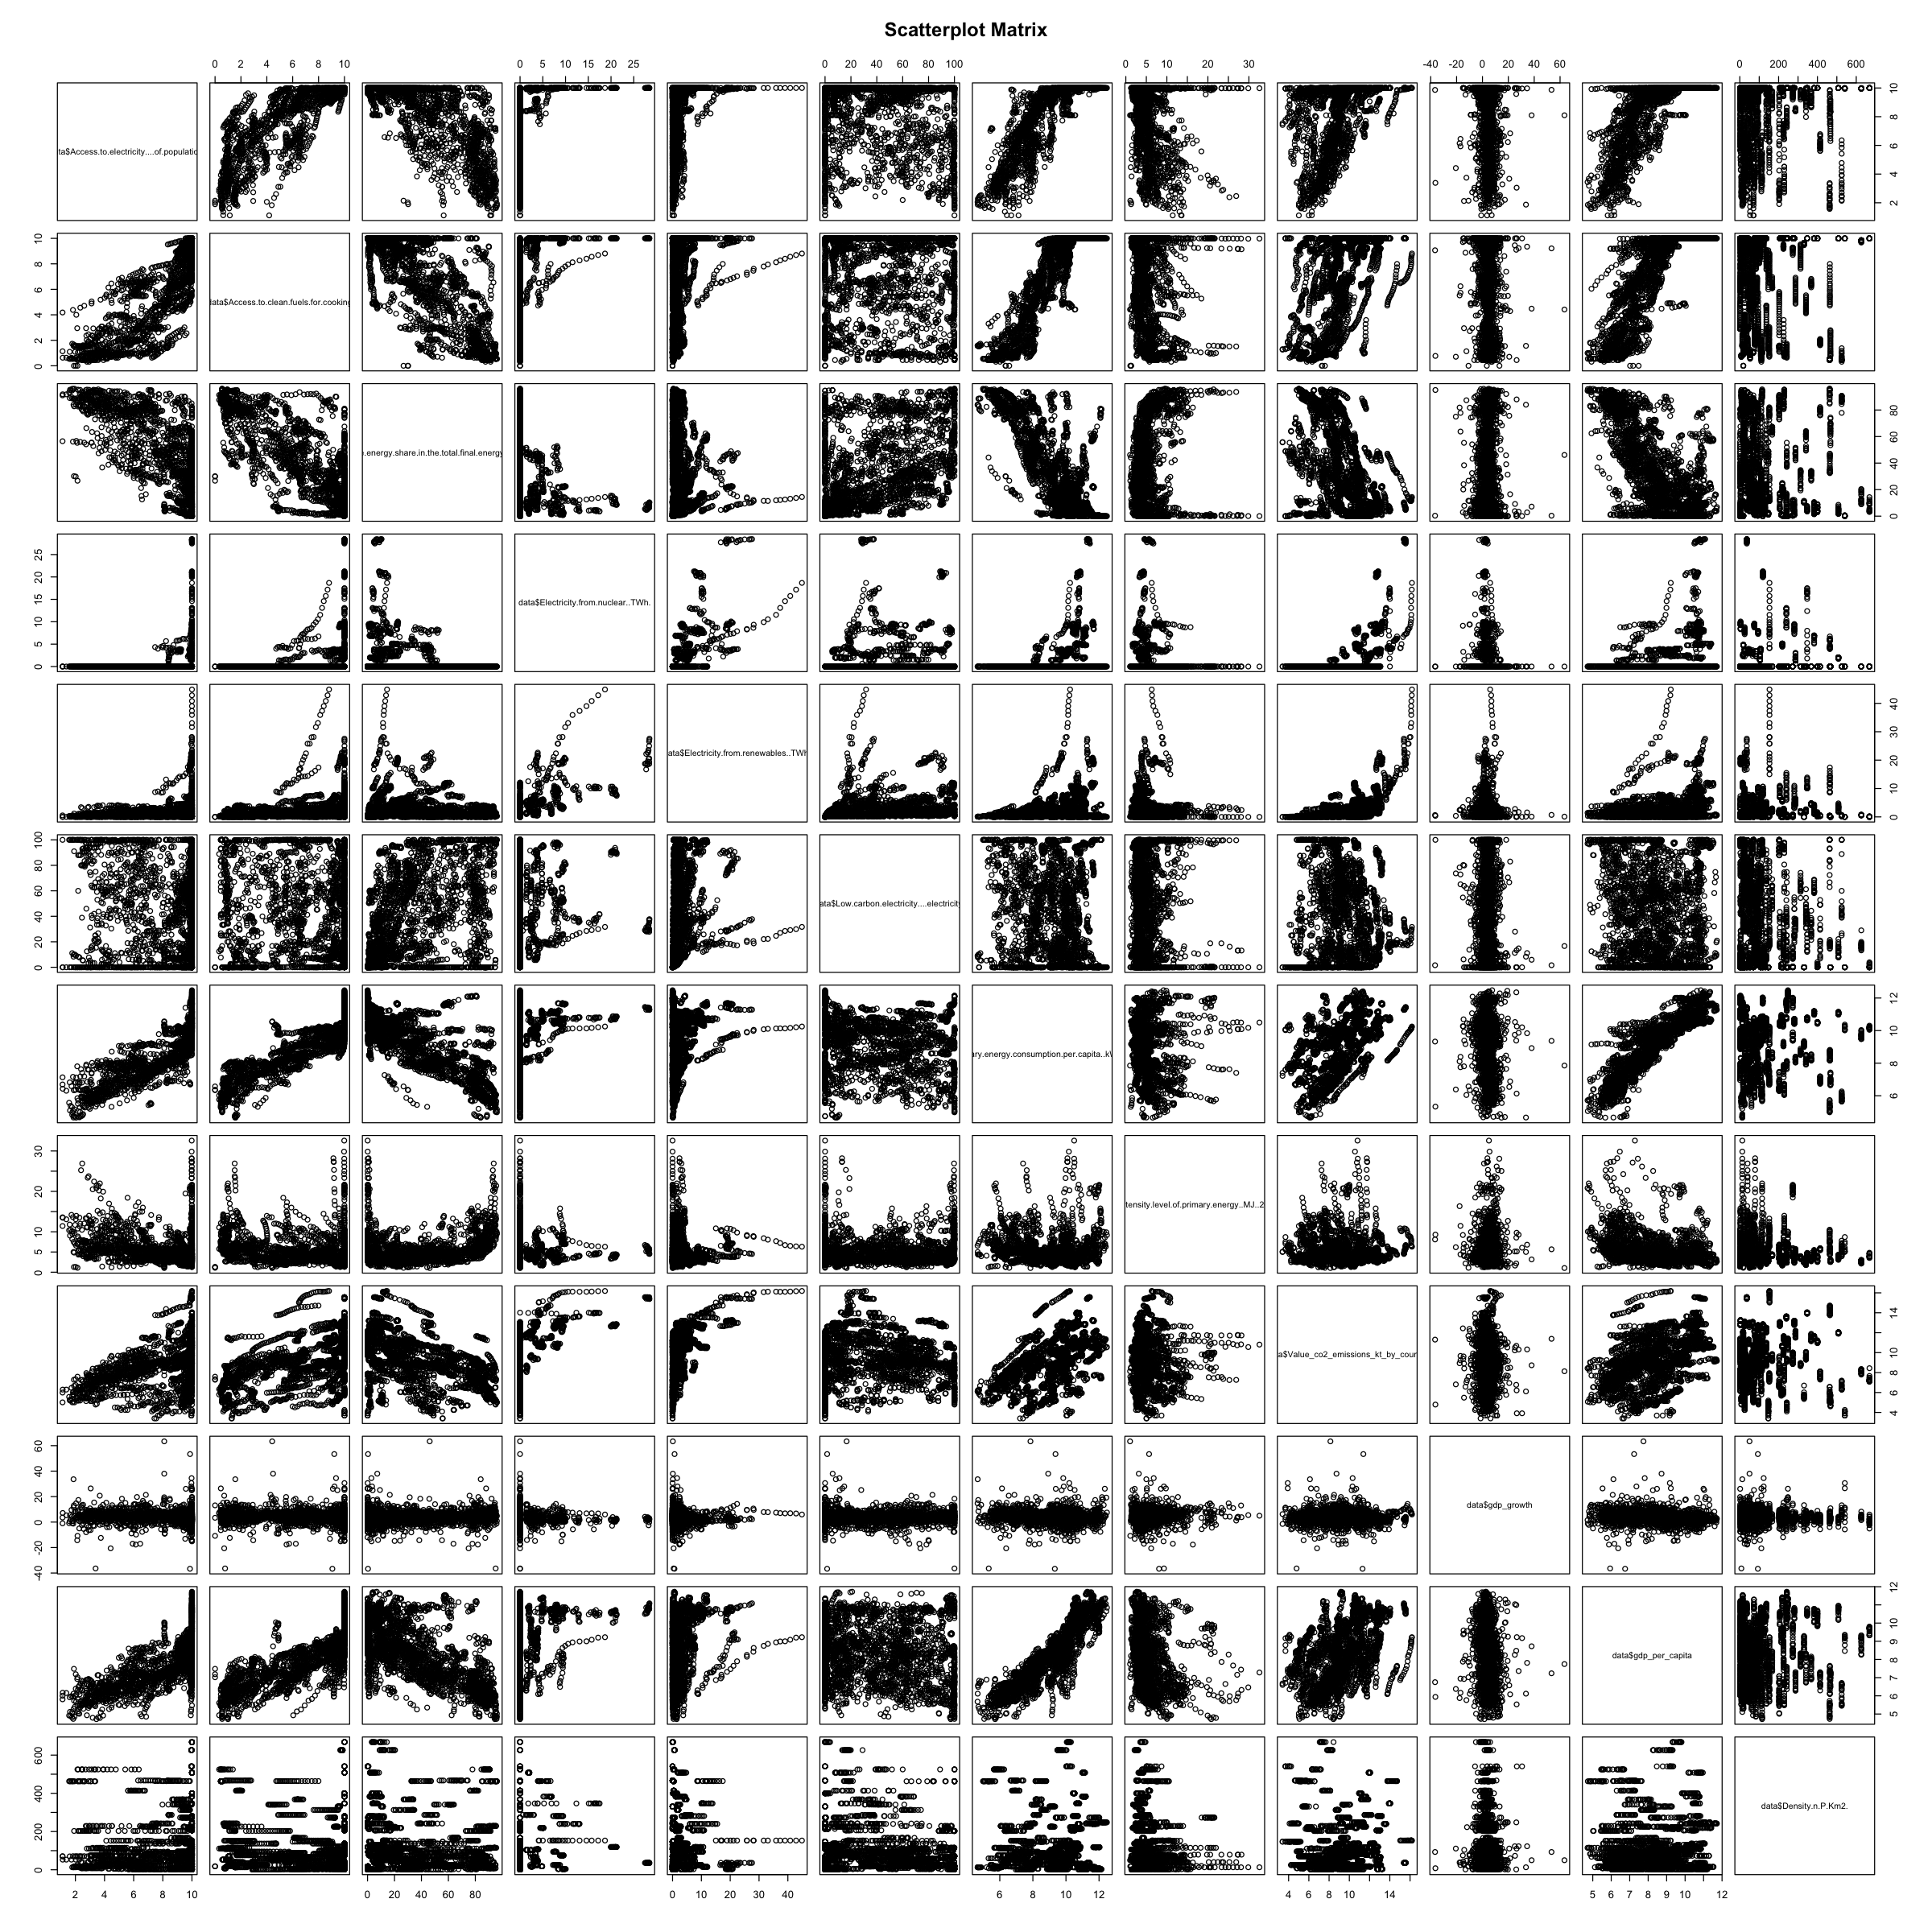

In [14]:
options(repr.plot.width = 20, repr.plot.height = 20)

pairs(~data$Access.to.electricity....of.population.	+
  data$Access.to.clean.fuels.for.cooking	+
  data$Renewable.energy.share.in.the.total.final.energy.consumption....	+
  data$Electricity.from.nuclear..TWh.	+
  data$Electricity.from.renewables..TWh.	+
  data$Low.carbon.electricity....electricity.	+
  data$Primary.energy.consumption.per.capita..kWh.person.	+
  data$Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. +
  data$Value_co2_emissions_kt_by_country+ data$gdp_growth +
  data$gdp_per_capita+ data$Density.n.P.Km2. ,data=data, main="Scatterplot Matrix")

At first look this scatter plot does not give us much insight, but we can deduce the following :
- As access to electricity increases, so does the availability of clean fuels for cooking.
- As access to electricity increases, the share of renewable energy in total final energy consumption decreases.
- Regardless of GDP per capita, GDP growth remains more or less constant.

We then proceed to explore the correlations in the data set using a correlation plot

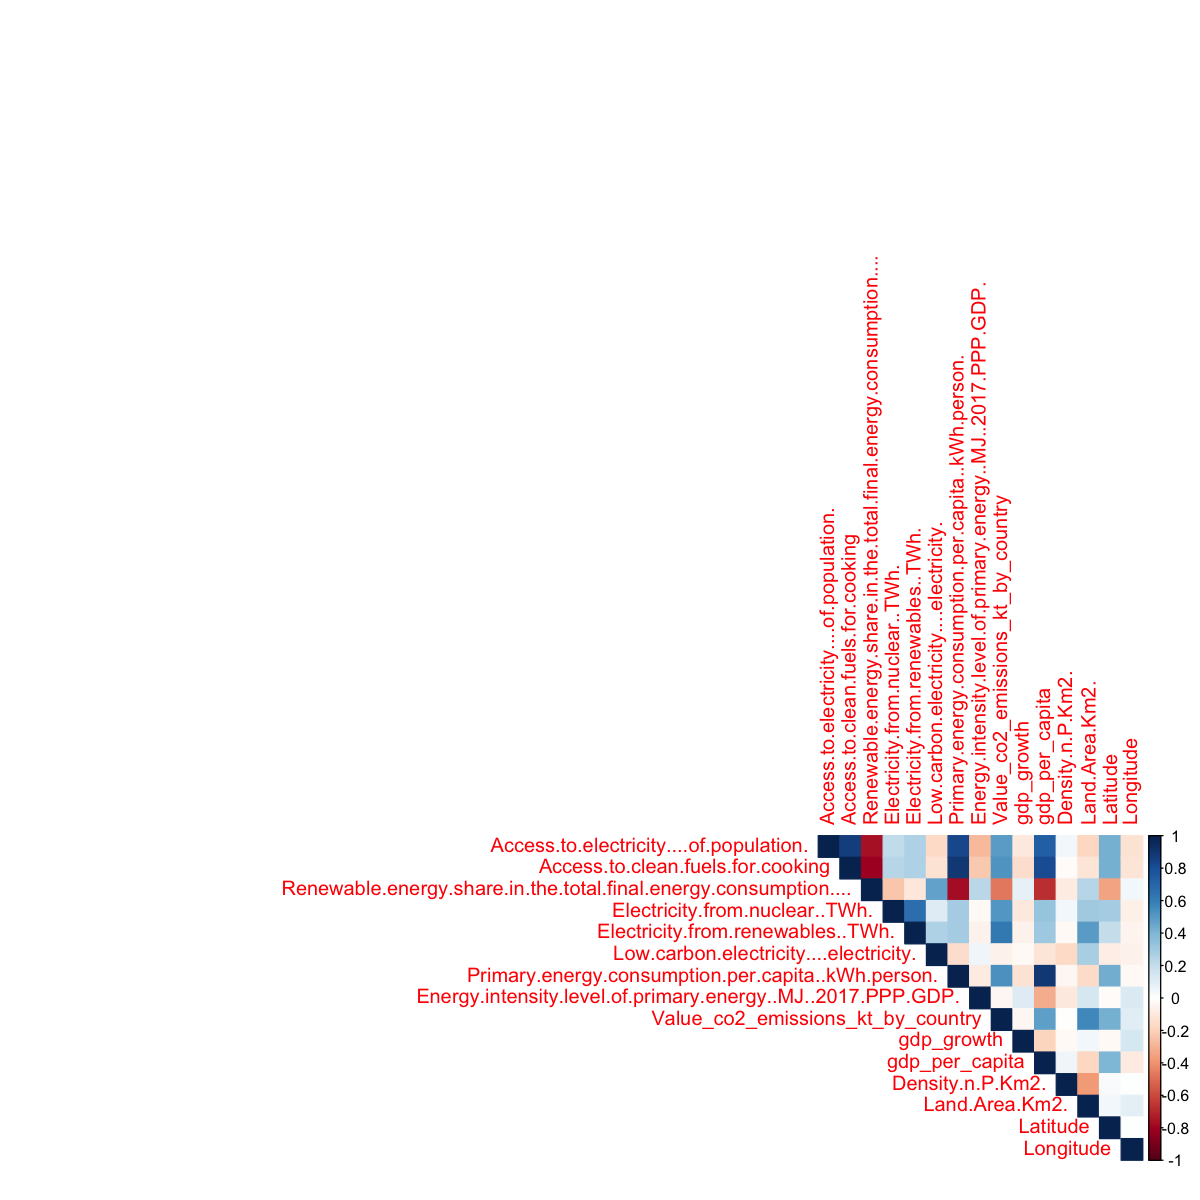

In [15]:
options(repr.plot.width = 10, repr.plot.height = 10)
clean_data <- na.omit(data)

M = cor(clean_data[,-c(1,2)])
corrplot(M, method="color", type="upper")

This correlation plot confirms that the access to electricity and the availability of clean fuels for cooking are negatively correlated to the share of renewable energy in total final energy consumption, and that the access to electricity and the availability of clean fuels for cooking is positively correlated.

Electricity from fossil fuels are correlated to electricity from renewables, which tells us that when a country produces a lot of energy from renewables, it is also likely that they produce a lot of fossil fuel. Electricity from nuclear is also correlated to the production of the other sources of energy. We also notice that for countries with bigger land area, more energy is produced (fossil, renewable and nuclear), and the carbon dioxide emissions per person is also bigger.

Primary energy consumption per capita is correlated to the GDP per capita.

In addition, electricity from renewables and electricity from nuclear is also positively correlated, electricity from renewables more than electricity from nuclear.

Other variables can also be commented, but the ones mentioned above gives us the most certain information. We also notice that a lot of the variables is not correlated at all or barely positively or negatively correlated.


#### Question 7

The following commands perform a Principal Component Analysis (PCA) on quantitative variables. The variable to observe; "Value_co2_emissions_by_country" is not used. 

In [16]:
# Selection of quantitative variables
data_quantitative <- data_complete[, sapply(data_complete, is.numeric)]
# removing the variable to observe, "Value_co2_emissions_kt_by_country"
data_quantitative <- data_quantitative[, !colnames(data_quantitative) == "Value_co2_emissions_kt_by_country"]

# ACP on quantitative variables
acp <- PCA(data_quantitative, scale.unit = TRUE, graph = FALSE, ncp = 9, quali.sup = 1)

#List of the first 10 eigenvalues
print("Table with the first 10 eigenvalues and their Cumulative Percentage of Variance:")
head(acp$eig, 10)

[1] "Table with the first 10 eigenvalues and their Cumulative Percentage of Variance:"


eigenvalue percentage of variance cumulative percentage of variance
comp 1  4.0109392  28.649566              28.64957                         
comp 2  2.0975705  14.982646              43.63221                         
comp 3  1.3514084   9.652917              53.28513                         
comp 4  1.2228516   8.734654              62.01978                         
comp 5  1.0250173   7.321552              69.34134                         
comp 6  0.9077138   6.483670              75.82501                         
comp 7  0.8504878   6.074913              81.89992                         
comp 8  0.7078221   5.055872              86.95579                         
comp 9  0.6379695   4.556925              91.51272                         
comp 10 0.5265050   3.760750              95.27347

We observe a cumulative percentage of variance of 87.92834% corresponding to 9 eigenvalues. Then, we will keep 9 dimensions as 87.92834% > 85%. 

The next plot shows the percentage of explained variance corresponding to each dimension.

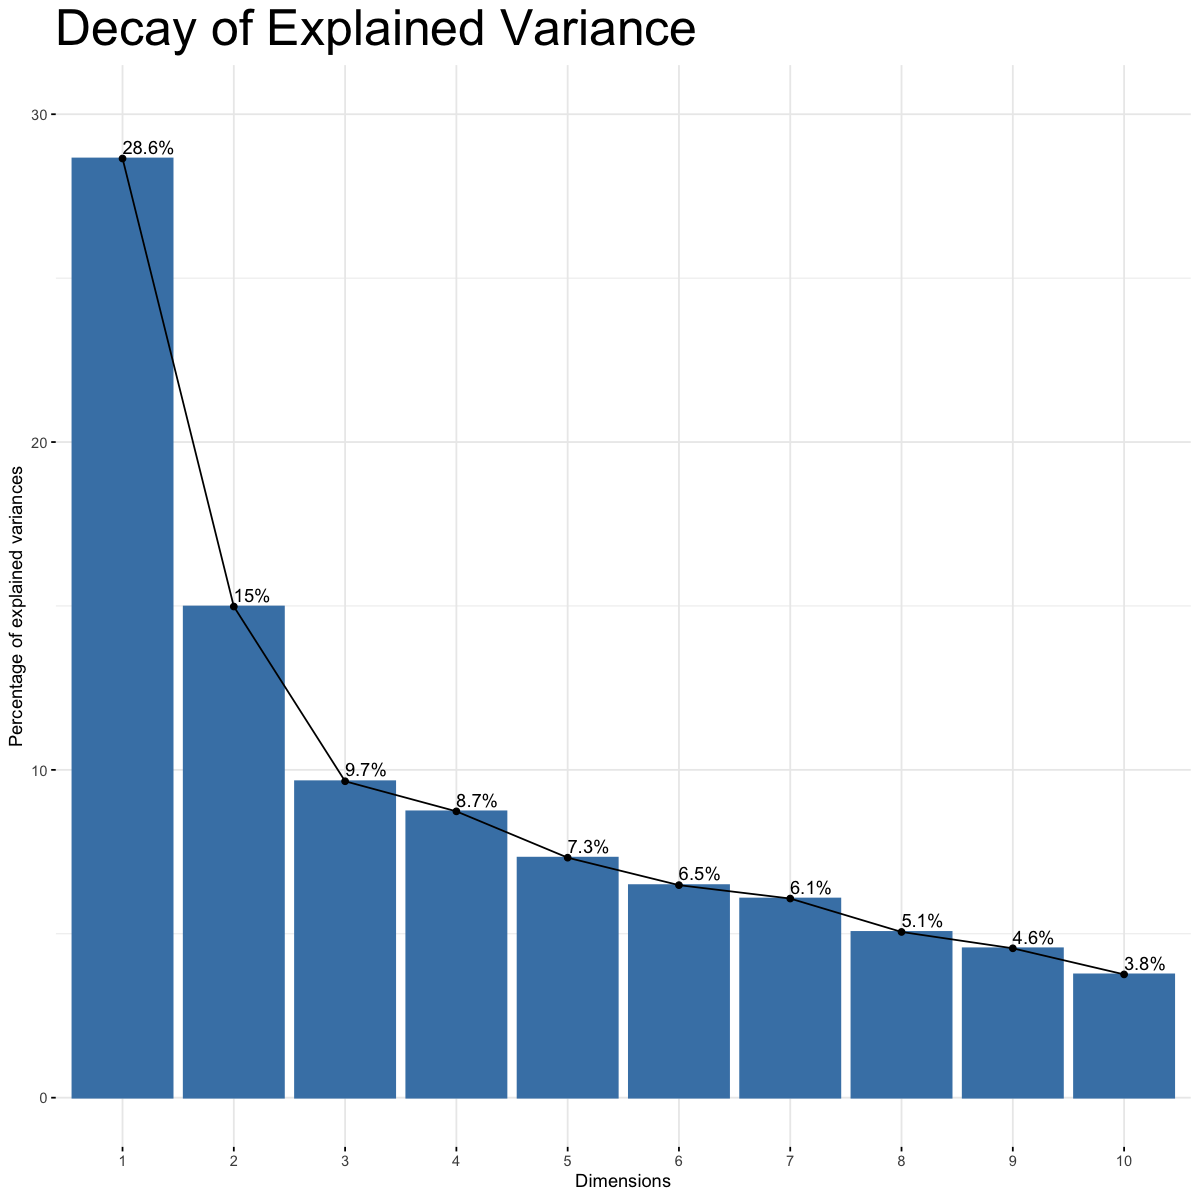

In [17]:
# Decay of Explained Variance
p <- fviz_eig(acp, addlabels = TRUE, ylim = c(0, 30)) +
  ggtitle("Decay of Explained Variance") +
  theme(plot.title = element_text(size = 30))

# Display the plot
print(p)

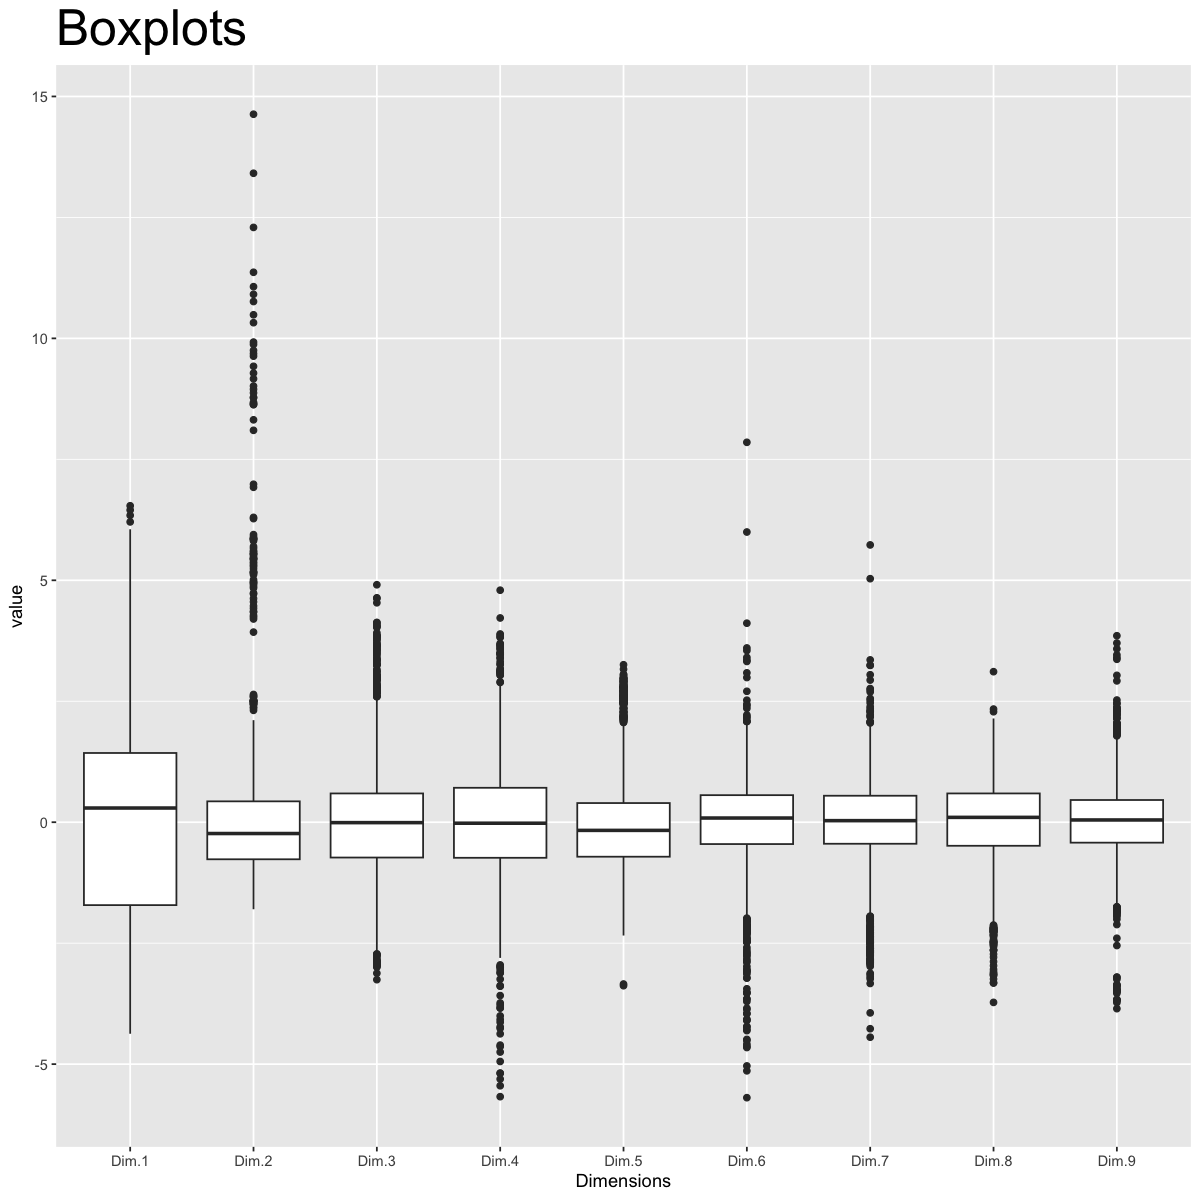

In [18]:
# Boxplots for individual coordinates
ggplot(melt(acp$ind$coord), aes(x = Var2, y = value)) +
  geom_boxplot() +
  ggtitle("Boxplots ") +
  xlab("Dimensions") +
  theme(plot.title = element_text(size = 30))


Here, we observe that the first dimenstion of the principal component analysis has the largest range of values. This indicates that the first dimension captures the most information about the data. The second dimension has a signficant amount of outliars. The length of the whiskers are the same on both sides for some of the dimensions, such as dim 4,6,7,8 and 9. For the rest, they are non

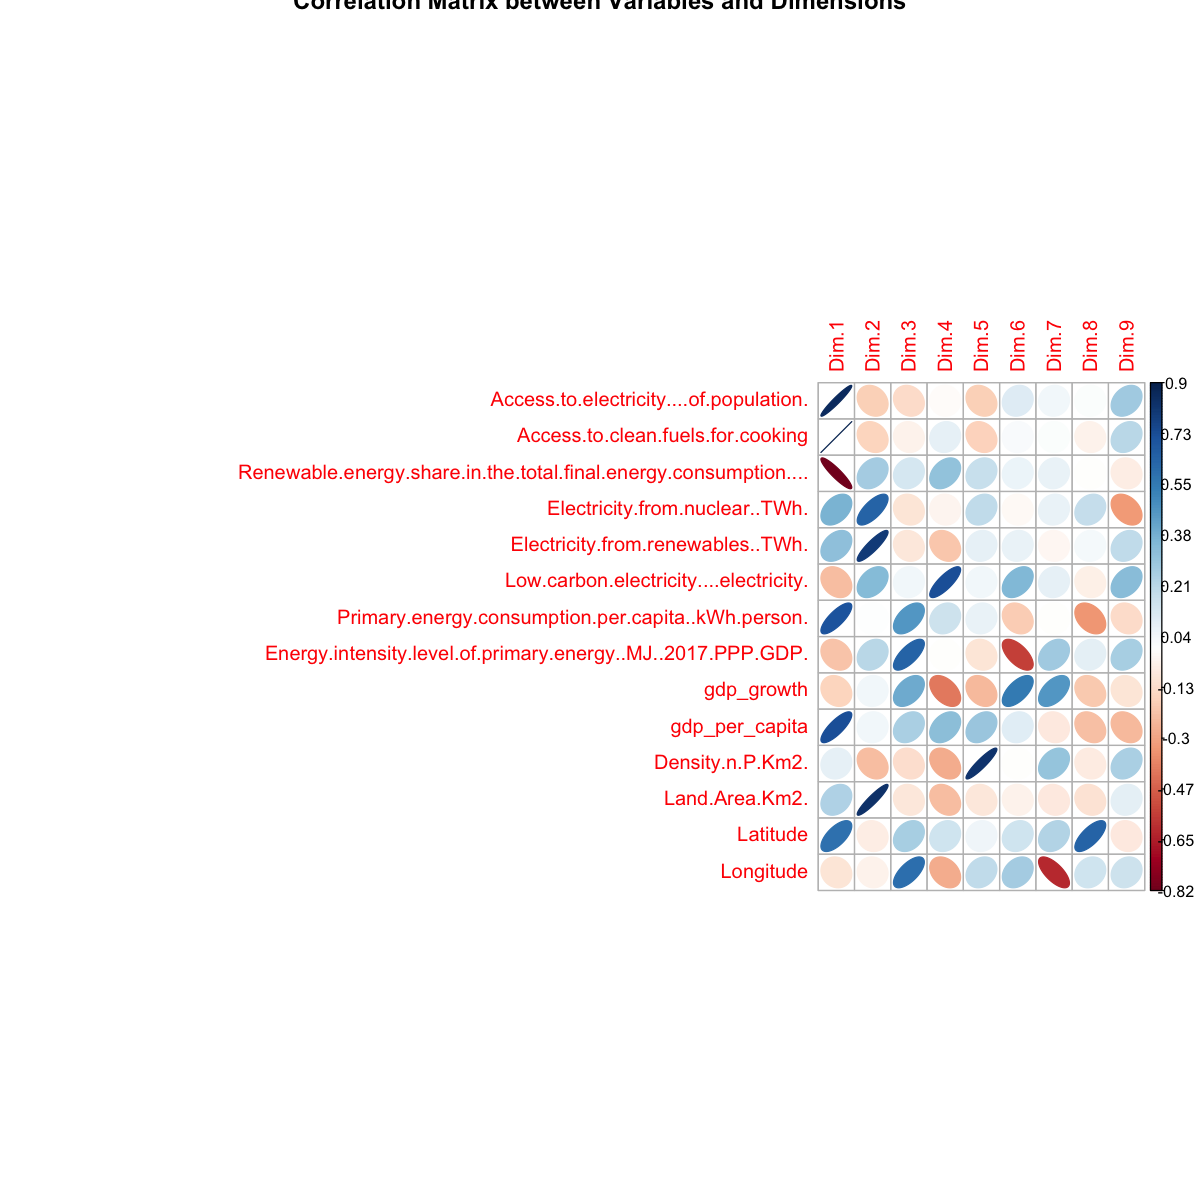

In [19]:
# Correlation matrix between variables and dimensions 
corrplot(acp$var$cor, is.corr = FALSE, method = "ellipse", 
         title = "Correlation Matrix between Variables and Dimensions")

From the graph we can observe what variables correspond the most to each dimension: 
- Dimension 1: Positively correlated is : Access to clean fuels for cooking, Access to electricity (% of population), Primary energy consmption per capita and gdp per capita. The variable negatively correlated is renewable energy share in total final energy consumption. 
- Dimension 2: Electricity from renewables, Land Area and Electricity from nuclear. 
- Dimension 3: Energy intensity level of primary energy, longlitude energy consumption per capita and gdp growth.
- Dimension 4: Positively correlated : Low carbon electricity
- Dimension 5: Positively correlated : Year
- Dimension 6: Positively correlated : Density
- Dimension 7: gdp growth is positively correlated and Energy intensity level is negatively correlated. 
- Dimension 8: Longlitude is negatively correlated
- Dimension 9: Latitude is positively correlated

From these observations we can interperet that the first dimension corresponds to countries that are developed. If the access to fuels, electricity, energy consumption and gdp per capita is high it indicated that people in this country have access to and use electricity. However, for these countries, the share of renewable energy low, meaning they are countries that use fossil or nuclear fuels, meaning that they emit higher levels of CO2. This is a possible interpretation of dimension 1. Looking at the geographical position, the latitude is positive and longlitude slightly negative. This can correspont to countries in Europe, especially countriel like the UK and Spain. 

For dimension 2, one can possibly deduce that countries with higher land area has a higher production of electricity, for renewable and nuclear as energy production often requires vast amounts of land. 

Dimension 3 could suggest that there is a correlation between the energy used per unit of Gross Domestic Product, energy consumption per capita, longlitude and gdp growth. For countries in this group it can suggest economic growth could induce an increase in energy consumption per capita as people enjoy a high standard of living. Secondly, industrialization often accompanies economic growth, which can result in higher energy intensity in production processes. The positive correlation could also indicate that energy efficiency measures are not keeping pace with economic growth. As the longlitude is positively correlated, it can suggest that these are countries located near the pacific ocean or north Asia. Like Japan and China for example. 

However, dimension 7 is representing countries that behave differently than countries in dimension 3. These are countries whose economies are becoming more energy efficient over time. This may result from technological advancements, improved industrial processes, and energy conservation measures. Looking at geographical position, it could be countries located in North America.

The size of the dimensions also suggests that there are more countries that behave like in dimension 3 than in dimension 7. 


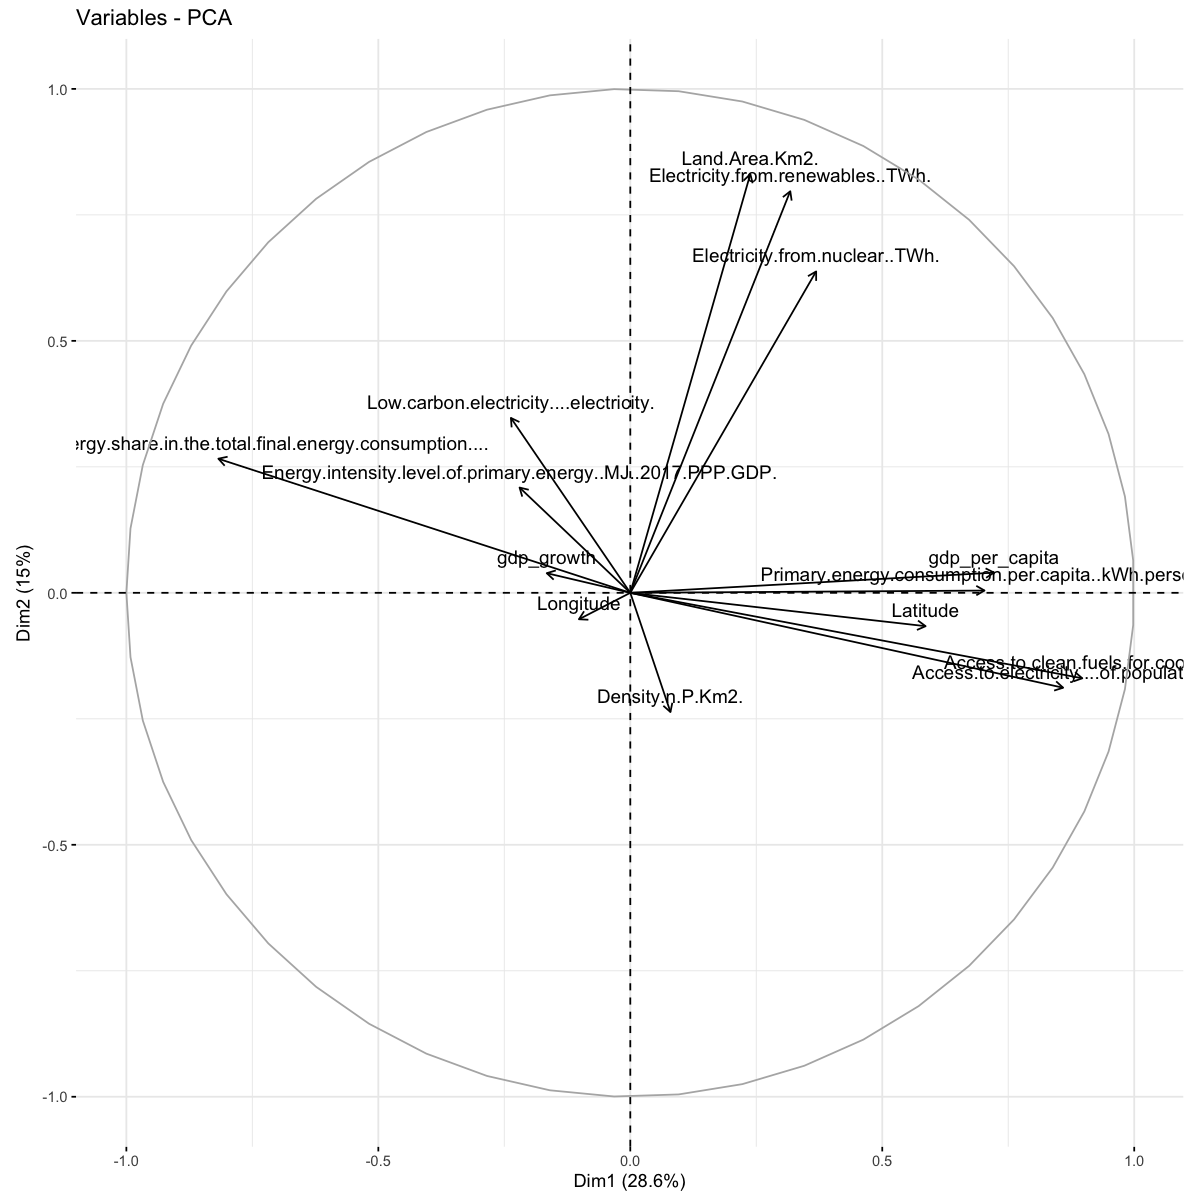

In [20]:
#Projection of Variables onto the Factorial Plane Composed of Dimensions 1 and 2 of Principal Component Analysis (PCA
fviz_pca_var(acp, axes = c(1, 2), asp = 1)

The projection of variables alond the dimensions 1 and 2 confirms the distributions from the previous plot. We have the same groups appearing on the axes: 
- Dimension 1: Positively correlated is : Access to clean fuels for cooking, Access to electricity (% of population), Primary energy consmption per capita and gdp per capita. The variable negatively correlated is renewable energy share in total final energy consumption. 
- Dimension 2: Electricity from renewables, Land Area and Electricity from nuclear. 

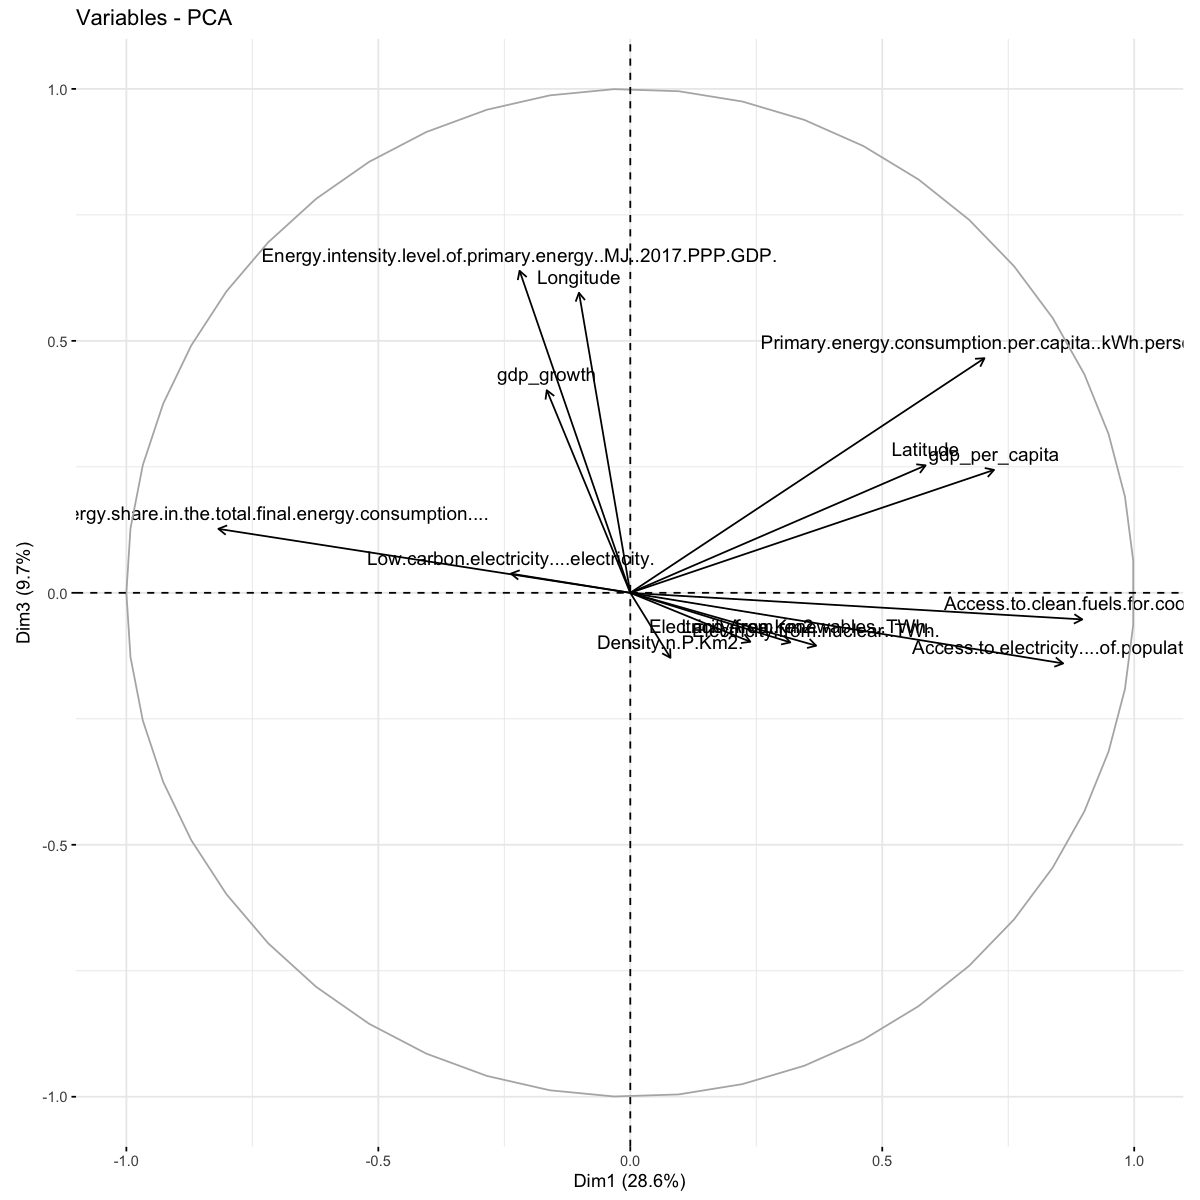

In [21]:
#Projection of variables onto the factorial plane composed of dimensions 1 and 3 of Principal Component Analysis (PCA).
fviz_pca_var(acp,axes=c(1,3))

On this projection of the variables we also have that energy intensity level of primary energy, longlitude and gdp growth is positively correlated with dimension 3. However, Primary energy consumption per capita is a more important variable for dimension 1 than for dimesnion 3, so it appears further in the direction of dimension 1. However, it is still positively correlated to dimension 3. 

#### Question 8

Visualization of the potential dependency between the variable Year and the variable to predict; Value-co2-emissions. 

1. Scatter plot

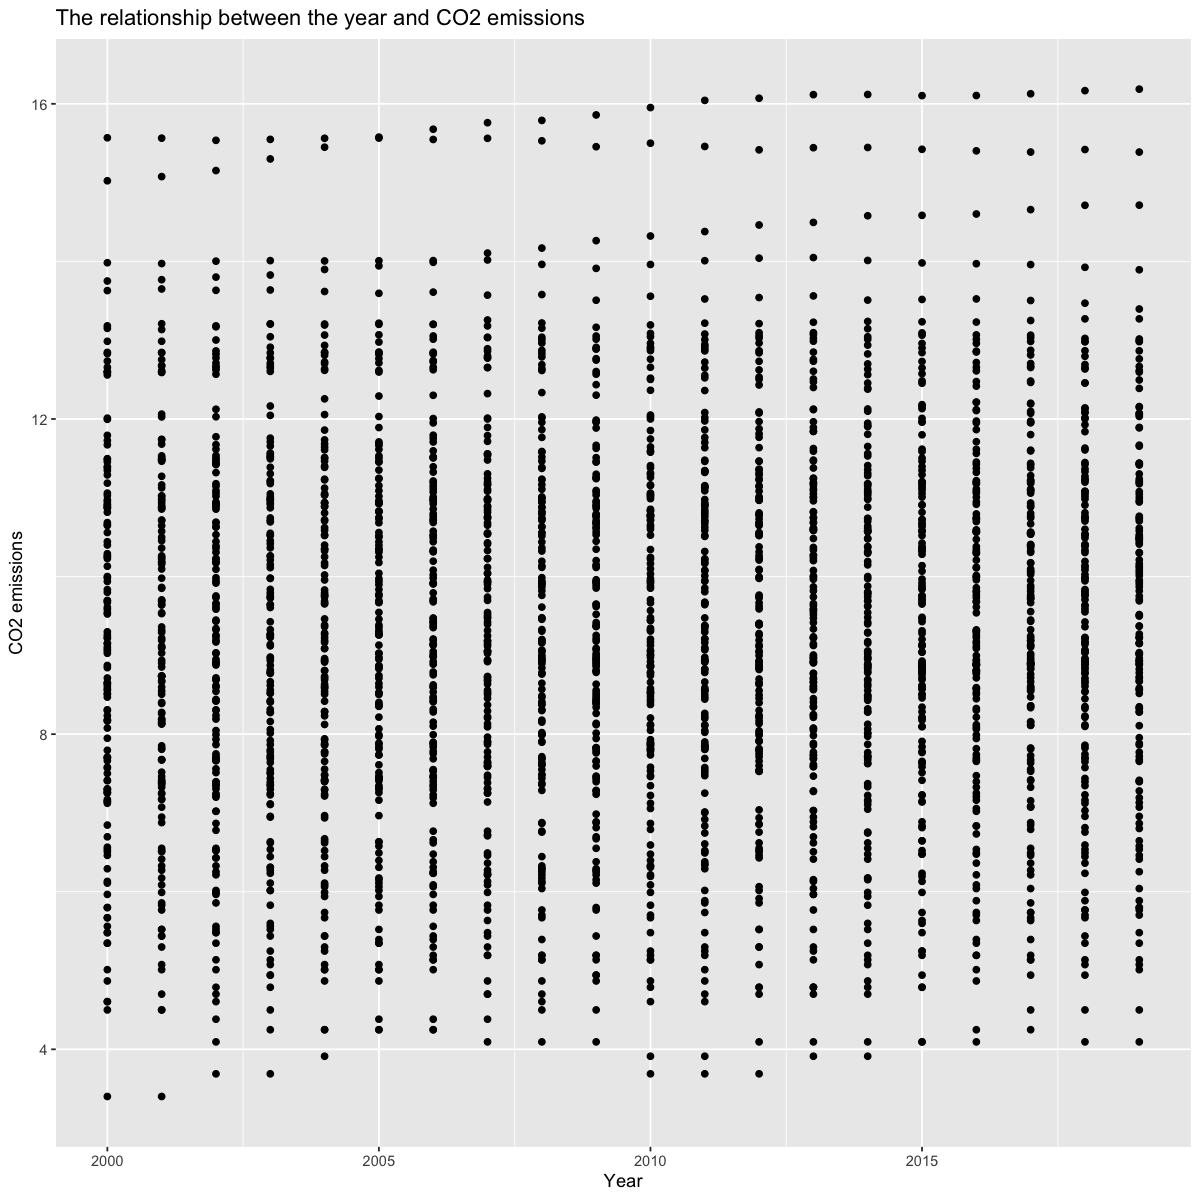

In [22]:
# Scatter plot
ggplot(data, aes(x = Year, y = Value_co2_emissions_kt_by_country)) +
  geom_point() +
  labs(x = "Year", y = "CO2 emissions") +
  ggtitle("The relationship between the year and CO2 emissions")

Here, we observe little variation between the CO2 emissions and the variable year. However, CO2 emissions are slightly increasing as year increases. 

2. Correlation coefficient 

In [23]:
#Correlation coefficient between "Year" and "Value-co2-emissions".
correlation <- cor(data$Year, data$Value_co2_emissions_kt_by_country)
correlation

[1] 0.04714463

A correlation coefficient close to 1 or -1 indicates a strong correlation, while a coefficient close to 0 indicates a weak correlation. We observe a correlation of 0.047, therefore there is not a strong dependency between the variable 'Year' and the variable 'CO2 emissions Value'Un coefficient de corrélation proche de 1 ou -1 indique une forte corrélation, tandis qu'un coefficient proche de 0 indique une faible corrélation.
Nous observons une corrélation de 0.02, donc il n'existe pas une grande dépendance entre la variable "Year" et la variable "Value-co2-emissions".

3. Modèle de régression linéaire

In [24]:
#Modèle de régression linéaire pour prédire les émissions de CO2 en fonction de l'année
lm_model <- lm(Value_co2_emissions_kt_by_country ~ Year, data = data)
summary(lm_model)


Call:
lm(formula = Value_co2_emissions_kt_by_country ~ Year, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7600 -1.6502 -0.0599  1.6726  6.7207 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -29.962911  15.550964  -1.927   0.0541 .
Year          0.019552   0.007738   2.527   0.0116 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.383 on 2866 degrees of freedom
Multiple R-squared:  0.002223,	Adjusted R-squared:  0.001874 
F-statistic: 6.384 on 1 and 2866 DF,  p-value: 0.01157


*  The p-values associated with the coefficients (0.0541 for the intercept and 0.016 for the year) are both higher than a commonly used significance threshold of 0.05. This means there is not enough evidence to reject the null hypothesis that the coefficients are zero, suggesting there is no significant relationship between the year and CO2 emissions.

*  The coefficient of determination (R²) is very close to zero (0.002223), indicating that the linear regression fails to explain much of the variation in CO2 emissions from the year.

*  The F-test has a statistic of 6.384 with a p-value of 0.01157, confirming the overall lack of significance of the regression model.

In conclusion, these results suggest there is no significant relationship between the year and CO2 emissions in your data.

## Modeling

In this section we are predicting the Value-co2-emissions variable using different regression methods.

### Question 1 : Splitting the data set

We start the modedeling part of this project by dividing the data set into a training set and a test set. We affect 20% of the data to the test set.

In [25]:
###
set.seed(529) #initializes the generator
test.ratio <- .2 #proportion of data to be put in the test set
npop <- nrow(data) #number of lines in the dataset
ncol <- ncol(data) #number of columns in the sataset
ntest <- ceiling(npop * test.ratio) #size of the test sample
testi <- sample(1:npop, ntest) #indices of train sample 
traini <- setdiff(1:npop, testi) #indices of train sample

In this model, we will perform regression, which only works with quantitative variables. We want to model the target variable: the C02- emissions by country in terms of the non-zero quantitative variables in out dataset. 

In [26]:
#construction of the samples for regression, quantitative variables
#prediciton of carbon dioxide emissions per person in metric tons, target variable: Value_co2_emissions_kt_by_country
#kommentere var vi tar bort
datatrr <- data[traini,-c(1) ] #construction of training sample 
datatet <- data[testi, -c(1)] #contruction of test sample
str(datatrr) #verificationss
str(datatet) #verification

'data.frame':	2294 obs. of  16 variables:
 $ Year                                                            : int  2003 2004 2006 2008 2010 2011 2012 2013 2015 2016 ...
 $ Access.to.electricity....of.population.                         : num  3.84 4.48 5.54 6.51 6.53 ...
 $ Access.to.clean.fuels.for.cooking                               : num  3.08 3.3 3.72 4.09 4.47 ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  36.7 44.2 31.9 21.2 15.2 ...
 $ Electricity.from.nuclear..TWh.                                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Electricity.from.renewables..TWh.                               : num  0.794 0.748 0.8 0.735 0.866 ...
 $ Low.carbon.electricity....electricity.                          : num  67 62.9 76.2 74 79.8 ...
 $ Primary.energy.consumption.per.capita..kWh.person.              : num  5.44 5.32 5.72 6.41 7.08 ...
 $ Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.     : num  1.4 1.2 1.5 1.94 2.46 3.23 2.61 2.46 2.37 

This step is nescessary when we consider the performance of algorithms for several reasons; 

Why is this step necessary when we’re focusing on algorithm performance?

*  Unbiased testing: By using a separate test set, we can test the model's ability to generalize to unseen data.

*  Preventing overfitting: Using a separate test set helps to detect overfitting of the model. By evaluating the model on an independent test set, we can detect whether the model generalizes properly or if it is too specific to the training data.

In [27]:
#Function to calculate R2 value
rsq <- function(actual, predicted) {
  mean_actual <- mean(actual)
  tss <- sum((actual - mean_actual) ^ 2)  # total sum of squares (TSS)
  rss <- sum((actual - predicted) ^ 2) #residual sum of squares (RSS)
  r_squared <- 1 - (rss / tss) #R-squared (coefficient of determination)
  return(r_squared)
}

In [28]:
#function to calculate adjusted R**2
adjusted_rsq <- function(actual, predicted, num_predictors) {
  r_squared <- rsq(actual, predicted)
  n <- length(actual)
  adjusted_r_squared <- 1 - (1 - r_squared) * ((n - 1) / (n - num_predictors - 1))
  return(adjusted_r_squared)
}

In this project, we will use the $R^2$ metric to measure the fit of a model. The above two functions calculate the $R^2$ and adjusted $R^2$ score for a given model. All models will be tested with the $R^2$ score, but we will keep in mind that a good fit model can imply an overfitted model. We will also calculate the Mean Squared Error for each model. We did not have time to implement the adjusted $R^2$ for all the models, but this could be an interesting metric to look at for further exploration. 

### Question 2 : Exploration of regression models

In [29]:
#Function for plotting the graph of residuals
gplot.res <- function(x, y, title = "title"){
    ggplot(data.frame(x=x,y=y),aes(x,y)) +
    geom_point(col = "blue")+xlim(3, 18)+ylim(-4, 4)+ #+xlim(3,18)+ylim(-3,3.5) +
    ylab("Residuals")+ xlab("Predicted values")+
    ggtitle(title) + geom_hline(yintercept = 0, col = "pink")}

In [30]:
Y_train = datatrr[, "Value_co2_emissions_kt_by_country"]
Y_test = datatet[, "Value_co2_emissions_kt_by_country"]

### Linear Regression Model

#### Without variable selection 

We start by performing an analysis of covariance as we have both quantitative and qualitative data. 

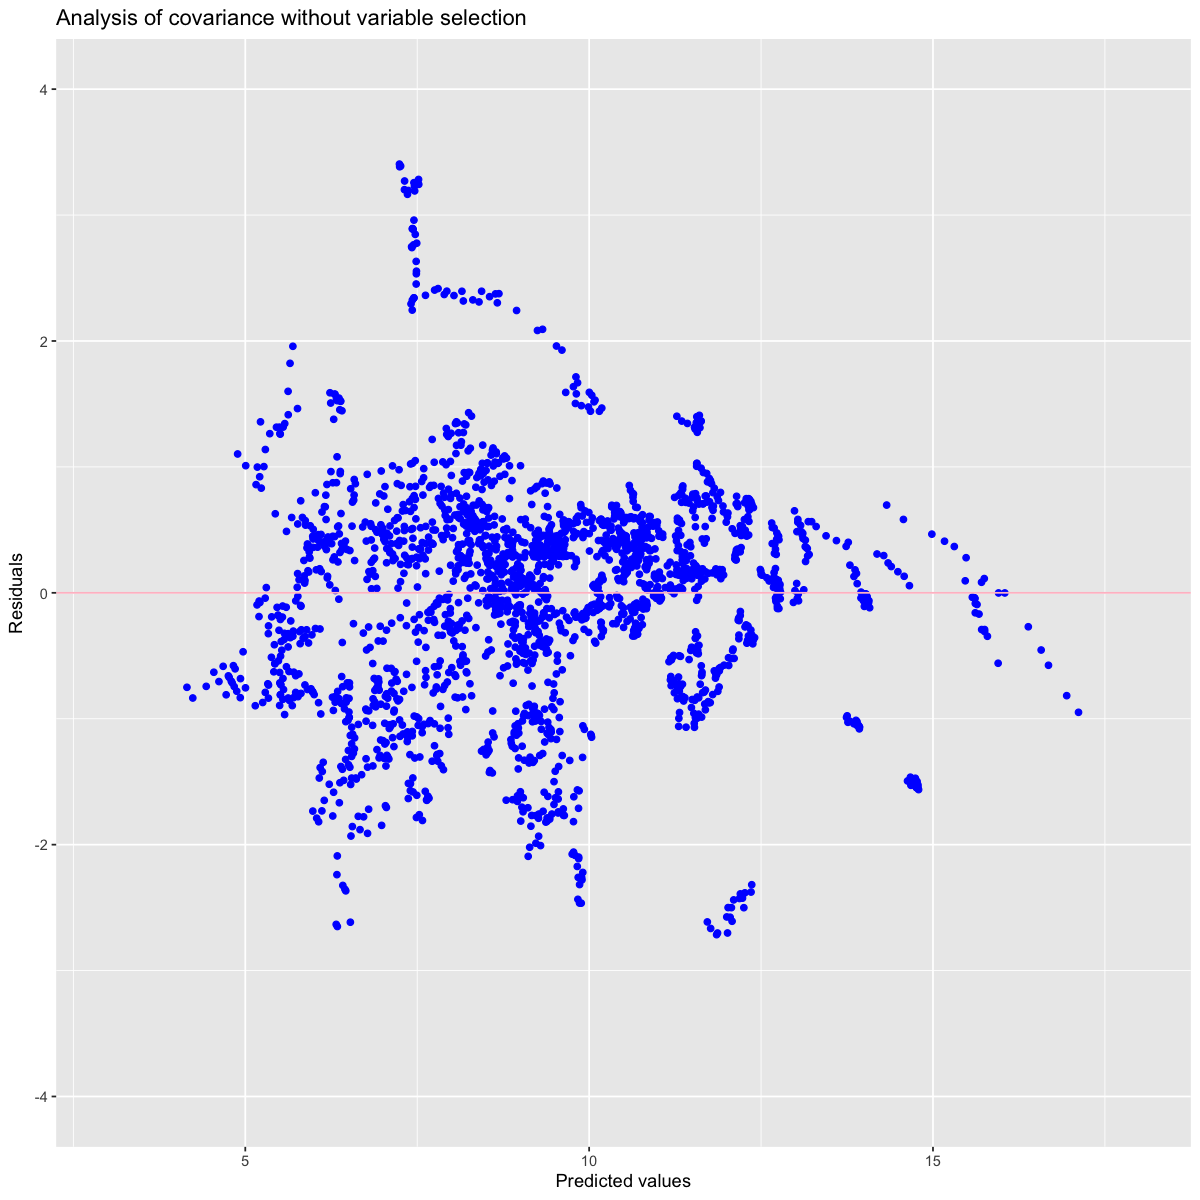

In [31]:
#estimation of the model without interaction
reg.lr <- aov(Value_co2_emissions_kt_by_country ~ . , data = datatrr)
#extraction of residuals and fitted values from this model
res.lr <- reg.lr$residuals
fit.lr <- reg.lr$fitted.values
pred.lr <- reg.lr$predicted.values
#residual graph
gplot.res(fit.lr,res.lr, "Analysis of covariance without variable selection")

Comment on the distribution of residuals. Comment on linearity and homoscedasticity of the model. How valid is it?

In [31]:
summary(reg.lr)

                                                                   Df Sum Sq
Year                                                                1     32
Access.to.electricity....of.population.                             1   3218
Access.to.clean.fuels.for.cooking                                   1    539
Renewable.energy.share.in.the.total.final.energy.consumption....    1     18
Electricity.from.nuclear..TWh.                                      1   2037
Electricity.from.renewables..TWh.                                   1   1574
Low.carbon.electricity....electricity.                              1     98
Primary.energy.consumption.per.capita..kWh.person.                  1     26
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.         1     86
gdp_growth                                                          1     27
gdp_per_capita                                                      1      2
Density.n.P.Km2.                                                    1      0

In [34]:
r2_lr <- rsq(Y_train, fit.lr)
#r2_lr_adj<- adjusted_rsq(Y_test, fit.lr,16)
paste("R2: Linear moel without variable selection. :",r2_lr)
paste("MSE for Linear model without selection:",mean(res.lr^2))

[1] "R2: Linear moel without variable selection. : 0.864839943207808"

[1] "MSE for Linear model without selection: 0.774908486439339"

From the linear regression model, we find that the two variables don't contribute much to the model. these are "gdp_per_capita" and "Density.n.P.Km2." We see this as their p-values, $ P_{H_0}(F>F{obs})$, are greater than the others.

There are several methods for adding penalization to linear models. We will now explore the ridge and lasso regression. 

#### Ridge Regression

Ridge regression works to avoid overfitting by adding constraints to the parameters. This also reduces the variance of the estimators. The constraint is $l_2$ on the parameter $ \beta $. The ridge estimator is defined as follows: 

$\tilde{\beta} = \text{argmin}_{\beta \in \mathbb{R}^{p+1}} \left\{ \sum_{i=1}^{n} \left( Y_i - \sum_{j=0}^{p} X_{j,i} \beta_j \right)^2 + \lambda \sum_{j=1}^{p} \beta_j^2 \right\}$

We will optimise by cross-validation the parameter $\lambda$

Ridge regression does not select variables, so the main weakness of the model is interpretation difficulties, especially if the number of predictors $p$ is large.

[1] 0.003351603
[1] 0.1747528


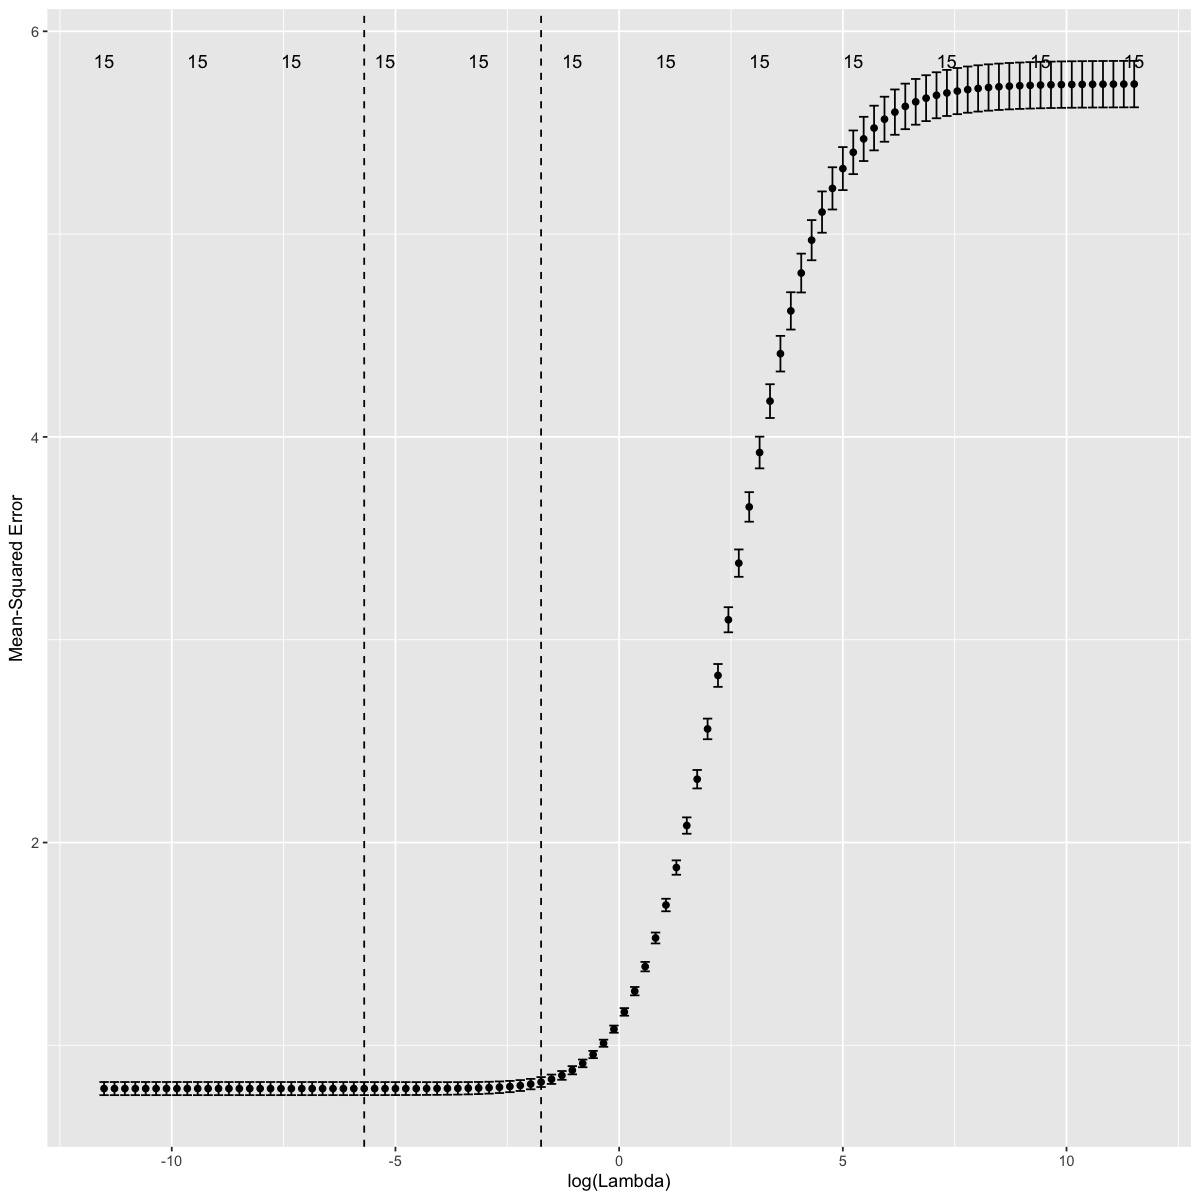

In [35]:
lambdas_to_try <- 10^seq(-5, 5, length.out = 100)
# Setting alpha = 0 implements ridge regression
x.mat <- model.matrix(Value_co2_emissions_kt_by_country ~ . - 1, data = datatrr)
reg.ridge <- glmnet(x = x.mat, 
                         y = Y_train, alpha = 0,standardize = TRUE)
ridge_cv <- cv.glmnet(x = x.mat, 
                         y = Y_train, alpha = 0, lambda = lambdas_to_try,
                      standardize = TRUE, nfolds = 10)
# Plot cross-validation results
autoplot(ridge_cv)
lambda_cv_min <- ridge_cv$lambda.min
lambda_cv_1se <- ridge_cv$lambda.1se
print(lambda_cv_min)
print(lambda_cv_1se)

According to this graph, it seems that we don't see the need to penalize. As log(lambda) decreases, MSE goes to zero. There is no minima. This could indicate that The variables arent overadjusted or overfitted in the first place.
However, the interest of using the lambda 1se value will not impact the interpretability of the graph, but use less variables. This is why it can be interesting to use $\lambda_{1se}$. 

In [36]:
model_cv_min <- glmnet(x = x.mat, 
                         y = Y_train, alpha = 0, lambda = lambda_cv_min, standardize = TRUE)
model_cv_1se <- glmnet(x = x.mat, 
                         y = Y_train, alpha = 0, lambda = lambda_cv_1se, standardize = TRUE)

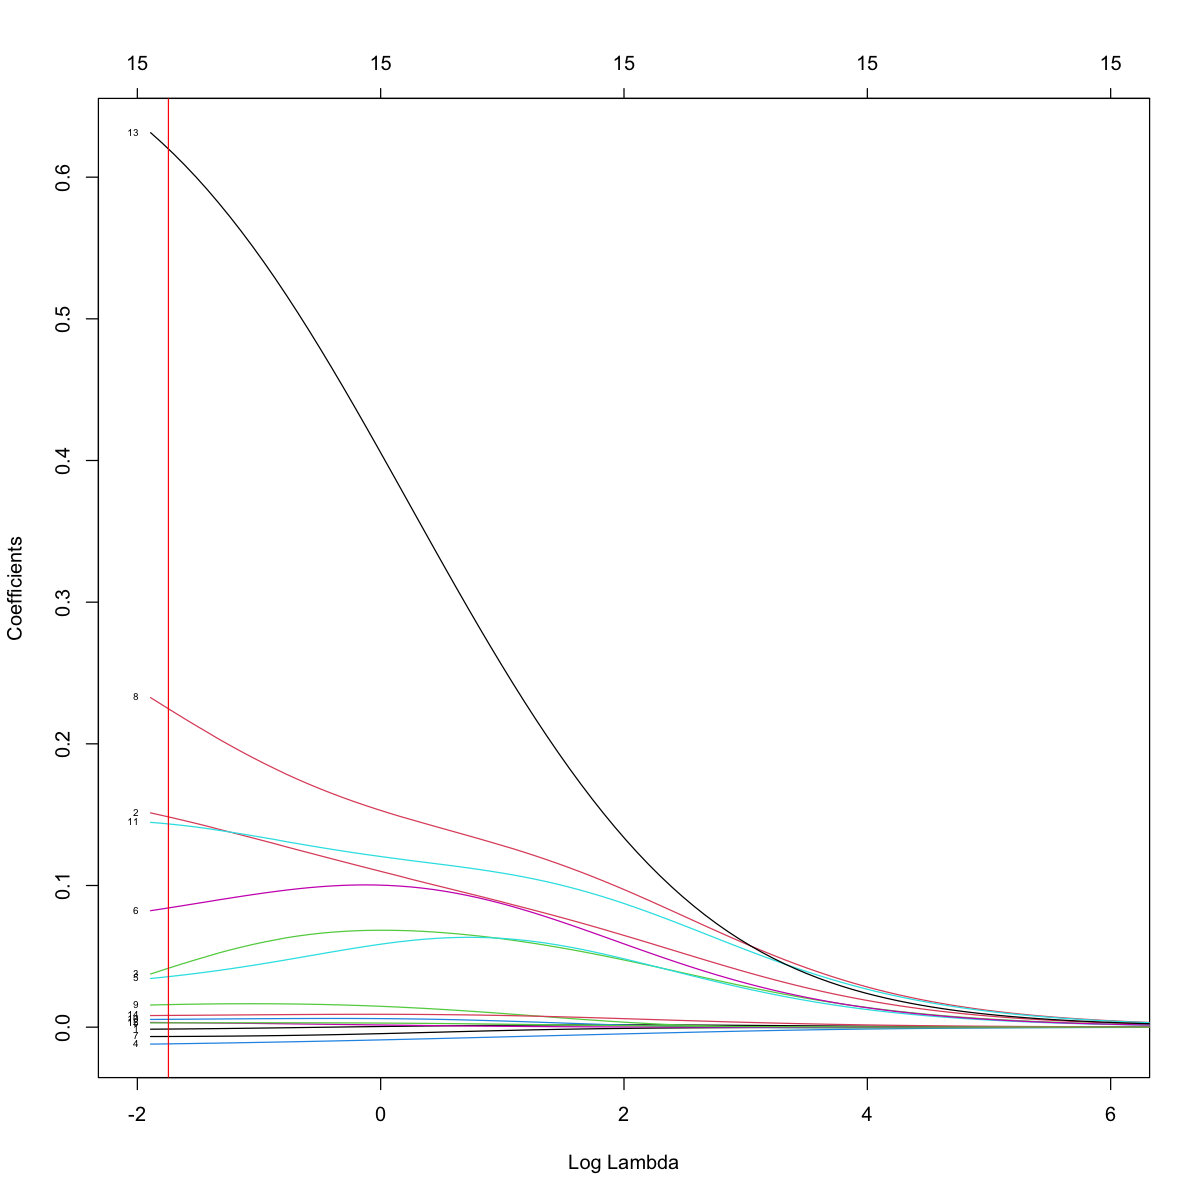

In [37]:
plot(reg.ridge, xvar = "lambda", label = TRUE,xlim=c(-2,6),ylim=c(-0.01,0.63))
abline(v=log(ridge_cv$lambda.1se),col="red")
abline(v=log(ridge_cv$lambda.min),col="blue")

The regularization path of ridge regression is quite smooth. We see that $\lambda_{1se}$ penalizes some values, whereas $\lambda_{min}$ doesn't (the blue line is far to the left).

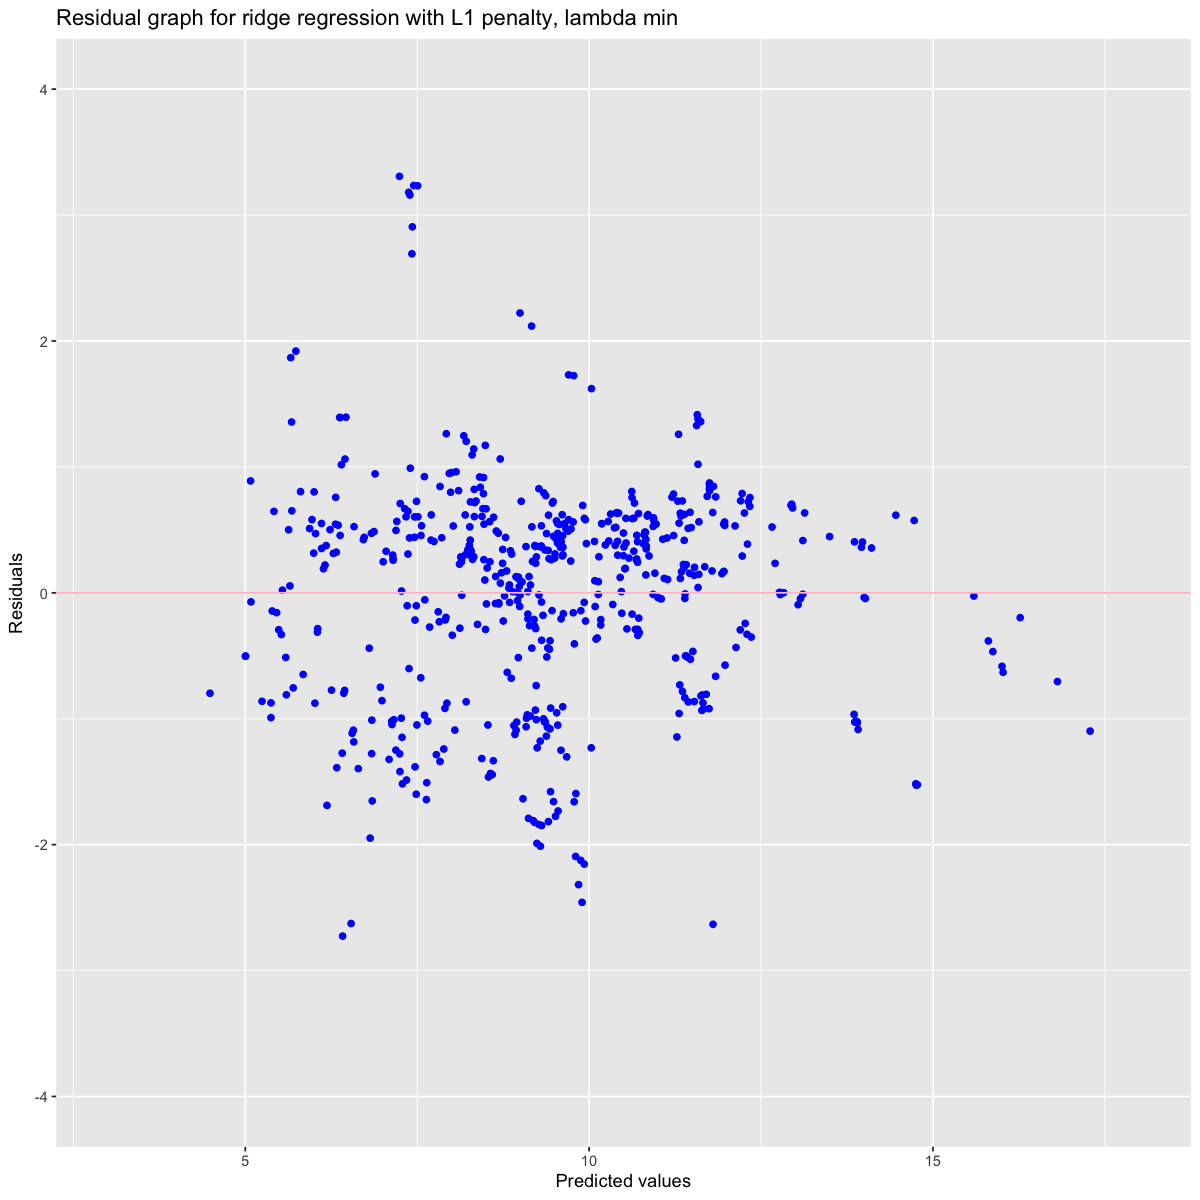

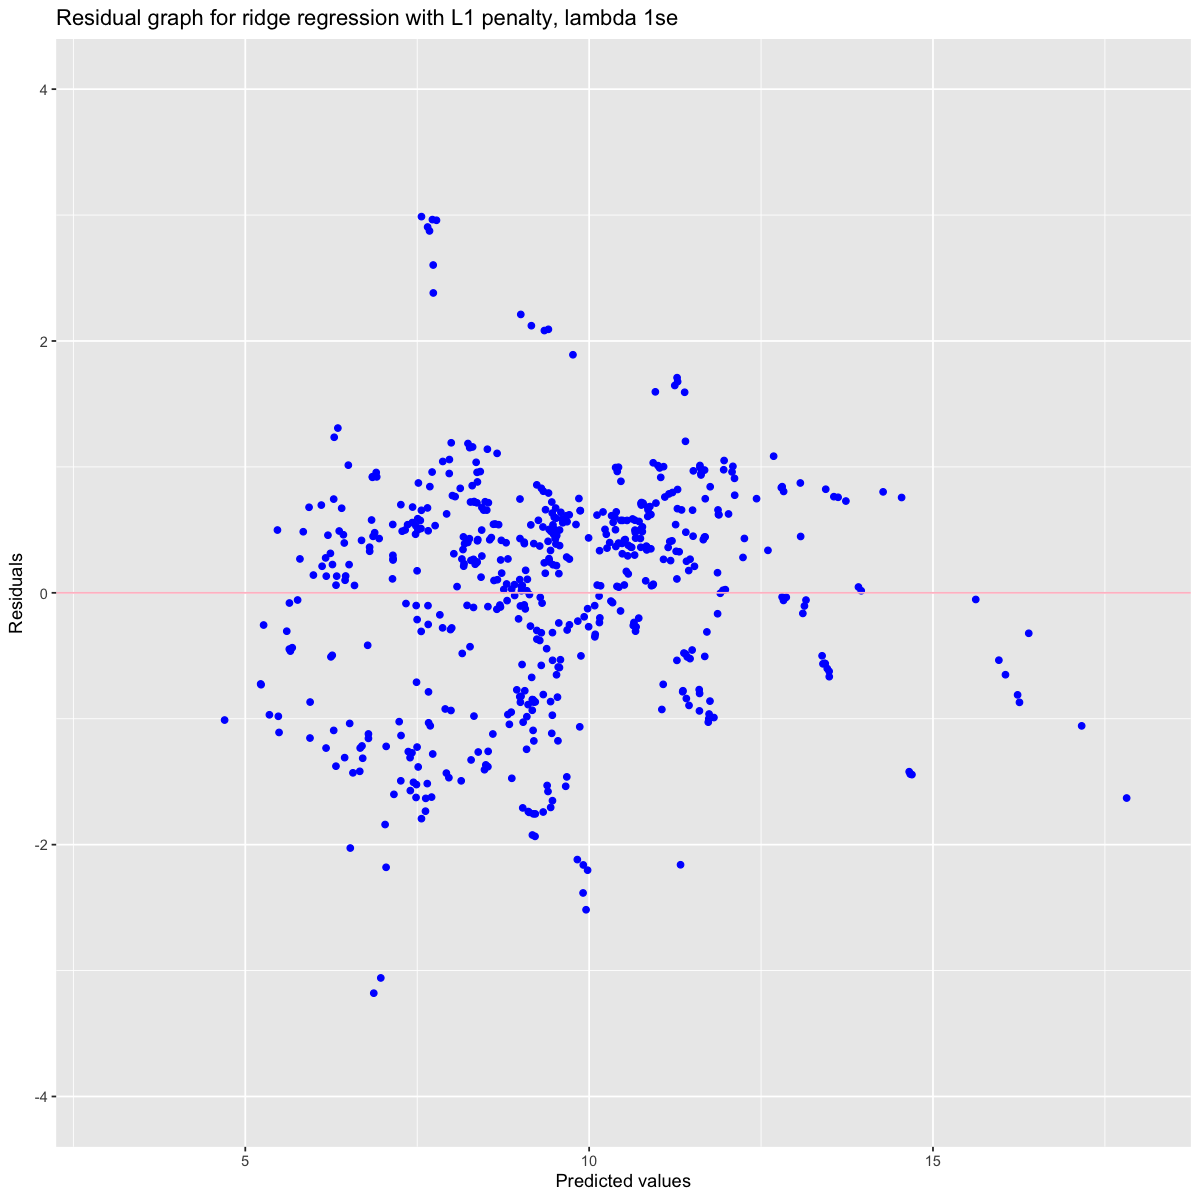

In [38]:
x.mat.test <- model.matrix(Value_co2_emissions_kt_by_country ~ . - 1, data = datatet)
fit.ridge_min <- predict(model_cv_min, x.mat.test)
res.ridge_min <- datatet$Value_co2_emissions_kt_by_country - fit.ridge_min

gplot.res(fit.ridge_min,res.ridge_min, "Residual graph for ridge regression with L1 penalty, lambda min")

fit.ridge_1se <- predict(model_cv_1se, x.mat.test)
res.ridge_1se <- datatet$Value_co2_emissions_kt_by_country - fit.ridge_1se

gplot.res(fit.ridge_1se,res.ridge_1se, "Residual graph for ridge regression with L1 penalty, lambda 1se")

The residual graphs for ridge regresssion with both $\lambda_{min}$ and $\lambda_{1se}$ are very similar to those of the ancova model. This confirms our observations for the cross-validation results. The penalization does not nezscessarily improve the model much, but can be as readable with less coefficients.

In [39]:
paste("MSE: Ridge with lambda.min:",mean(res.ridge_min^2))
paste("MSE: Ridge with lambda.1se:",mean(res.ridge_1se^2))

[1] "MSE: Ridge with lambda.min: 0.766463676830364"

[1] "MSE: Ridge with lambda.1se: 0.808137649316927"

In [40]:
r2_ridge_min <- rsq(Y_test, fit.ridge_min)
r2_ridge_1se <- rsq(Y_test, fit.ridge_1se)
paste("R2: Ridge with lambda.min:",r2_ridge_min)
paste("R2: Ridge with lambda.1se:",r2_ridge_1se)

[1] "R2: Ridge with lambda.min: 0.860139213156345"

[1] "R2: Ridge with lambda.1se: 0.852534737224785"

In [41]:
r2_ridge_min_adj <- adjusted_rsq(Y_test, fit.ridge_min,16)
r2_ridge_1se_adj <- adjusted_rsq(Y_test, fit.ridge_1se,16)
paste("Adjusted R2: Ridge with lambda.min:",r2_ridge_min_adj)
paste("Adjusted R2: Ridge with lambda.1se:",r2_ridge_1se_adj)

[1] "Adjusted R2: Ridge with lambda.min: 0.856121668112363"

[1] "Adjusted R2: Ridge with lambda.1se: 0.84829875122047"

The R-squared is (rounded) 0.86 for both models. This means that the ridge model with $\lambda_{min}$ and $\lambda_{1se}$ penalization was able to explain 86% of the variance in the response values of the training data.

#### L1 regularisation (LASSO)

LASSO regression is advantageous compared to the ridge regression in the sense that with variable selection, results are more interpretable. Lasso stands for Least Absolute Shrinkage and Selection Operator. The lasso estimator is defined as follows: 

$$
\beta_{\text{Lasso}} = \text{argmin}_{\beta \in \mathbb{R}^{p+1}} \left\{ \sum_{i=1}^{n} \left( Y_i - \sum_{j=0}^{p} X_{i}^{(j)} \beta_j \right)^2 + \lambda \sum_{j=1}^{p} |\beta_j| \right\}
$$

As with ridge, we will optimise $\lambda > 0$ to tune the model.

In [42]:
# Only looking at quantitative variables 
reg.lasso.quanti <- glmnet (y = datatrr[, 12], 
                            x = as.matrix(datatrr[, ]))
# -1 removes the intercept
x.mat <- model.matrix(Value_co2_emissions_kt_by_country ~ . - 1, data = datatrr)
reg.lasso <- glmnet(y = datatrr$Value_co2_emissions_kt_by_country, x = x.mat)

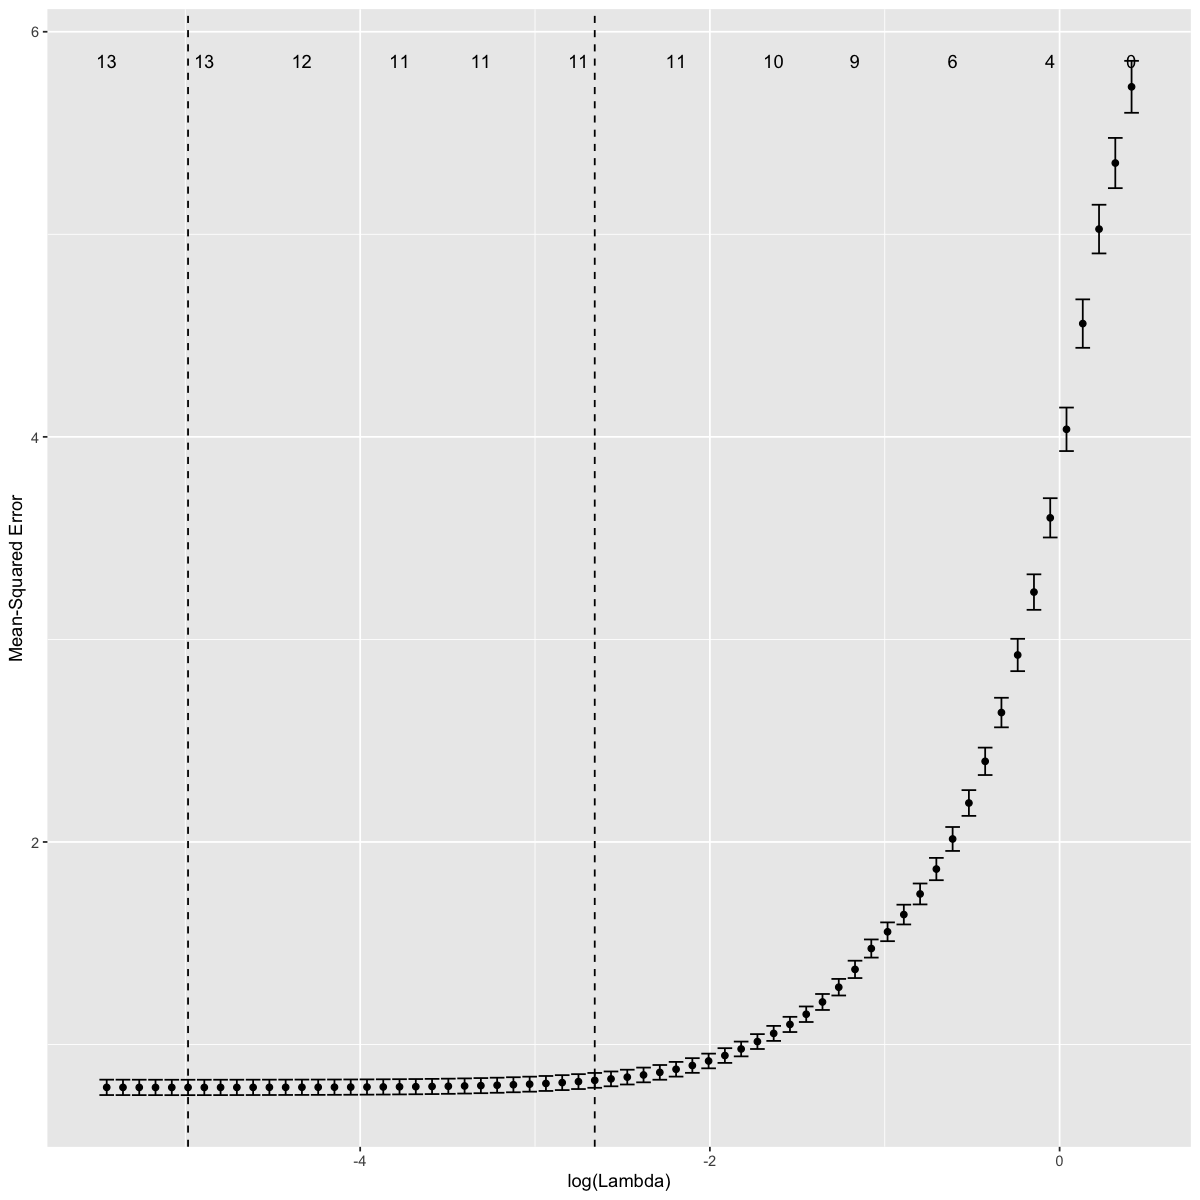

In [43]:
reg.lasso.cross.validation <- cv.glmnet(y = Y_train, x = x.mat)
autoplot(reg.lasso.cross.validation)

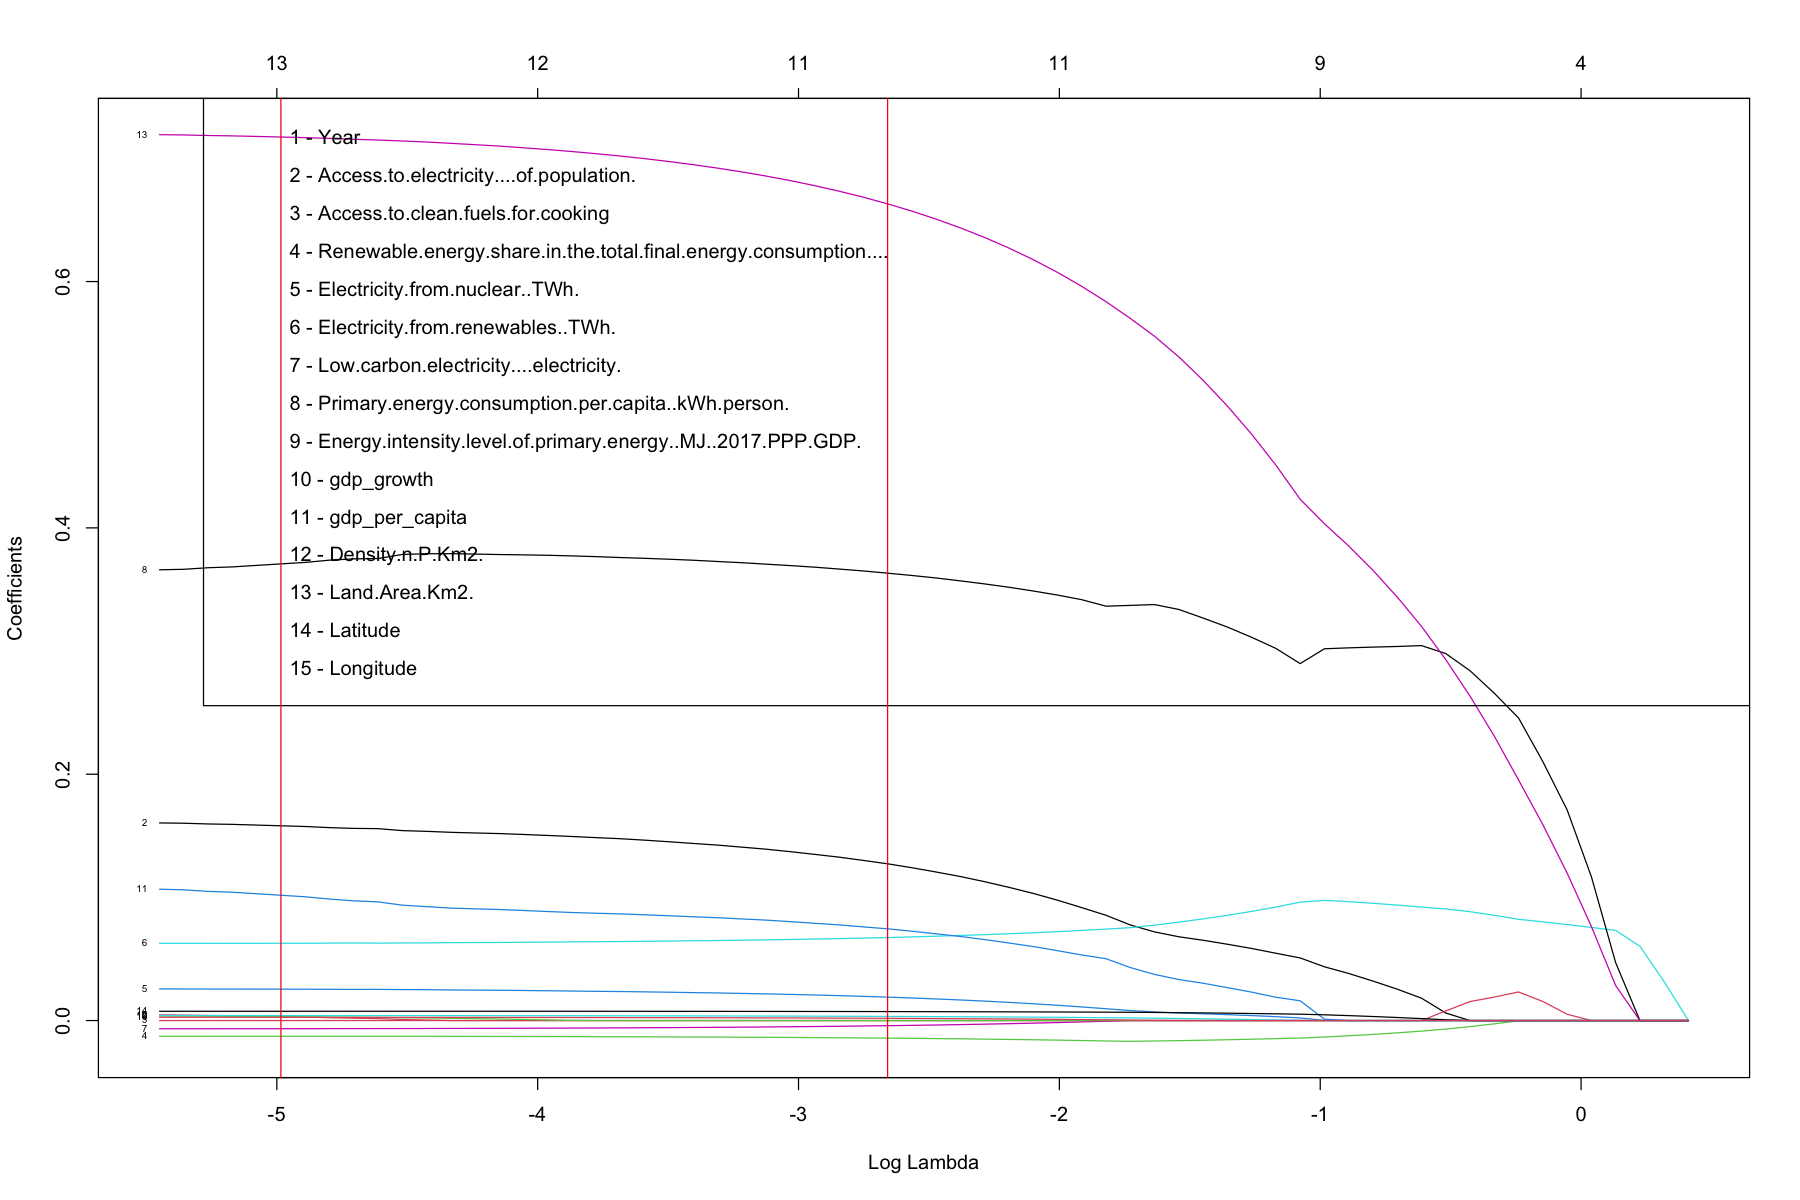

In [44]:
options(repr.plot.width=15, repr.plot.height = 10)
plot(reg.lasso, xvar = "lambda", label = TRUE)
legend("topright", 
      legend = paste(1:ncol(x.mat), "-", colnames(x.mat)))
abline(v=log(reg.lasso.cross.validation$lambda.1se),col="red")
abline(v=log(reg.lasso.cross.validation$lambda.min),col="red")

In lasso regression, the regularization path results in some coefficients being exactly zero as the regularization parameter increases. This is because lasso regression employs an L1 penalty, which encourages sparsity in the coefficient vector. Lasso has a tendency to perform feature selection by setting coefficients of less important features to zero. This is the case for the variables "Access.to.clean.fuels.for.cooking ", "Year", "Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP." and "gdp_growth " for $\lambda_{1se}$. For $\lambda_{min}$ the coefficients set to zero are for "Year" and "Access.to.clean.fuels.for.cooking  "

In [45]:
paste("cross validation estimate of lambda :", round(reg.lasso.cross.validation$lambda.1se, 3))
coef(reg.lasso.cross.validation, s = "lambda.1se")
coef_lasso_1se = coef(reg.lasso.cross.validation, s = "lambda.1se")

[1] "cross validation estimate of lambda : 0.07"

16 x 1 sparse Matrix of class "dgCMatrix"
                                                                           s1
(Intercept)                                                      -3.437903564
Year                                                              .          
Access.to.electricity....of.population.                           0.127259386
Access.to.clean.fuels.for.cooking                                 .          
Renewable.energy.share.in.the.total.final.energy.consumption.... -0.014263003
Electricity.from.nuclear..TWh.                                    0.019024483
Electricity.from.renewables..TWh.                                 0.067390392
Low.carbon.electricity....electricity.                           -0.004171691
Primary.energy.consumption.per.capita..kWh.person.                0.363224690
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.       .          
gdp_growth                                                        .          
gdp_per_capita        

In [46]:
paste("cross validation estimate of lambda :", round(reg.lasso.cross.validation$lambda.min, 3))
coef(reg.lasso.cross.validation, s = "lambda.min")


[1] "cross validation estimate of lambda : 0.007"

16 x 1 sparse Matrix of class "dgCMatrix"
                                                                           s1
(Intercept)                                                      -4.703886480
Year                                                              .          
Access.to.electricity....of.population.                           0.158123548
Access.to.clean.fuels.for.cooking                                 .          
Renewable.energy.share.in.the.total.final.energy.consumption.... -0.012778725
Electricity.from.nuclear..TWh.                                    0.025492294
Electricity.from.renewables..TWh.                                 0.062765091
Low.carbon.electricity....electricity.                           -0.006621066
Primary.energy.consumption.per.capita..kWh.person.                0.370765870
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.       0.003178932
gdp_growth                                                        0.003162892
gdp_per_capita        

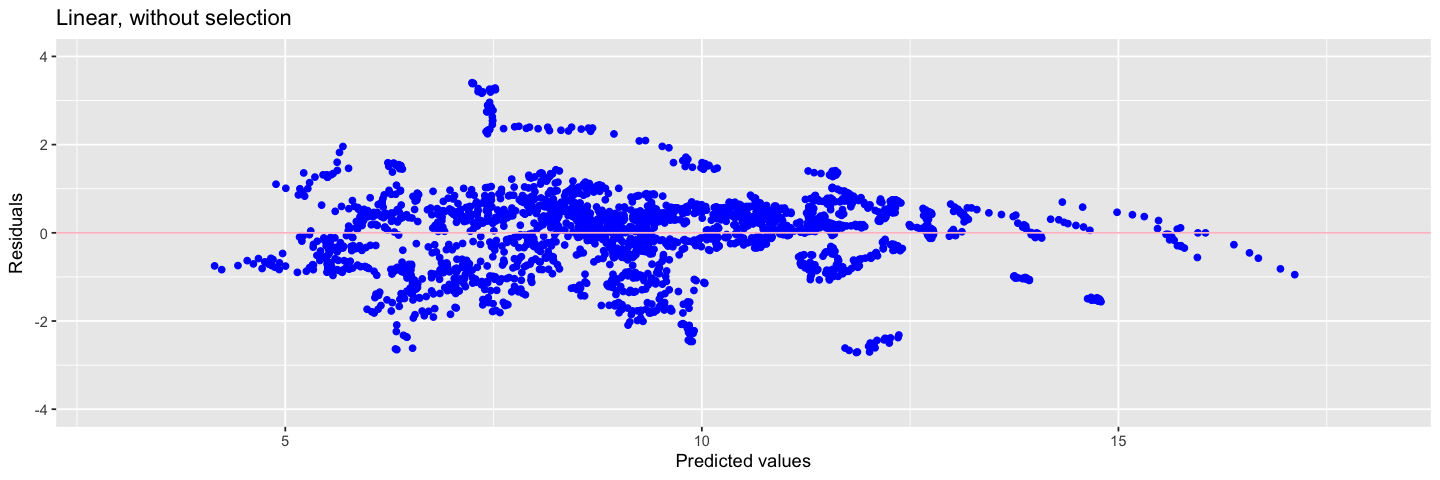

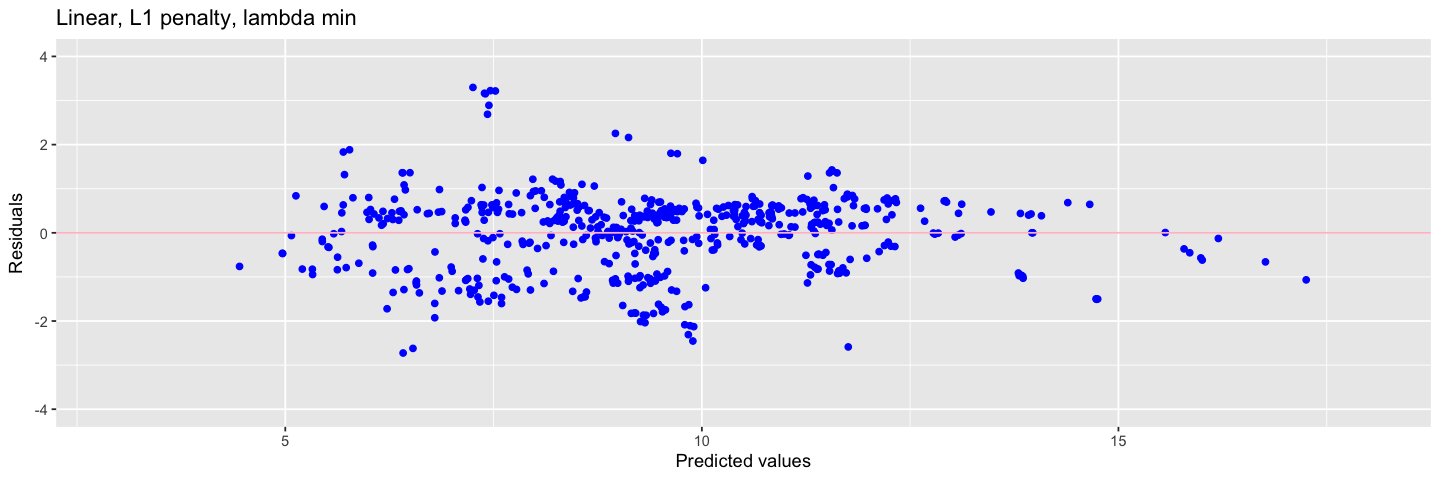

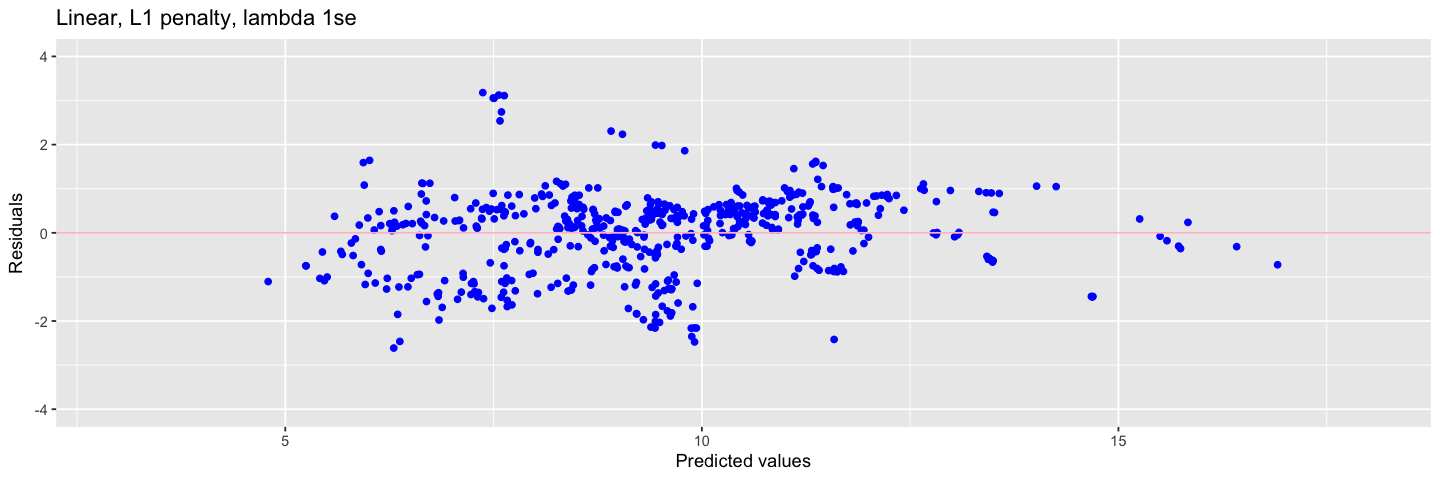

In [47]:
# Extraction of fitted values and residuals
x.mat.test <- model.matrix(Value_co2_emissions_kt_by_country ~ . - 1, data = datatet)
fit.lasso <- predict(reg.lasso.cross.validation, s = "lambda.min", newx = x.mat.test)
res.lasso <- datatet$Value_co2_emissions_kt_by_country - fit.lasso

fit.lasso.1se <- predict(reg.lasso.cross.validation, s = "lambda.1se", newx = x.mat.test)
res.lasso.1se <- datatet$Value_co2_emissions_kt_by_country - fit.lasso.1se 
# Graph of the residuals
options(repr.plot.width = 12, repr.plot.height = 4)
par(mfrow = c(1, 3))
gplot.res(fit.lr, res.lr, "Linear, without selection")
gplot.res(fit.lasso, res.lasso, "Linear, L1 penalty, lambda min")
gplot.res(fit.lasso.1se, res.lasso.1se, "Linear, L1 penalty, lambda 1se")

In [48]:
paste("Linear model without selection:",mean(res.lr^2))
paste("LASSO with lambda.min:",mean(res.lasso^2))
paste("LASSO with lambda.1se:",mean(res.lasso.1se^2))

[1] "Linear model without selection: 0.774908486439339"

[1] "LASSO with lambda.min: 0.76675176766419"

[1] "LASSO with lambda.1se: 0.797375044812178"

In [49]:
r2_lasso_min <- rsq(Y_test, fit.lasso)
r2_lasso_1se <- rsq(Y_test, fit.lasso.1se)
paste("R2: Lasso with lambda.min:",r2_lasso_min)
paste("R2: Lasso with lambda.1se:",r2_lasso_1se)

[1] "R2: Lasso with lambda.min: 0.860086643658378"

[1] "R2: Lasso with lambda.1se: 0.854498648079304"

In [50]:
r2_lasso_min_adj <- adjusted_rsq(Y_test, fit.lasso,16)
r2_lasso_1se_adj <- adjusted_rsq(Y_test, fit.lasso.1se,16)
paste("Adjusted R2: Ridge with lambda.min:",r2_lasso_min_adj)
paste("Adjusted R2: Ridge with lambda.1se:",r2_lasso_1se_adj)

[1] "Adjusted R2: Ridge with lambda.min: 0.85606758853905"

[1] "Adjusted R2: Ridge with lambda.1se: 0.850319076031313"

We obtain very similar results to the ridge model. Firstly, when comparing the residual plots with the one for ancova, the shape and size is almost identical. The mean squared error and R-squared value is slightly worse for $\lambda_{1se}$ penalization than for $\lambda_{min}$ penalization. This is logical as $\lambda_{1se}$ removes more variables, and explicability, than $\lambda_{min}$ and ancova. The adjusted $R²$ value is slightly lower than the $R²$ value. The adjusted value takes into account the complexity of the model. It shows that the $\lambda_{min}$ penalization is a better choice for the explicability of the model. 

### K Nearest Neighbor

When performing a kNN regression, the choice of the hyperperameter $k$ is important.  A smaller value of $k$ leads to a more flexible model with higher variance but lower bias, whereas a larger value of $k$ results in a smoother decision boundary with lower variance but potentially higher bias. We start by performing cross validation to find the optimal value. 

In [51]:
knn_model <- knn(datatrr,
                 datatet,
                 cl=datatrr[, "Value_co2_emissions_kt_by_country"],
                 k=1)
ctrl <- trainControl(method = "cv", number = 10)  # 10-fold cross-validation
k_values <- data.frame(k = seq(1, 15, by = 1))  # range of k values to try
knn_grid <- expand.grid(.k = k_values)
knn_cv <- train(Value_co2_emissions_kt_by_country ~ ., data = datatrr, method = "knn", trControl = ctrl, tuneGrid = knn_grid)

print(knn_cv)

# Choose the optimal k
optimal_k <- knn_cv$bestTune$k


k-Nearest Neighbors 

2294 samples
  15 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 2065, 2064, 2065, 2064, 2066, 2063, ... 
Resampling results across tuning parameters:

  k   RMSE       Rsquared   MAE       
   1  0.1524717  0.9953191  0.08328003
   2  0.1640142  0.9946595  0.08329946
   3  0.1798543  0.9935962  0.09194741
   4  0.2015882  0.9921364  0.10406428
   5  0.2211308  0.9907018  0.11733433
   6  0.2414944  0.9891838  0.13146687
   7  0.2738057  0.9865798  0.15135451
   8  0.3142243  0.9826525  0.17219239
   9  0.3581068  0.9774492  0.19192103
  10  0.3967398  0.9721999  0.21485719
  11  0.4310796  0.9671123  0.23648584
  12  0.4709956  0.9607296  0.26476851
  13  0.5202740  0.9524540  0.30251413
  14  0.5786964  0.9421541  0.35062794
  15  0.6461904  0.9290658  0.40511247

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was k = 1.


By cross-validation, the optimal value for the number of neighbors is 1. This means our model has low bias and high variance. The model can be sensitive to noise and local fluctuations in the data. It can capture fine-grained patterns, but might not generalize well on unseen data; there is a risk of overfitting. 

In [52]:
knn_tuned <- knn(train = datatrr, test = datatet,
                       cl = datatrr[, "Value_co2_emissions_kt_by_country"], k = optimal_k)

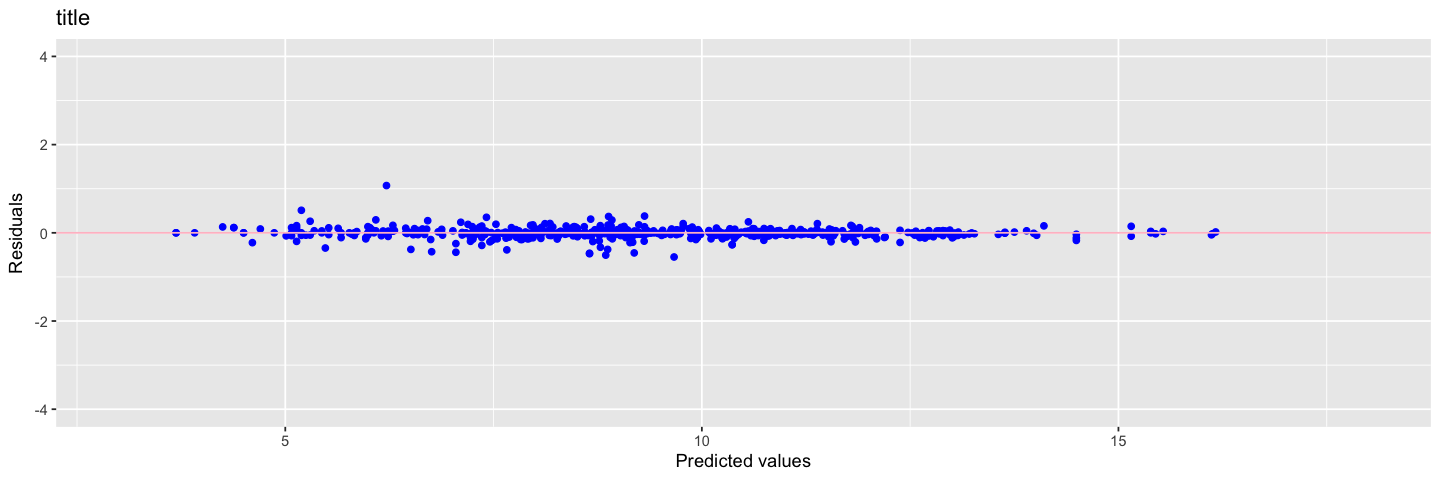

In [53]:
Y_test <- as.numeric(as.character(Y_test))
knn_tuned <- as.numeric(as.character(knn_tuned))
res.knn = Y_test  - knn_tuned
gplot.res(x=knn_tuned,y=res.knn)

In [54]:
#Mean squared Error
#pred.knn=predict(final_knn_model,newdata=datatet)
err_knn = mean(res.knn^2)
paste("MSE: Knn:",err_knn)

[1] "MSE: Knn: 0.0140040282200874"

In [55]:
#R2 score
r2_knn <- 1 - sum(res.knn^2) / sum((Y_test - mean(Y_test))^2)
paste("R2 score for kNN:",r2_knn)

[1] "R2 score for kNN: 0.99744460896837"

In [56]:
r2_knn_adj <- adjusted_rsq(Y_test, knn_tuned, 15)
paste("Adjusted R2 score for kNN:",r2_knn_adj)

[1] "Adjusted R2 score for kNN: 0.997375915661069"

The residual plot is more centered around the x-axis then for the linear models. This indicates that kNN performs better. This is confirmed when looking as the values for MSE and R-squared. A significant improvement from the previous section. <br/><br/>
As kNN doesn't assume a specific form as the linear model, it adapt locally to the data. It is also less sensitive to outliers as they are only influential for their immidiate neighbors.<br/><br/>
However, linear models are easier to interpret as they provide explicit coefficients which is not the case for kNN.
The values for mean squared error and R2 score are very good for the kNN model. However, it can imply that the model is overfitted as k=1. This may indicate that the knn algorithm makes classes with countries that are next to each other or the year before or after, which does not give us much information.

### Support Vector Regression (SVR)

SVR is a powerful regression tool. SVR aims to find the optimal hyperplane that best fits the data while minimizing the prediction error within a specified margin. It uses a regularization parameter to control the trade-off between the model complexity and the error tolerance. For data that is not lenearly seperable, we use the kernel trick.

To justify the choice of kernel, we will perform a cross-validation on each kernel. When we have found the best values for cost and gamma, we re-perform the svm algorithm on each kernel. Then we calculate the mean squared error nd R² value to choose the best one. The different kernels are; 

- Linear Kernel: $ k(\mathbf{x}, \mathbf{x'}) = \langle \mathbf{x}, \mathbf{x'} \rangle .$
- Gaussian Kernel (RBF): $ k(\mathbf{x}, \mathbf{x'}) = e^{- \frac{\| \mathbf{x} - \mathbf{x'} \|^2}{2\sigma^2}} $ It returns values in an infinite-dimensional space.

- $p$ degree Polynomial Kernel: $ k(\mathbf{x}, \mathbf{x'}) = (1 + \langle \mathbf{x}, \mathbf{x'} \rangle)^p $. The default value of $p$ is 3. This is the value we chose to test.

- Sigmoid Kernel: $ k(\mathbf{x}, \mathbf{x'}) = \tanh(\kappa \langle \mathbf{x}, \mathbf{x'} \rangle + \theta) $. (This kernel is not positive definite).



#### Linear kernel


Call:
svm(formula = Value_co2_emissions_kt_by_country ~ ., data = datatrr, 
    kernel = "linear", cost = optimal_cost, epsilon = optimal_e)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  linear 
       cost:  0.1 
      gamma:  0.06666667 
    epsilon:  0.1 


Number of Support Vectors:  1509






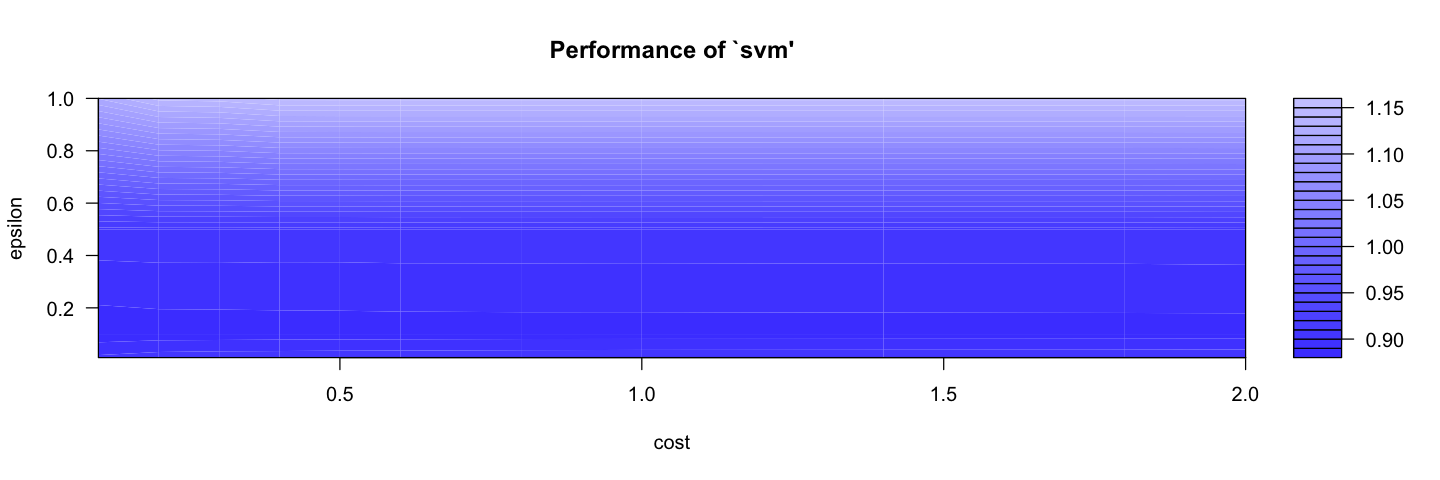

In [57]:
### Find the index of "linear" in kernel_types
svm.reg.tune.lin = tune.svm(Value_co2_emissions_kt_by_country ~ ., 
                          data = datatrr, 
                          kernel = "linear", 
                          cost = c(0.1,0.2,0.3,0.4,0.5,0.6, 0.8,1, 1.4,1.8, 2),
                          epsilon = c(0.01,0.1,0.5,1))
plot(svm.reg.tune.lin)
optimal_cost = svm.reg.tune.lin$best.parameters$cost
optimal_e = svm.reg.tune.lin$best.parameters$epsilon
# Fit SVM with the optimal parameters for the linear kernel
svm.reg.linear <- svm(Value_co2_emissions_kt_by_country ~ ., 
      ss                  data = datatrr, 
                        kernel = "linear", 
                        cost = optimal_cost,
                        epsilon = optimal_e)
summary(svm.reg.linear)

In [58]:
pred.svmr.linear=predict(svm.reg.linear,newdata=datatet)
# Mean squared error of prediction
err_svm_linear = sum((pred.svmr.linear-Y_test)^2)/nrow(datatet)
paste("MSE for linear kernel svm :", err_svm_linear)
#fit.svmr <- predict(reg.lasso.cross.validation, s = "lambda.min", newx = x.)
#fit.svmr = svm.reg.linear$fitted
r2_svm <- rsq(Y_test, pred.svmr.linear)
paste("R2 score for linear kernel svm :",r2_svm)

#r2_svm_adj <- adjusted_rsq(Y_test, pred.svmr.linear,15)
#paste("Adjusted R2 score for linear kernel svm :",r2_svm_adj)

[1] "MSE for linear kernel svm : 0.842597030641327"

[1] "R2 score for linear kernel svm : 0.846246746897433"

[1] "Adjusted R2 score for linear kernel svm : 0.84211359493231"

#### Gaussian kernel

Remark: This model chose a high C, the cross validation chose this value because it provided the best trade-off between model complexity and accuracy.

In [59]:
svm.reg.tune.rad = tune.svm(Value_co2_emissions_kt_by_country ~ ., 
                          data = datatrr, 
                          kernel = "radial", 
                          cost = c(6, 8, 10, 12), 
                          gamma = seq(0.02, 0.19, by = 0.03),
                          epsilon = c(0.1, 0.5, 0.8))
            
#plot(svm.reg.tune.rad)
optimal_cost = svm.reg.tune.rad$best.parameters$cost
optimal_gamma = svm.reg.tune.rad$best.parameters$gamma
optimal_e = svm.reg.tune.rad$best.parameters$epsilon
# Fit SVM with the optimal parameters for the linear kernel
svm.reg.radial <- svm(Value_co2_emissions_kt_by_country ~ ., 
                        data = datatrr, 
                        kernel = "radial", 
                        cost = optimal_cost, 
                        gamma = optimal_gamma,
                        epsilon = optimal_e)

# Print the SVM model summary
summary(svm.reg.radial)


Call:
svm(formula = Value_co2_emissions_kt_by_country ~ ., data = datatrr, 
    kernel = "radial", cost = optimal_cost, gamma = optimal_gamma, 
    epsilon = optimal_e)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  12 
      gamma:  0.05 
    epsilon:  0.1 


Number of Support Vectors:  435






In [66]:
pred.svmr.radial=predict(svm.reg.radial,newdata=datatet)
# Mean squared error of prediction
err_svm_radial = sum((pred.svmr.radial-datatet[,"Value_co2_emissions_kt_by_country"])^2)/nrow(datatet)
print(paste("MSE for radial kernel svm :", err_svm_radial))

#fit.svmr.radial = svm.reg.radial$fitted
r2_svm_rad <- rsq(Y_test, pred.svmr.radial)
paste("R2 score for radial kernel svm :",r2_svm_rad)

#r2_svm_adj_rad <- adjusted_rsq(Y_test, pred.svmr.radial,435)
#paste("Adjusted R2 score for radial kernel svm :",r2_svm_adj_rad)

[1] "MSE for radial kernel svm : 0.0515364495413311"


[1] "R2 score for radial kernel svm : 0.990595864354869"

#### Polynomial kernel

Due to high computational time, we chose to fix the parameters for the polynomial kernel. The cross-validation process took up to two hours in R, so the best values are taken from the simpulation in python. 

In [61]:
svm.reg.poly <- svm(Value_co2_emissions_kt_by_country ~ ., 
                        data = datatrr, 
                        kernel = "polynomial", 
                        cost = 10, 
                        gamma = 0.1,
                        epsilon = 0.01,
                        degree = 3)

pred.svmr.poly=predict(svm.reg.poly,newdata=datatet)
# Mean squared error of prediction
err_svm_poly = sum((pred.svmr.poly-datatet[,"Value_co2_emissions_kt_by_country"])^2)/nrow(datatet)
print(paste("MSE for polynomial kernel svm :", err_svm_poly))

#fit.svmr.radial = svm.reg.radial$fitted
r2_svm_poly <- rsq(Y_test, pred.svmr.poly)
paste("R2 score for polynomial kernel svm :",r2_svm_poly)

[1] "MSE for polynomial kernel svm : 0.0885411912072228"


[1] "R2 score for polynomial kernel svm : 0.983843408311889"

#### Sigmoid kernel

We do the same with the sigmoid kernel, the parameters for cost, gamma and epsilon are taken from python as the running time was too important. 

In [123]:
svm.reg.sig <- svm(Value_co2_emissions_kt_by_country ~ ., 
                         data = datatrr, 
                        kernel = "sigmoid", 
                        cost = 0.4, 
                        gamma = 0.1,
                        epsilon = 1)

pred.svmr.sig=predict(svm.reg.sig,newdata=datatet)
# Mean squared error of prediction
err_svm_sig = sum((pred.svmr.sig-datatet[,"Value_co2_emissions_kt_by_country"])^2)/nrow(datatet)
print(paste("MSE for sigmoid kernel svm :", err_svm_sig))

#fit.svmr.radial = svm.reg.radial$fitted
r2_svm_sig <- rsq(Y_test, pred.svmr.sig)
paste("R2 score for sigmoid kernel svm :",r2_svm_sig)

[1] "MSE for sigmoid kernel svm : 1207.17669328265"


[1] "R2 score for sigmoid kernel svm : -219.280082782318"

For the sigmoid kernel, the values for mean squared error and $R^2$ do not make sense. This could be due to a bug, but we did not figure out the specific reason. In any case, the sigmoid kernel did not perform well in python, so we will not keep it for further analysis. 

#### Conclusion on SVR

After studing all four kernels, we conclude that the gaussian kernel perfoms best. With the optimal value for cost = 12, epsilon = 0.1 and gamma = 0.05. The mean squared error is 0.0515 and the R² score is 0.995. 

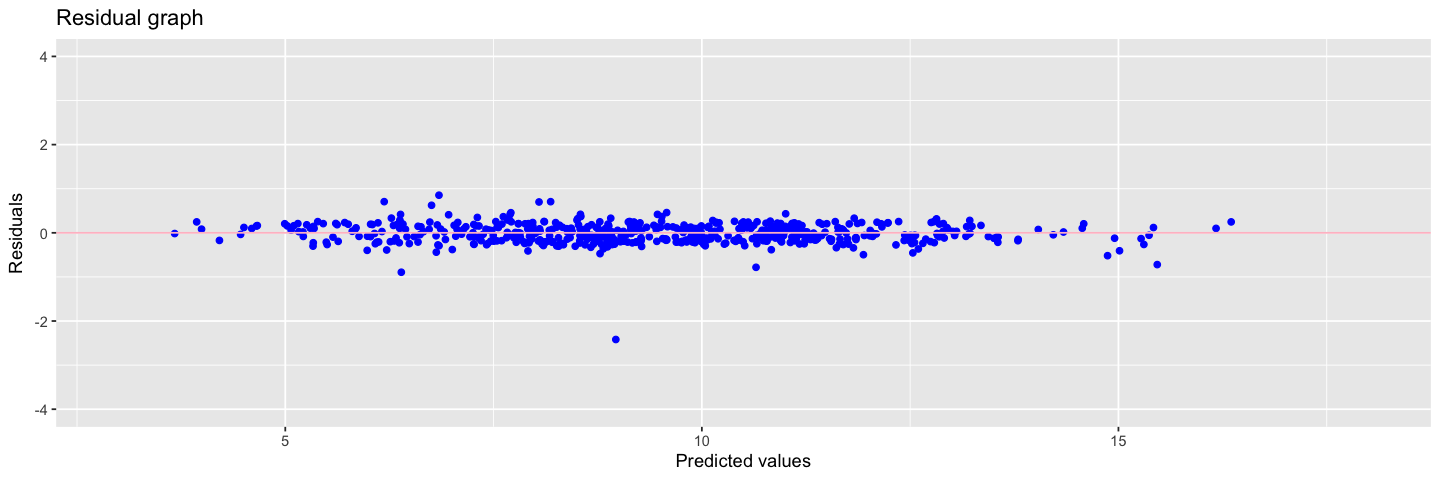

In [63]:
#computes the graph of residuals
res.svmr = pred.svmr.radial - datatet[, "Value_co2_emissions_kt_by_country"]
gplot.res(pred.svmr.radial, res.svmr, title = "Residual graph")

For the optimal svr model, we observe a similar trend to that of the kNN on the residual plot. This and the MSE and R-squared values indicate that it is also better performing than the linear models. 

### Optimal tree : CART

Optimal trees, or decision trees, use the CART algorithm for it's regression. The CART algorithm is a nonparametric method that creates decision rules from the given dataset. We will see that it is easy to interpret and the prediction of new values can be seen as a long list of if loops.

The only parameter we set for the cross validation of the decision tree regressor is the cp, the list of complexity values. This parameter makes sure we do not overfit our model, and controls the complexity of the tree. It sets a threshold for the minimum improvement in the model's fit that must be achieved by each split in the tree. If a split does not improve the model's fit by at least this amount, it is not considered.

In [67]:
tree.reg=rpart(Value_co2_emissions_kt_by_country~.,data=datatrr,control=rpart.control(cp=0.001))

We will prune the data to obtain a good prediction with a simpler model. 

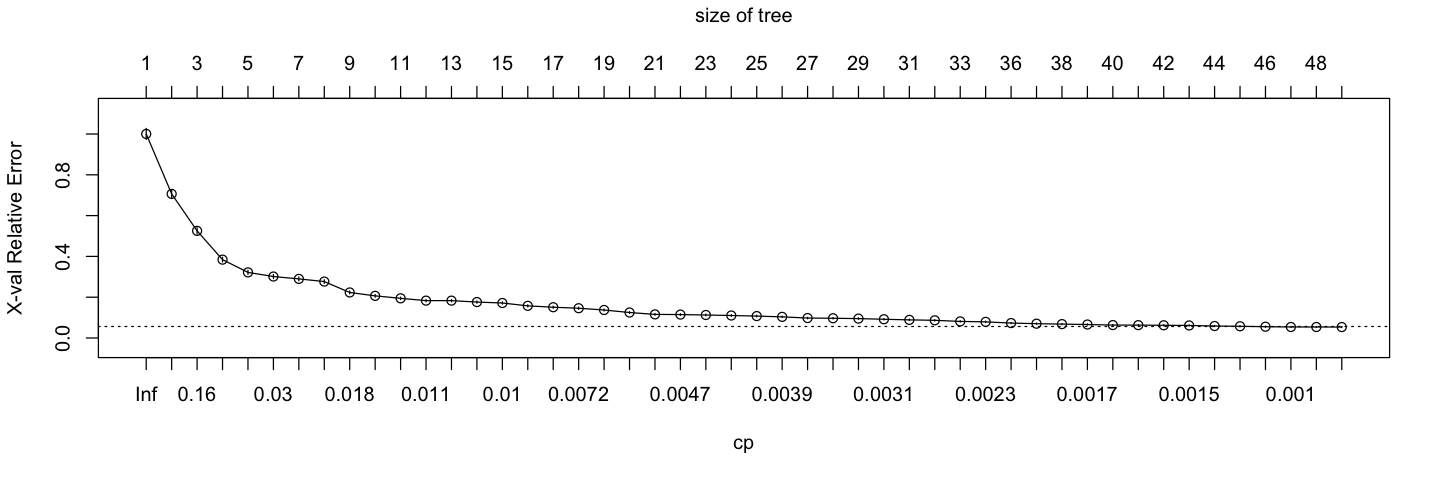

In [68]:
xmat<-xpred.rpart(tree.reg,xval=10) 
# one row for each observation and one column for each complexity value

# Cross-validation error by CP value
CVerr<-apply((xmat-datatrr[,"Value_co2_emissions_kt_by_country"])^2,2,sum)

plotcp(tree.reg)

[1] 0.001002856

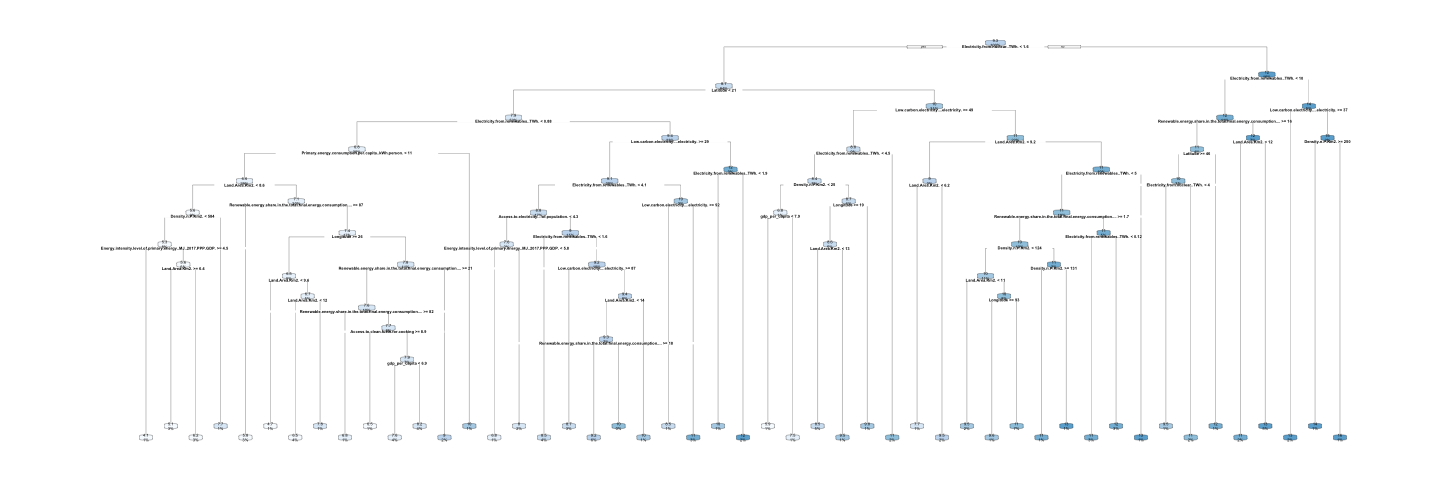

In [69]:
#We plot the tree with the ideal peuning parameter selected y=by cross validation
as.numeric(attributes(which.min(CVerr))$names)
tree.reg=rpart(Value_co2_emissions_kt_by_country~.,data=datatrr,parms=list(split="information"),control=rpart.control(cp=as.numeric(attributes(which.min(CVerr))$names)))
rpart.plot(tree.reg) #,type=5,extra=101)

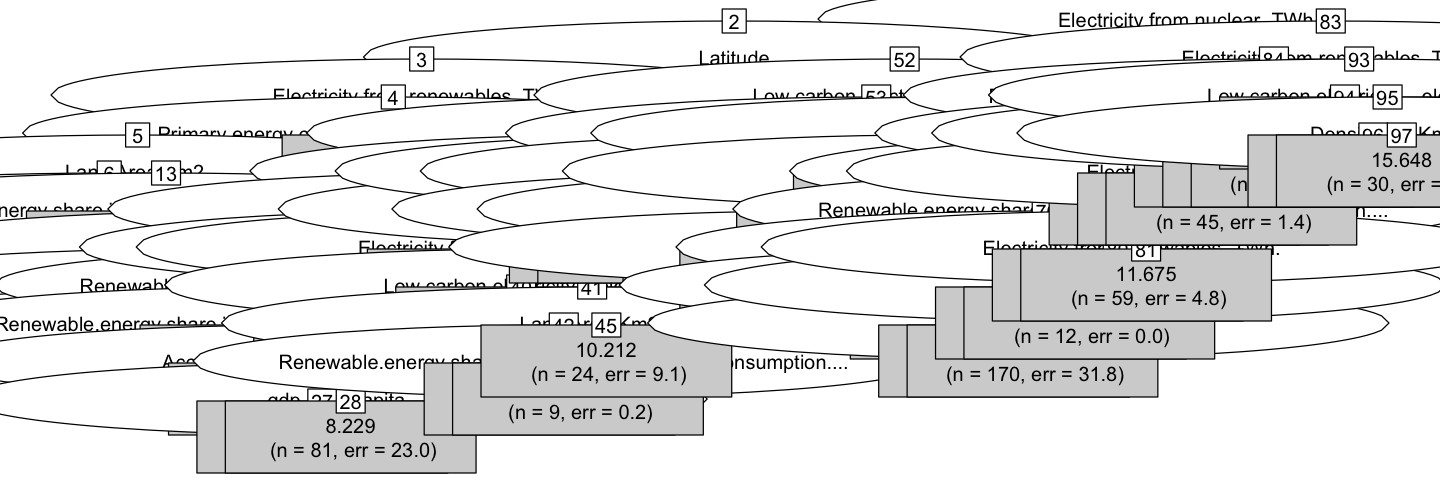

In [70]:
plot(as.party(tree.reg), type="simple")

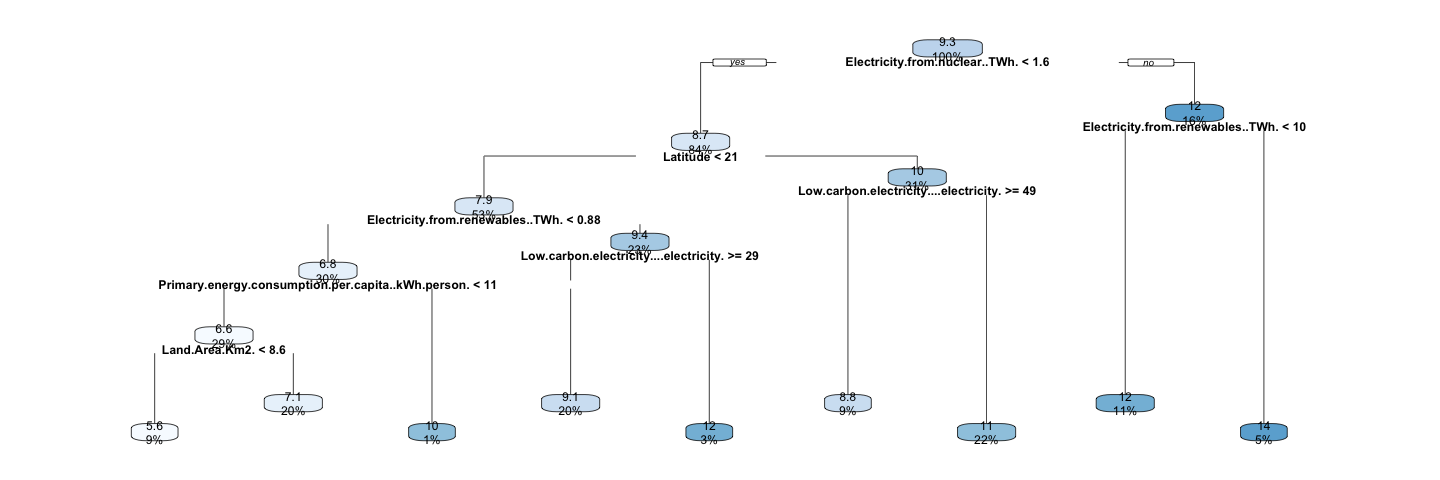

In [71]:
#We plot a simple tree for higher readability. The error is significant, but the tree is easier to read. 
tree.reg.simple=rpart(Value_co2_emissions_kt_by_country~.,data=datatrr,parms=list(split="information"),control=rpart.control(cp=0.02))
rpart.plot(tree.reg.simple)

The above tree has been pruned way more than with the cross validation, it is much simpler to interpret, but it does not capture all the explaining factors for a prediction. We could possibly deduce that electricity from nuclear and renewables have the highest impact on wether a country emits a lot of $CO_2$ in a given year. On the contrary, if a country is on the southern hemisphere (low latitude), has low energy production, low energy consumption and a small land area, it is likely to emit smaller values of $CO_2$. 

In [72]:
#Regression error 
#Computation of the predictions
pred.treer=predict(tree.reg,newdata=datatet)
# Mean squared error in regression
err_tree = sum((pred.treer-datatet[,"Value_co2_emissions_kt_by_country"])^2)/nrow(datatet)
print(err_tree)
#Add ROC curves

[1] 0.2416026


In [73]:
#R2 score
r2_tree <- rsq(Y_test, pred.treer)
paste("R2 score for optimal tree:",r2_tree)

[1] "R2 score for optimal tree: 0.955913463399841"

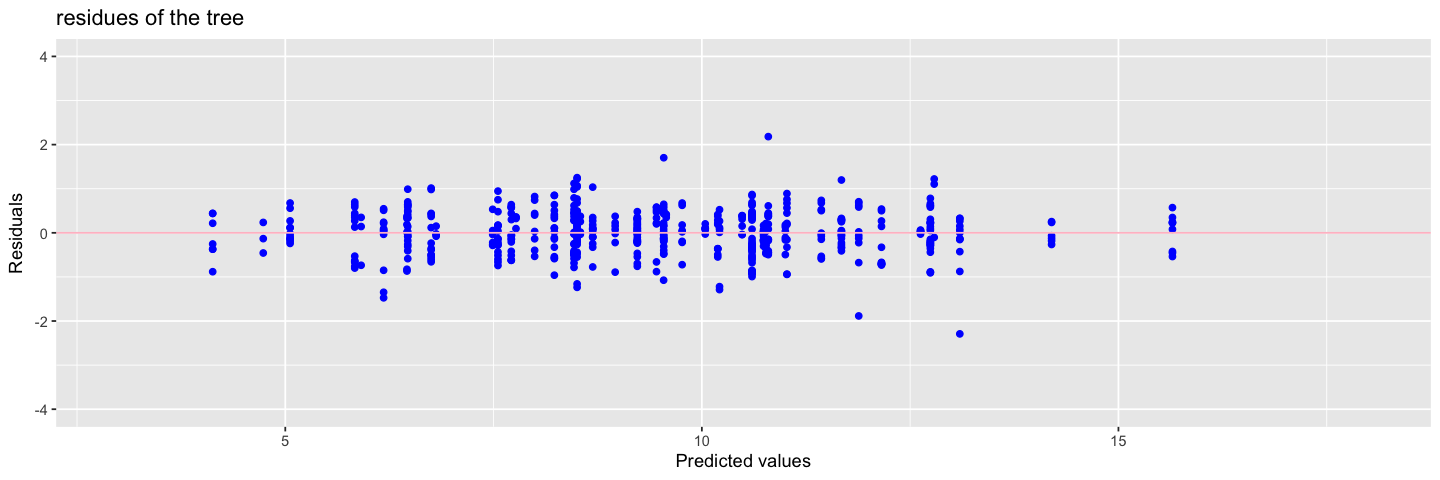

In [74]:
fit.tree=predict(tree.reg)
res.tree=pred.treer-datatet[,"Value_co2_emissions_kt_by_country"]
gplot.res(pred.treer,res.tree,"residues of the tree")

A clear pattern can be observed in the residual plot. This is because multiple observations fall under the same leaf after the final stage, resulting in the same predictions.

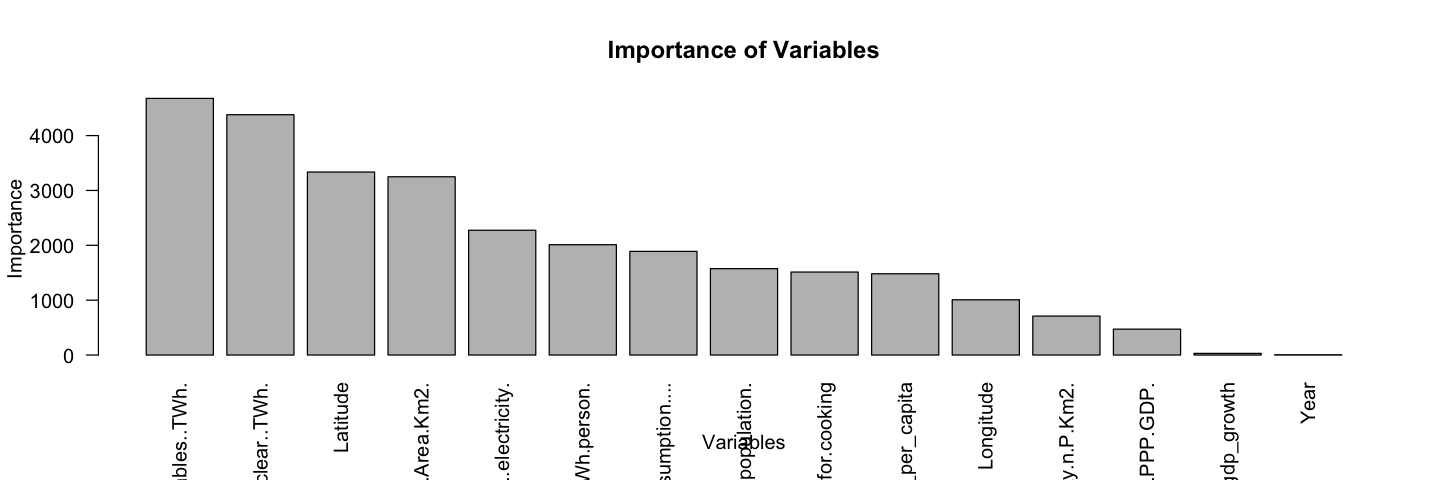

In [75]:
importances <- tree.reg$variable.importance

# Sort the importances and get the corresponding indices
indices <- order(importances, decreasing = TRUE)

# Plot the variable importance
barplot(importances[indices], names.arg = names(importances)[indices], las = 2,
        main = "Importance of Variables", xlab = "Variables", ylab = "Importance")

From the above plot we can see that the most important variable used in the regression is Elictricity form renewables (TWh), twice as important as the second most important variable Latitude. None of the year variables are important to the regression model. This is in line with the interpretation of the highly pruned tree above. 

### Random forest

The random forest regressor uses binary decision trees and bagging (bootstrap aggregation) to make its model. In addition, it introduces randomness to the model which makes it more independent and improves the prediction accuracy of the model. The algorithm works as follows; For each bootstrap sample, a decision tree is estimated, the randomisation takes place in the selection of predictors used in each stage of the construction of the tree. When all of the estimators are made, a mean estimate is calculated of all the values predicted by all the trees in the forest.

The parameters optimised in the grid search are n_estimators and max_features. n_estimators is the number of trees estimated for each bootstrap. max_features is the maximum number of variables chosen randomly for each node. These two variables helps to control the balance between complexity and performance of the final model, i.e., makes sure the model is not overfitted, but sill insures accuracy.


In [76]:
rf.reg=randomForest(Value_co2_emissions_kt_by_country~., data=datatrr,xtest=datatet[,-9],ytest=datatet[,"Value_co2_emissions_kt_by_country"],
   ntree=500,do.trace=50,importance=TRUE)
attributes(rf.reg)
rf.reg$mtry

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |  0.02527     0.44 |  0.04195     0.77 |
 100 |  0.02076     0.36 |  0.04324     0.79 |
 150 |  0.01994     0.35 |  0.04158     0.76 |
 200 |  0.01973     0.34 |  0.04141     0.76 |
 250 |  0.01914     0.33 |   0.0397     0.72 |
 300 |  0.01925     0.34 |  0.04056     0.74 |
 350 |  0.01893     0.33 |  0.03962     0.72 |
 400 |  0.01903     0.33 |  0.03891     0.71 |
 450 |  0.01916     0.33 |  0.03828     0.70 |
 500 |  0.01904     0.33 |  0.03769     0.69 |


$names
 [1] "call"            "type"            "predicted"       "mse"            
 [5] "rsq"             "oob.times"       "importance"      "importanceSD"   
 [9] "localImportance" "proximity"       "ntree"           "mtry"           
[13] "forest"          "coefs"           "y"               "test"           
[17] "inbag"           "terms"          

$class
[1] "randomForest.formula" "randomForest"

[1] 5

In [77]:
#values for ntree and mtry
ntree_values <- c(100, 300, 500, 600, 800)
mtry_values <- c(2, 4, 6, 8, 10)

param_grid <- expand.grid(ntree = ntree_values, mtry = mtry_values)

# Define a function to fit random forest models and calculate MSE
fit_rf <- function(ntree, mtry) {
  rf_model <- randomForest(Value_co2_emissions_kt_by_country~., data=datatrr, ntree = ntree, mtry = mtry)
  mse <- rf_model$mse[ntree]
  return(list(model = rf_model, mse = mse))
}

# Fit random forest models for each combination of ntree and mtry and calculate MSE
rf_results <- lapply(1:nrow(param_grid), function(i) {
  fit_rf(param_grid$ntree[i], param_grid$mtry[i])
})

# Extract the MSE values
mse_values <- sapply(rf_results, function(x) x$mse)

# Find the index of the model with the lowest MSE
best_model_index <- which.min(mse_values)

# Print the best model
best_model <- rf_results[[best_model_index]]
print(best_model$model)


Call:
 randomForest(formula = Value_co2_emissions_kt_by_country ~ .,      data = datatrr, ntree = ntree, mtry = mtry) 
               Type of random forest: regression
                     Number of trees: 800
No. of variables tried at each split: 8

          Mean of squared residuals: 0.01660474
                    % Var explained: 99.71


In [78]:
#tuned model with optimal values for ntree and ntry
rf.reg.cv <- randomForest(Value_co2_emissions_kt_by_country~., data=datatrr, ntree = 500, mtry = 6)

In [79]:
library(ggRandomForests)

Electricity.from.renewables..TWh. 
                                                         3042.30 
                                                  Land.Area.Km2. 
                                                         1832.67 
                                                        Latitude 
                                                         1826.71 
                                  Electricity.from.nuclear..TWh. 
                                                         1779.10 
              Primary.energy.consumption.per.capita..kWh.person. 
                                                          815.57 
                          Low.carbon.electricity....electricity. 
                                                          806.38 
                         Access.to.electricity....of.population. 
                                                          797.19 
Renewable.energy.share.in.the.total.final.energy.consumption.... 
                                                          681.15 
                                                Density.n.P.Km2. 
                                                          380.06 
                                                       Longitude 
                                                          350.66 
                               Access.to.clean.fuels.for.cooking 
                                                          328.24 
                                                  gdp_per_capita 
                                                          261.49 
     Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. 
                                                          172.60 
                                                            Year 
                                                           24.84 
                                                      gdp_growth 
                                                           17.82

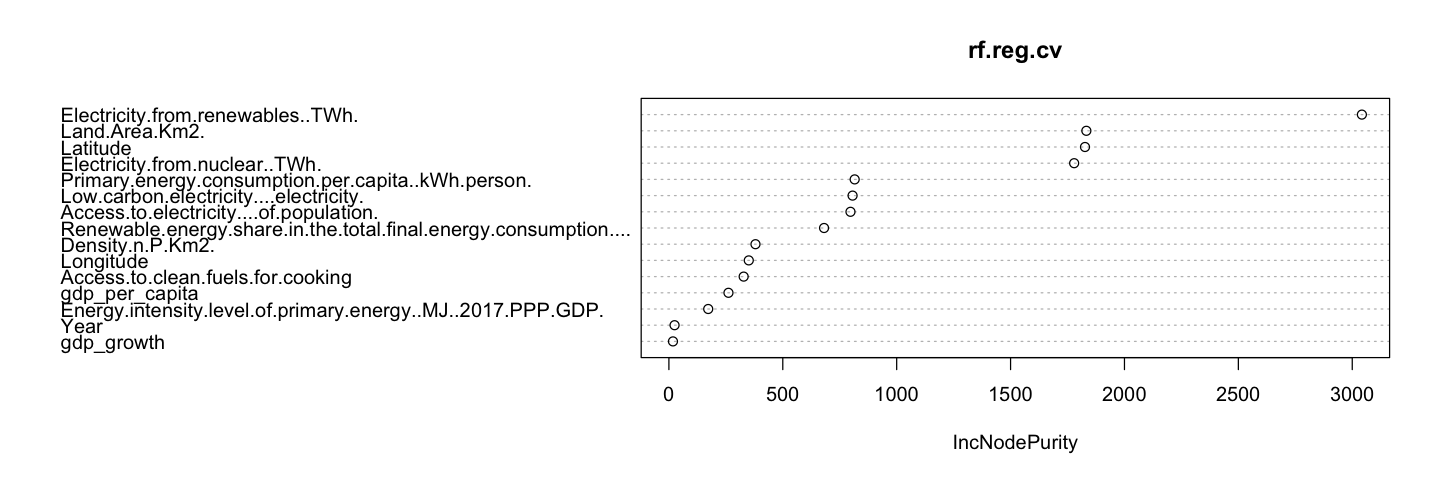

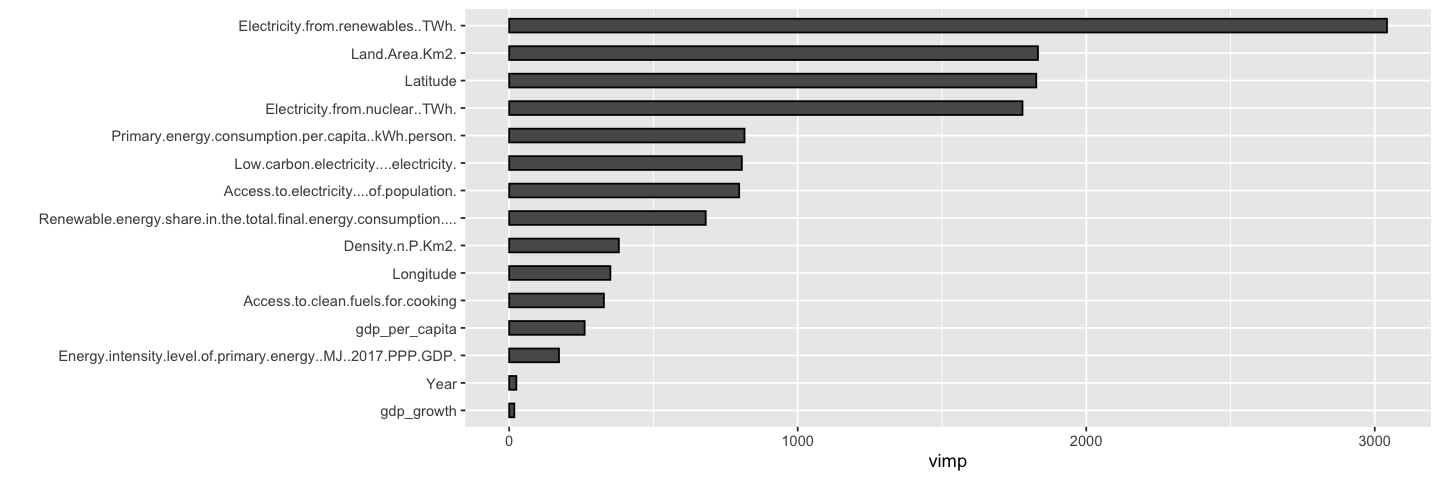

In [80]:
sort(round(importance(rf.reg.cv), 2)[,1], decreasing=TRUE)
varImpPlot(rf.reg.cv)
plot(gg_vimp(rf.reg.cv))

From the above plot we can see that the most important variables used in the random forest regression are Elictricity form renewables (TWh) and Land Area (Km2). Similarly to the decision tree regressor, none of the year variables are important to the regression model. In contrast to the decision tree model, in this model several of the variables are equally important to the model, and one is not much more important than the others as in the decision tree model.

In [81]:
pred_rf <- predict(rf.reg.cv, newdata = datatet)

# Calculate the residuals
residuals_rf <- pred_rf - datatet$Value_co2_emissions_kt_by_country

# Calculate the Mean Squared Error
err_rf <- mean(residuals_rf^2)

# Print the MSE
print(paste("MSE for random forest model:", err_rf))

[1] "MSE for random forest model: 0.013946620183354"


In [82]:
#R2 score
r2_rfr <- rsq(Y_test, pred_rf)
paste("R2 score for random forest:",r2_rfr)

[1] "R2 score for random forest: 0.997455084524397"

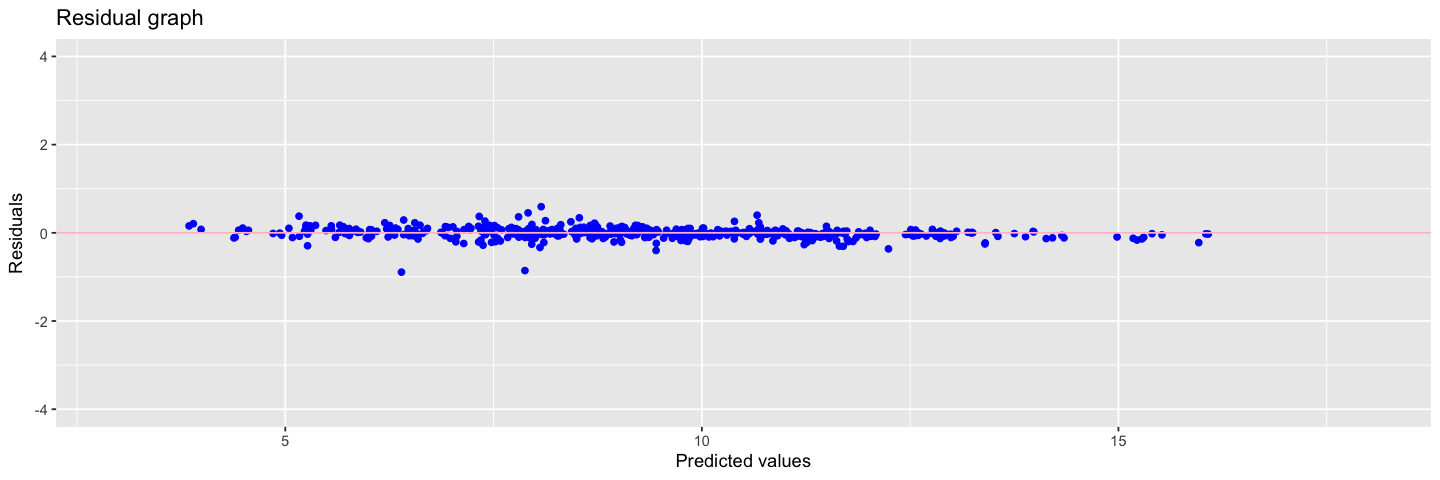

In [83]:
res.rfr=pred_rf-datatet[,"Value_co2_emissions_kt_by_country"]
gplot.res(pred_rf,res.rfr,title="Residual graph")

We se a clear improvment of the residuals, and the MSE and the R2 form the desission tree model to this random forest model.

### Boosting

In addition to reducing the variance as in bagging, aggregation by boosting allows to also reduce thh bias in the model. To make a regression model using boosting we will preform a gradiant boosting model (GBM). In this regression model regression trees are used to calculate the gardient of the loss function we want to reduce.

The parameters optimised for the model is n_estimators, learning_rate, and max_depth. n_estimators is the number of boosting stages to calculate, to high values can lead to overfitting, but i higher value can reduce the training error. The learning_rate is used to shrink the weight of each trees in the algorithim used in shinkage methods to avoid overfitting.

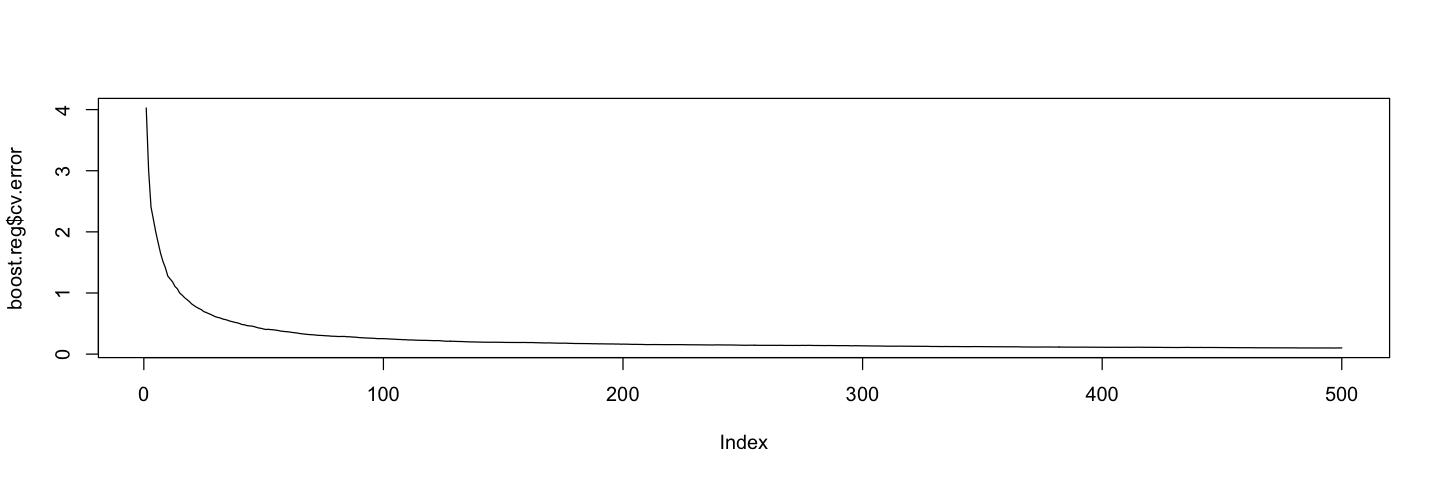

In [84]:
#Justify choice of shrinkage coeff. 
boost.reg = gbm(Value_co2_emissions_kt_by_country ~ ., data = datatrr, distribution = "gaussian", n.trees = 500, 
    cv.folds = 10, n.minobsinnode = 5, shrinkage = 1, verbose = FALSE)
#options(repr.plot.width = 10, repr.plot.height = 8)
# set verbose to FALSE to avoid too many outputs
plot(boost.reg$cv.error, type = "l")

In [85]:
# Define hyperparameter grid
param_grid <- expand.grid(
  n.trees = c(300, 500, 600), # Number of trees
  interaction.depth = c(1, 3, 5, 7), # Maximum depth of tree interactions
  shrinkage = c(0.01, 0.05, 0.1, 0.2, 0.3), # Shrinkage parameter
  n.minobsinnode = c(3, 5, 7, 10) # Minimum number of observations in a terminal node
)

control <- trainControl(method = "cv", number = 10)

# grid search with cross-validation
gbm_grid <- train(
  Value_co2_emissions_kt_by_country ~ ., 
  data = datatrr, 
  method = "gbm", 
  trControl = control,
  tuneGrid = param_grid,
  verbose = FALSE
)

# Print best parameters
print(gbm_grid$bestTune)

    n.trees interaction.depth shrinkage n.minobsinnode
138     600                 7       0.1              5


In [86]:
boost.reg.tuned = gbm(Value_co2_emissions_kt_by_country ~ ., data = datatrr, distribution = "gaussian", n.trees = 600, 
    cv.folds = 10, n.minobsinnode = 7, shrinkage = 0.1, interaction.depth = 7, verbose = FALSE)

var                                                             
Electricity.from.renewables..TWh.                                Electricity.from.renewables..TWh.                               
Latitude                                                         Latitude                                                        
Electricity.from.nuclear..TWh.                                   Electricity.from.nuclear..TWh.                                  
Land.Area.Km2.                                                   Land.Area.Km2.                                                  
Low.carbon.electricity....electricity.                           Low.carbon.electricity....electricity.                          
Primary.energy.consumption.per.capita..kWh.person.               Primary.energy.consumption.per.capita..kWh.person.              
Renewable.energy.share.in.the.total.final.energy.consumption.... Renewable.energy.share.in.the.total.final.energy.consumption....
gdp_per_capita                                                   gdp_per_capita                                                  
Density.n.P.Km2.                                                 Density.n.P.Km2.                                                
Access.to.electricity....of.population.                          Access.to.electricity....of.population.                         
Access.to.clean.fuels.for.cooking                                Access.to.clean.fuels.for.cooking                               
Longitude                                                        Longitude                                                       
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.      Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.     
gdp_growth                                                       gdp_growth                                                      
Year                                                             Year                                                            
                                                                 rel.inf    
Electricity.from.renewables..TWh.                                32.97661697
Latitude                                                         14.26461559
Electricity.from.nuclear..TWh.                                   13.18617514
Land.Area.Km2.                                                   11.18498042
Low.carbon.electricity....electricity.                           10.38017819
Primary.energy.consumption.per.capita..kWh.person.                5.56625961
Renewable.energy.share.in.the.total.final.energy.consumption....  4.46467082
gdp_per_capita                                                    2.53015452
Density.n.P.Km2.                                                  2.04723839
Access.to.electricity....of.population.                           1.44311551
Access.to.clean.fuels.for.cooking                                 0.66902637
Longitude                                                         0.61889317
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.       0.38332726
gdp_growth                                                        0.18906426
Year                                                              0.09568378

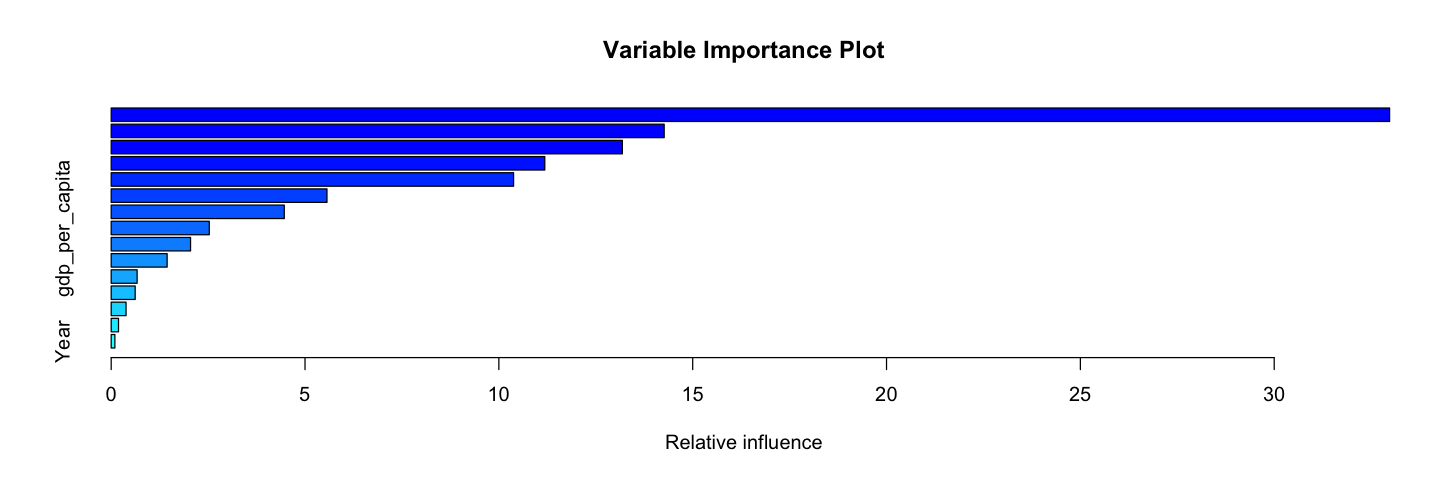

In [87]:
summary(boost.reg.tuned, main = "Variable Importance Plot")

In [88]:
pred.boostr=predict(boost.reg.tuned,newdata=datatet,n.trees=600)
#Mean squared error of prediction
err_boost = sum((pred.boostr-datatet[,"Value_co2_emissions_kt_by_country"])^2)/nrow(datatet)
print(err_boost)

[1] 0.0254158


In [89]:
#R2 score
#fit.boost=boost.reg.tuned$predicted
#fit.boost=predict(boost.reg.tuned,data=datatrr)
r2_boost <- rsq(Y_test, pred.boostr)
paste("R2 score for boosting :",r2_boost)

[1] "R2 score for boosting : 0.995362241622979"

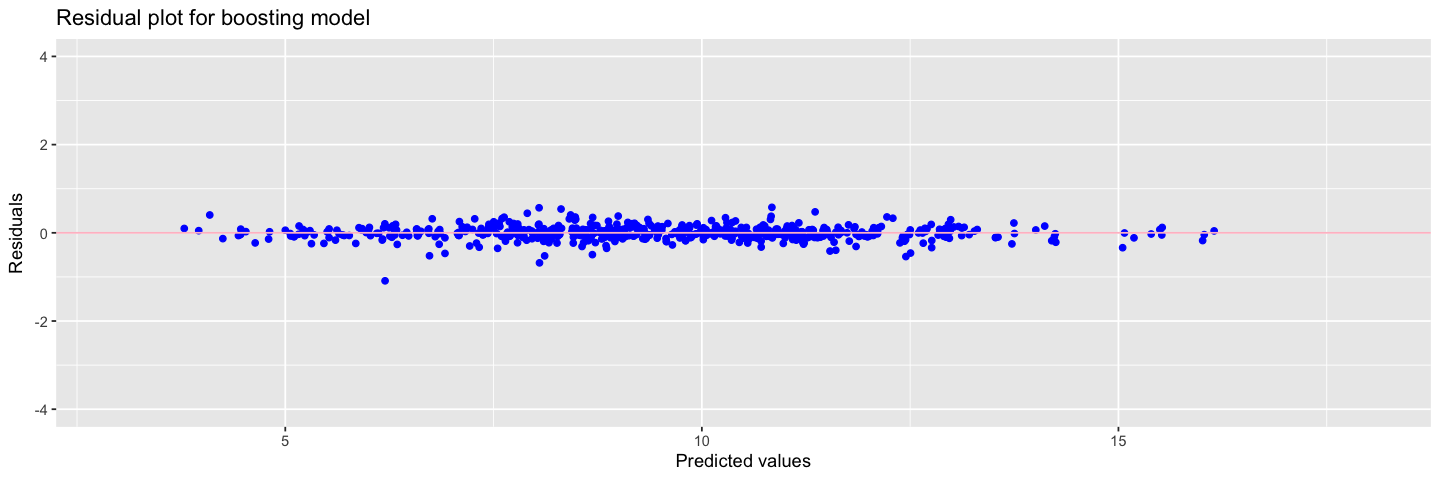

In [90]:
res.boost=pred.boostr-Y_test
gplot.res(pred.boostr,res.boost,title="Residual plot for boosting model")

### Neural networks

In neural networks, the choice of the activation functio for the last neuron depends on the task at hand. For regression tasks, where the output variable is continuous, the typical choice for the transfer function of the last neuron is the identity function. This function simply passes the weighted sum of the inputs without any transformation. In our case, we use a linear activation function (from the command: linout = TRUE) for the output layer. 

The decay parameter in the nnet function in R is a regularization parameter that controls the amount of weight decay applied to the neural network during training. It helps prevent overfitting by penalizing large weights. The default value for the decay parameter is 0, indicating no weight decay. The size parameter represents the number units in the hidden layers. We will optimise the values of size and decay by cross validation. 

We set the max number of animations to 10000.

In [ ]:
#tuning parameter
nnet.reg <-tune.nnet(Value_co2_emissions_kt_by_country~.,data=datatrr,size=c(6, 10, 30),decay=c(0, 0.2, 0.5, 1, 5),maxit=10000,linout=TRUE)
plot(nnet.reg)

In [92]:
best.nnet.reg <- nnet.reg$best.model

In [93]:
#Regression error: 
pred.nnetr=predict(best.nnet.reg,newdata=datatet)
# Mean squared error
err_nn = sum((pred.nnetr-datatet[,"Value_co2_emissions_kt_by_country"])^2)/nrow(datatet)
print(err_nn)

[1] 0.3013805


In [94]:
#R2 score
r2_nn <- rsq(Y_test, pred.nnetr)
paste("R2 score for neural networks :",r2_nn)

[1] "R2 score for neural networks : 0.945005470191524"

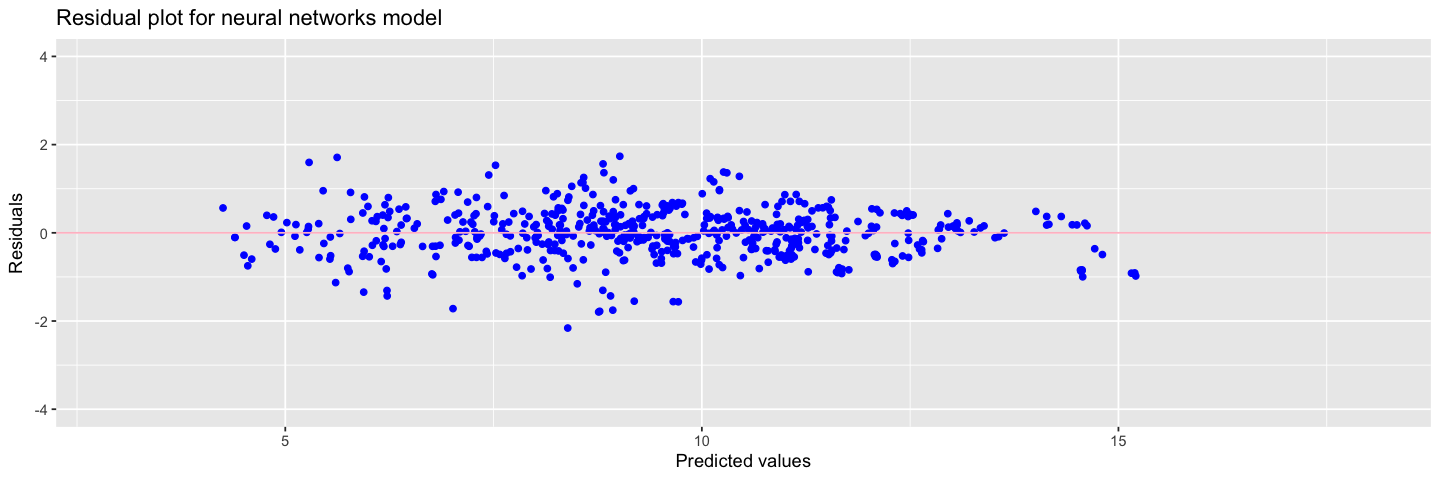

In [95]:
#Residual plot
res.nnetr=pred.nnetr-Y_test
gplot.res(pred.nnetr,res.nnetr,title="Residual plot for neural networks model")

For further study, we could change this activation function to use other activation functions.

## Comparison of performance of the different models

In [96]:
# Create a data frame with model names and mean squared errors
model_errors <- data.frame(
  Model = c("Linear model without selection", "Ridge with lambda.min", "Ridge with lambda.1se", 
            "LASSO with lambda.min", "LASSO with lambda.1se", "K nearest neighbours model", 
            "Support Vector Machine model", "Optimal tree model", "Random forest model", 
            "Boosting model", "Neural network model"),
  Mean_squared_error = c(mean(res.lr^2), mean(res.ridge_min^2), mean(res.ridge_1se^2), 
                         mean(res.lasso^2), mean(res.lasso.1se^2), err_knn, err_svm_radial, 
                         err_tree, err_rf, err_boost, err_nn)
)

# Sort the data frame by Mean_squared_error in ascending order
model_errors_sorted <- model_errors[order(model_errors$Mean_squared_error),]

# Print the sorted list
cat("Mean squared error for the regression models:\n")
for (i in 1:nrow(model_errors_sorted)) {
  cat(model_errors_sorted[i, "Model"], ": ", model_errors_sorted[i, "Mean_squared_error"], "\n")
}


Mean squared error for the regression models:
Random forest model :  0.01394662 
K nearest neighbours model :  0.01400403 
Boosting model :  0.0254158 
Support Vector Machine model :  0.05153645 
Optimal tree model :  0.2416026 
Neural network model :  0.3013805 
Ridge with lambda.min :  0.7664637 
LASSO with lambda.min :  0.7667518 
Linear model without selection :  0.7749085 
LASSO with lambda.1se :  0.797375 
Ridge with lambda.1se :  0.8081376 


In [97]:
# Create a data frame with model names and R2 values
model_r2 <- data.frame(
  Model = c("Linear model without selection", "Ridge with lambda.min", "Ridge with lambda.1se", 
            "LASSO with lambda.min", "LASSO with lambda.1se", "K nearest neighbours model", 
            "Support Vector Machine model", "Optimal tree model", "Random forest model", 
            "Boosting model", "Neural network model"),
  R2_value = c(r2_lr, r2_ridge_min, r2_ridge_1se, r2_lasso_min, r2_lasso_1se, r2_knn, r2_svm_rad, 
               r2_tree, r2_rfr, r2_boost, r2_nn)
)

# Sort the data frame by R2_value in descending order
model_r2_sorted <- model_r2[order(-model_r2$R2_value),]

# Print the sorted list
cat("R2 value for the regression models:\n")
for (i in 1:nrow(model_r2_sorted)) {
  cat(model_r2_sorted[i, "Model"], ": ", model_r2_sorted[i, "R2_value"], "\n")
}


R2 value for the regression models:
Random forest model :  0.9974551 
K nearest neighbours model :  0.9974446 
Boosting model :  0.9953622 
Support Vector Machine model :  0.9905959 
Optimal tree model :  0.9559135 
Neural network model :  0.9450055 
Linear model without selection :  0.8648399 
Ridge with lambda.min :  0.8601392 
LASSO with lambda.min :  0.8600866 
LASSO with lambda.1se :  0.8544986 
Ridge with lambda.1se :  0.8525347 


From these error analyses, we can classify our models into three tiers. 
- $Tier  1:$ that the best performing models are Random Forest and support vector machine. 
- $Tier  2$ The Neural Network, Boosting and Optimal Tree models also work fine. Their error is still less than the linear model without selection 
- $Tier  3$ However, Ridge and LASSO regression. Their errors are worse than the linear model without selection. 

The knn algorithm has very good values for mean squared error and $R^2$, but this is likely due to the fact that it is overfitted. 

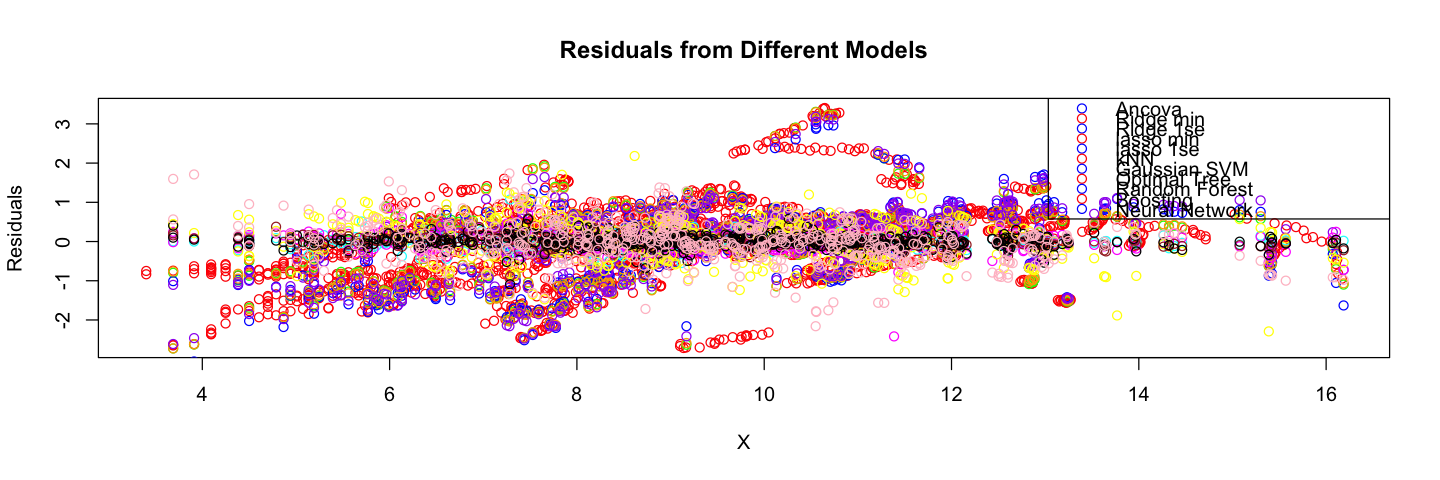

In [98]:
#Comparison des residus
plot(Y_train, res.lr, col = "red", xlab = "X", ylab = "Residuals", main = "Residuals from Different Models") #linear
points(Y_test, res.ridge_min, col = "green") #Ridge min
points(Y_test, res.ridge_1se, col = "blue")#Ridge 1se
points(Y_test, res.lasso, col = "orange")#lasso min
points(Y_test, res.lasso.1se, col = "purple")#lasso 1se
points(Y_test, res.knn, col = "cyan") #knn
points(Y_test, res.svmr, col = "Magenta")# Gaussian svm
points(Y_test, res.tree, col = "Yellow") #Tree
points(Y_test, res.rfr, col = "Brown") #Random forest 
points(Y_test, res.boost, col = "black") #Boosting
points(Y_test, res.nnetr, col = "Pink") #Neural Network 
legend("topright", legend = c("Ancova", "Ridge min","Ridge 1se","lasso min", "lasso 1se", "kNN", "Gaussian SVM",
                        "Optimal Tree", "Random Forest", "Boosting", "Neural Network"), col = c("blue", "red"), pch = 1)

The above plot shows how the residuals for random forest are generally smaller than for the other models. KNN is also better than many of the other ones. We notice that t linear models (Linear regression, Ridge and Lasso) have quite similar residuals, and are often overlaid on the plot.

## Interpretation and feedback on data analysis


We found in the previous question that the Random Forest model best predicted the variable 'Value_co2_emissions_kt_by_country'. Let's now compare it to his interpretations we made in our uni- and multidimensional analysis. 

In the first part of this project, we found that there is not a big dependency between the variable Year and Value_co2_emissions_kt_by_country (Question 8). This can also be observed when we look at the importance of variables in different regression models.(see plot underneath)

Variables we found were important in the making of the regression model where Electricity from renewables (TWh), Land Area (Km2) and Electricity from nuclear (TWh). We found in question 6 that electricity from renewables and electricity from nuclear was positively correlated with the CO2 emissions, electricity from renewables more than electricity from nuclear, this is coherent with what we found when predicting the CO2 emissions. The same can be said for the 'Land Area' varable.

In the PCA analysis we found that the most positively correlated varables to Dimenstion 1 was 'Access to clean fuels for cooking', 'Access to electricity (% of population)', 'Primary energy consmption per capita' and 'gdp per capita'. The possible interpretation was that these were the variables corresponding to countries that are developed. When comparing to the most important  variables in the random forest model, we observe that the variables corresponding to Dimension 2 are the most contributing to 'Value_co2_emissions_kt_by_country'. (Namely production of energy and land area). The machine learning regression models try to explain what variables contribute the most to emitting $CO_2$. This could imply that countries that behave like dimension 2 emit the most $CO_2$. The difference between dimension 2 and the random forest explication is that latitude is highly correlated to emitting $CO_2$, meaning countries in the northern hemisphere tend to emit $CO_2$. 

Looking at the variables that contribute significantly, but not the most to explain 'Value_co2_emissions_kt_by_country' according to random forest, they are: "Primary energy consumption", "Low carbon electricity", "Access to electricity" and "Renewable energy share". They partly correspond to the dimension 1 of the PCA, which could imply that developed countries also emit significant amounts of $CO_2$. 

In conclusion, we can deduce that developed countries and countries that are producers of energy are the ones that emit the most $CO_2$. We saw in the first part that.
- Top 5 emitting countries: China, United States, India, Japan, Germany
- Bottom 5 emitting countries: South Sudan, Djibouti, Somalia, Nauru, Eritrea


Which corresponds globally to our findings. As in the top emitting countries have high land area, are globally developed, in the northern hemisphere and produce energy. 

In [ ]:
#Importance of variables according to the random forest model
plot(gg_vimp(rf.reg.cv))

## Filling in missing values and repeat the modeling

In [99]:
# Variable cible
Y=data_for_Partie2[,"Value_co2_emissions_kt_by_country"]
# Variables explicatives
X=data_for_Partie2[,-c(1)]


 Variables sorted by number of missings: 
                                                         Variable        Count
                                Value_co2_emissions_kt_by_country 0.1172924089
                                                       gdp_growth 0.0868731159
                                                   gdp_per_capita 0.0772814470
      Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. 0.0567278706
 Renewable.energy.share.in.the.total.final.energy.consumption.... 0.0531652508
                                Access.to.clean.fuels.for.cooking 0.0463140586
                                   Electricity.from.nuclear..TWh. 0.0345300082
                           Low.carbon.electricity....electricity. 0.0115100027
                                Electricity.from.renewables..TWh. 0.0057550014
                          Access.to.electricity....of.population. 0.0027404768
                                                 Density.n.P.Km2. 0.0002740477
         

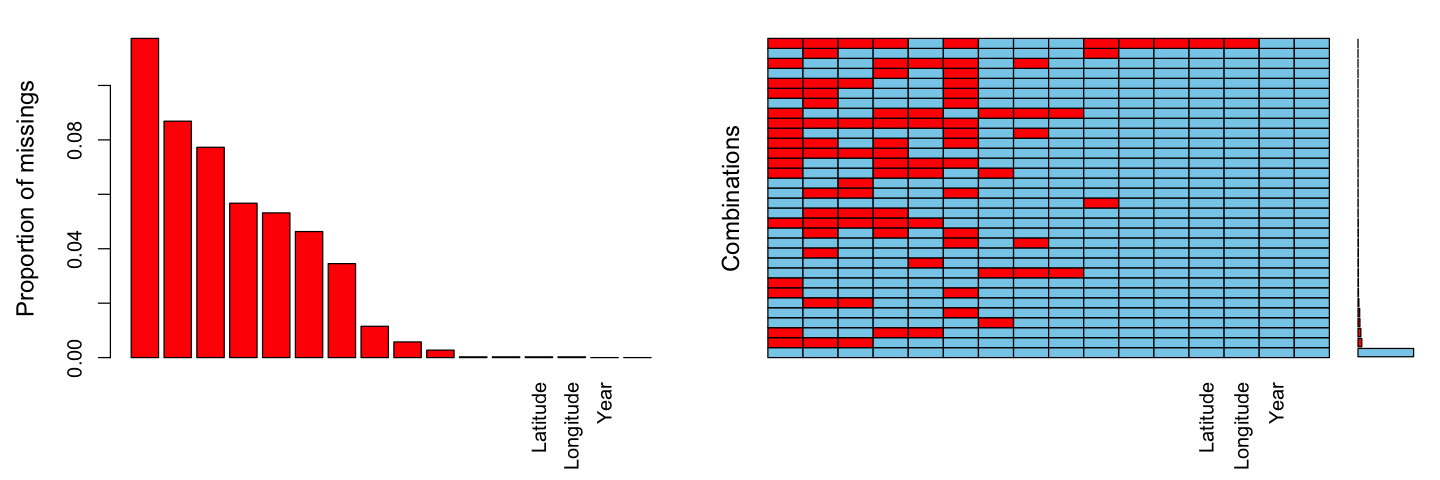

In [100]:
res<-summary(aggr(X, sortVar=TRUE))$combinations

Value_co2_emissions_kt_by_country has the highest amount of missing data, this is also the variable we are seaking to predict.

In [103]:
XImp=missForest(X,verbose=TRUE, maxiter = 300)

  missForest iteration 1 in progress...done!
    estimated error(s): 0.1034079 
    difference(s): 0.009914647 
    time: 28.411 seconds

  missForest iteration 2 in progress...done!
    estimated error(s): 0.07895744 
    difference(s): 3.168521e-05 
    time: 27.992 seconds

  missForest iteration 3 in progress...done!
    estimated error(s): 0.06923043 
    difference(s): 2.611417e-05 
    time: 29.452 seconds

  missForest iteration 4 in progress...done!
    estimated error(s): 0.07235492 
    difference(s): 3.123978e-05 
    time: 27.931 seconds



In [104]:
#Out of bag error
XImp$OOBerror

NRMSE 
0.06923043

NULL

In [105]:
summary(XImp$ximp)

      Year      Access.to.electricity....of.population.
 Min.   :2000   Min.   :  1.252                        
 1st Qu.:2005   1st Qu.: 59.138                        
 Median :2010   Median : 98.265                        
 Mean   :2010   Mean   : 78.762                        
 3rd Qu.:2015   3rd Qu.:100.000                        
 Max.   :2020   Max.   :100.000                        
 Access.to.clean.fuels.for.cooking
 Min.   :  0.00                   
 1st Qu.: 25.90                   
 Median : 85.20                   
 Mean   : 64.67                   
 3rd Qu.:100.00                   
 Max.   :100.00                   
 Renewable.energy.share.in.the.total.final.energy.consumption....
 Min.   : 0.00                                                   
 1st Qu.: 6.72                                                   
 Median :23.68                                                   
 Mean   :32.59                                                   
 3rd Qu.:54.56                   

In [106]:
# Count the number of zeros
num_zeros <- sum(XImp$ximp == 0)
# Print the result
print(paste("Number of zeros in the dataset:", num_zeros))

[1] "Number of zeros in the dataset: 4327"


In [107]:
epsilon = 0.000001
XImp$ximp$Access.to.electricity....of.population. <- sqrt(XImp$ximp$Access.to.electricity....of.population.)
XImp$ximp$Access.to.clean.fuels.for.cooking <- sqrt(XImp$ximp$Access.to.clean.fuels.for.cooking)
XImp$ximp$Electricity.from.nuclear..TWh. <- sqrt(XImp$ximp$Electricity.from.nuclear..TWh.)
XImp$ximp$Electricity.from.renewables..TWh. <- sqrt(XImp$ximp$Electricity.from.renewables.)
XImp$ximp$Value_co2_emissions_kt_by_country <- log(epsilon + XImp$ximp$Value_co2_emissions_kt_by_country)
XImp$ximp$Primary.energy.consumption.per.capita..kWh.person. <- log(epsilon + XImp$ximp$Primary.energy.consumption.per.capita..kWh.person.)
XImp$ximp$gdp_per_capita <- log(epsilon + XImp$ximp$gdp_per_capita)
XImp$ximp$Land.Area.Km2. <- log(epsilon + XImp$ximp$Land.Area.Km2.)

#### Splitting the dataset

Split into train and test of the dataset with imputed values

In [108]:
###
set.seed(529) #initializes the generator
test.ratio <- .2 #proportion of data to be put in the test set
npop <- nrow(XImp$ximp) #number of lines in the dataset
ncol <- ncol(XImp$ximp) #number of columns in the sataset
ntest <- ceiling(npop * test.ratio) #size of the test sample
testi <- sample(1:npop, ntest) #indices of train sample 
traini <- setdiff(1:npop, testi) #indices of train sample

In [109]:
#construction of the samples for regression, quantitative variables
#prediciton of carbon dioxide emissions per person in metric tons, target variable: Value_co2_emissions_kt_by_country
datatr <- XImp$ximp[traini,-c(1) ] #construction of training sample 
datatt <- XImp$ximp[testi, -c(1)] #contruction of test sample
str(datatr) #verification
str(datatt) #verification
#Remove value CO2 emissions eller ikke i R??

'data.frame':	2919 obs. of  15 variables:
 $ Access.to.electricity....of.population.                         : num  1.27 2.02 3.84 5.04 6 ...
 $ Access.to.clean.fuels.for.cooking                               : num  2.49 2.68 3.08 3.49 3.91 ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  45 45.6 36.7 33.9 28.8 ...
 $ Electricity.from.nuclear..TWh.                                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Electricity.from.renewables..TWh.                               : num  0.557 0.707 0.794 0.768 0.866 ...
 $ Low.carbon.electricity....electricity.                          : num  66 84.7 67 63.4 78.9 ...
 $ Primary.energy.consumption.per.capita..kWh.person.              : num  5.71 5.47 5.44 5.53 5.87 ...
 $ Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.     : num  1.64 1.74 1.4 1.41 1.53 1.94 2.25 2.46 2.61 2.46 ...
 $ Value_co2_emissions_kt_by_country                               : num  6.63 6.59 7.11 7.35 7.48 ...
 $ gdp_growth   

In [110]:
Y_train.imp = datatr[, "Value_co2_emissions_kt_by_country"]
Y_test.imp = datatt[, "Value_co2_emissions_kt_by_country"]

#### Random Forest

We will now create a random forest model for the completes data set as this was the model proven to be the most successful according to previous analysis. 


In [111]:
rf.reg=randomForest(Value_co2_emissions_kt_by_country~., data=datatr,xtest=datatt[,-9],ytest=Y_test.imp,
   ntree=500,do.trace=50,importance=TRUE)
attributes(rf.reg)
rf.reg$mtry

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |   0.0756     1.31 |  0.03311     0.59 |
 100 |  0.07747     1.34 |  0.03268     0.58 |
 150 |  0.07337     1.27 |  0.03278     0.58 |
 200 |  0.07218     1.25 |  0.03219     0.57 |
 250 |  0.07043     1.22 |  0.03192     0.57 |
 300 |  0.06934     1.20 |  0.03211     0.57 |
 350 |  0.06985     1.21 |  0.03217     0.57 |
 400 |  0.06938     1.20 |  0.03202     0.57 |
 450 |  0.06965     1.20 |  0.03176     0.56 |
 500 |  0.06884     1.19 |  0.03185     0.56 |


$names
 [1] "call"            "type"            "predicted"       "mse"            
 [5] "rsq"             "oob.times"       "importance"      "importanceSD"   
 [9] "localImportance" "proximity"       "ntree"           "mtry"           
[13] "forest"          "coefs"           "y"               "test"           
[17] "inbag"           "terms"          

$class
[1] "randomForest.formula" "randomForest"

[1] 4

In [112]:
library(randomForest)

# Define the values for ntree and mtry
ntree_values <- c(50, 100, 300, 500, 600, 800)
mtry_values <- c(2, 4, 6, 8, 10)

# Create a data frame with all combinations of ntree and mtry
param_grid <- expand.grid(ntree = ntree_values, mtry = mtry_values)

# Define a function to fit random forest models and calculate MSE
fit_rf <- function(ntree, mtry) {
  rf_model <- randomForest(Value_co2_emissions_kt_by_country~., data=datatr, ntree = ntree, mtry = mtry)
  mse <- rf_model$mse[ntree]
  return(list(model = rf_model, mse = mse))
}

# Fit random forest models for each combination of ntree and mtry and calculate MSE
rf_results <- lapply(1:nrow(param_grid), function(i) {
  fit_rf(param_grid$ntree[i], param_grid$mtry[i])
})
#MSE values
mse_values <- sapply(rf_results, function(x) x$mse)
# Find the index of the model with the lowest MSE
best_model_index <- which.min(mse_values)
# Print the best model
best_model <- rf_results[[best_model_index]]
print(best_model$model)


Call:
 randomForest(formula = Value_co2_emissions_kt_by_country ~ .,      data = datatr, ntree = ntree, mtry = mtry) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 4

          Mean of squared residuals: 0.06368708
                    % Var explained: 98.9


In [113]:
rf.reg.cv.imp <- randomForest(Value_co2_emissions_kt_by_country~., data=datatr, ntree = 500, mtry = 6)

Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_point()`).”


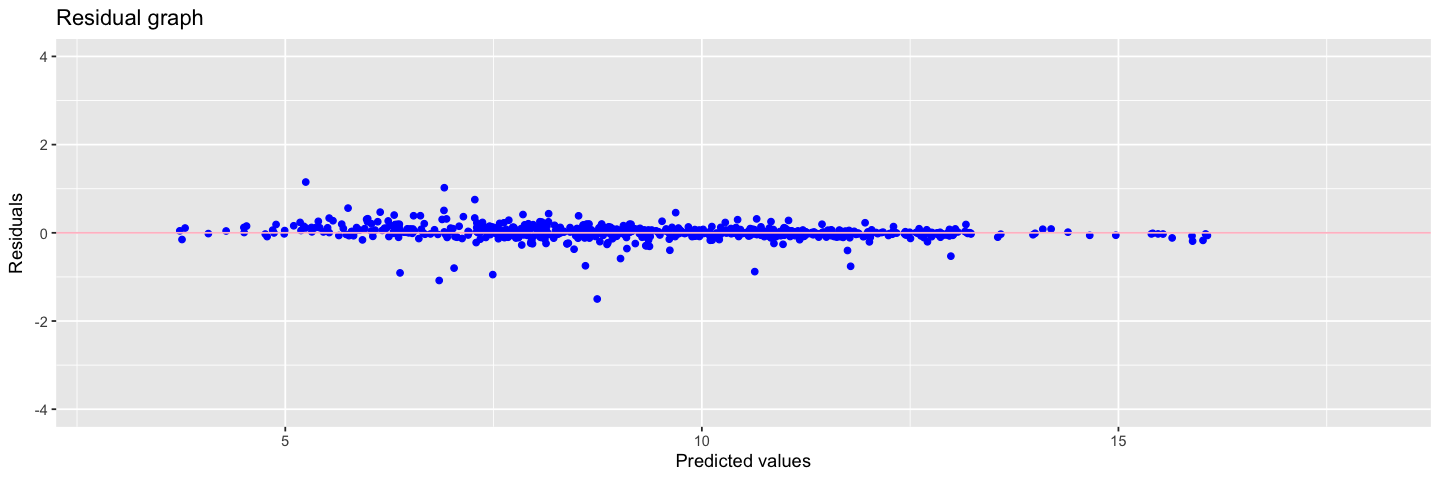

In [114]:
pred_rf <- predict(rf.reg.cv.imp, newdata = datatt)
res.rfr.imp = pred_rf-datatt[,"Value_co2_emissions_kt_by_country"]
gplot.res(pred_rf, res.rfr.imp, title="Residual graph") #, ylim(-2,1))

Land.Area.Km2. 
                                                         3213.94 
                               Electricity.from.renewables..TWh. 
                                                         2808.25 
                                  Electricity.from.nuclear..TWh. 
                                                         2675.14 
                                                        Latitude 
                                                         2120.23 
              Primary.energy.consumption.per.capita..kWh.person. 
                                                         1244.89 
Renewable.energy.share.in.the.total.final.energy.consumption.... 
                                                         1044.58 
                          Low.carbon.electricity....electricity. 
                                                          940.14 
                         Access.to.electricity....of.population. 
                                                          796.57 
                                                       Longitude 
                                                          542.76 
                                                Density.n.P.Km2. 
                                                          540.17 
                               Access.to.clean.fuels.for.cooking 
                                                          444.35 
                                                  gdp_per_capita 
                                                          272.35 
     Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. 
                                                          210.32 
                                                      gdp_growth 
                                                           33.73

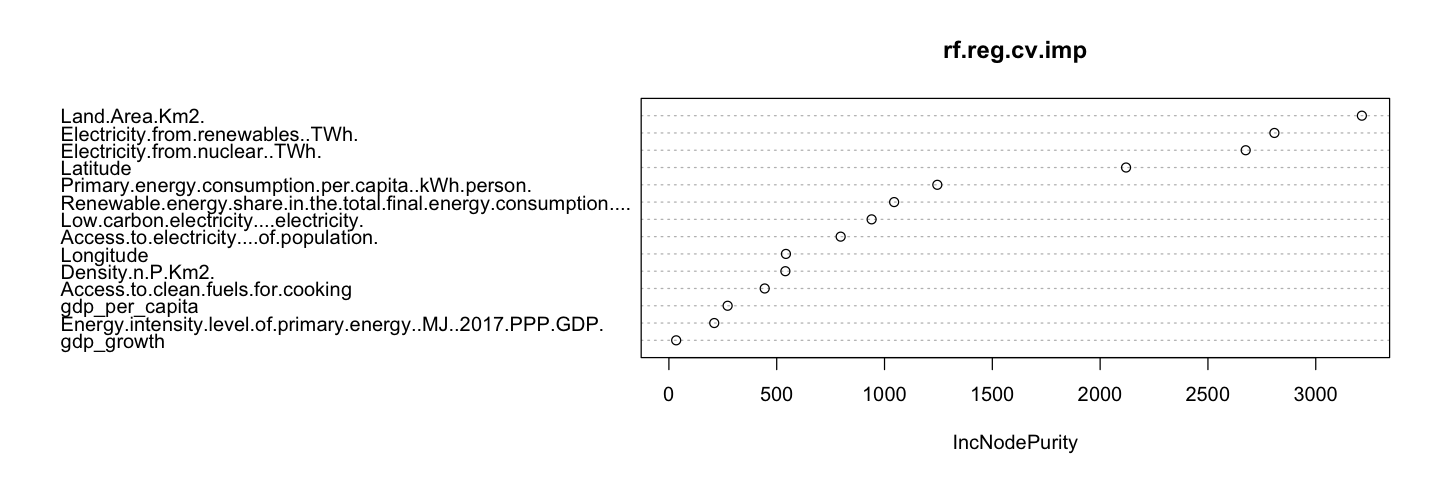

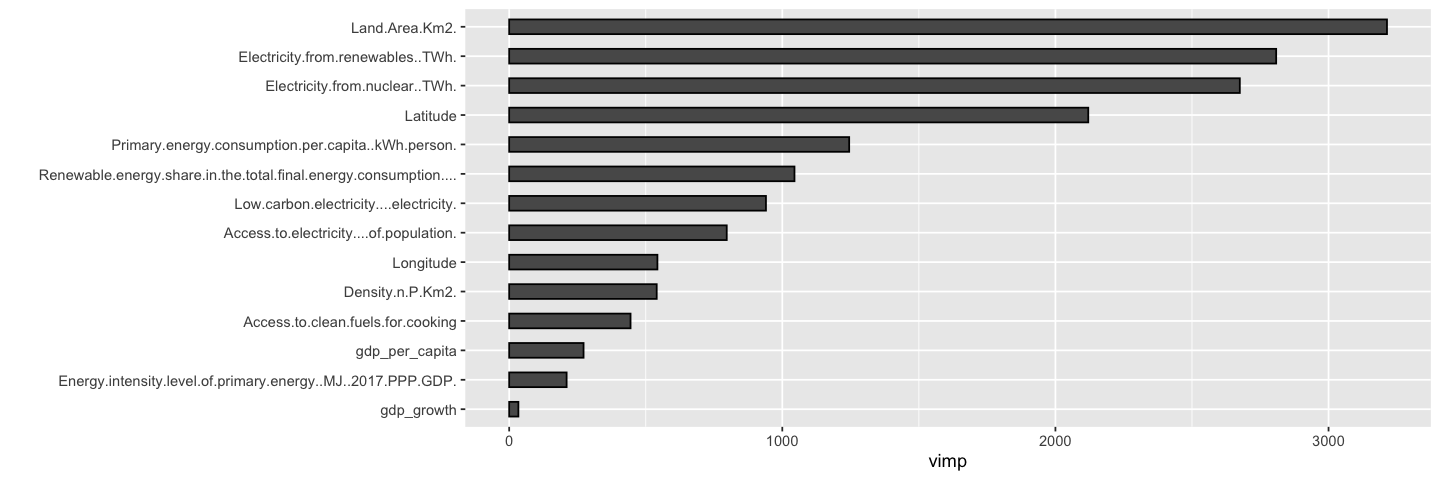

In [115]:
library(ggRandomForests)
sort(round(importance(rf.reg.cv.imp), 2)[,1], decreasing=TRUE)
varImpPlot(rf.reg.cv.imp)
plot(gg_vimp(rf.reg.cv.imp))

#### Comparison with and without imputation of missing values

In [116]:
# Calculate the residuals
paste("Mean Squared Error for the regression models:")
residuals_rf <- pred_rf - datatt$Value_co2_emissions_kt_by_country
# Calculate the Mean Squared Error Random forest
err_rf.imp <- mean(residuals_rf^2)
print(paste("MSE for random forest before completing missing values:", err_rf))
print(paste("MSE for random forest after completing missing values:", err_rf.imp))

[1] "MSE for random forest before completing missing values: 0.013946620183354"
[1] "MSE for random forest after completing missing values: 0.0296911425670554"


In [122]:
#R2 score for Random forest
print("R2 for the regression models:")
r2_knn.imp <- 1 - sum(res.knn.imp^2) / sum((Y_test.imp - mean(Y_test.imp))^2)
paste("R2 for kNN before completing missing values:",r2_knn)
paste("R2 score for kNN after completing missing values:",r2_knn.imp)

[1] "R2 for the regression models:"


[1] "R2 for kNN before completing missing values: 0.99744460896837"

[1] "R2 score for kNN after completing missing values: 0.992840454717209"

[1] "R2 score for random forest before completing missing values: 0.997455084524397"

[1] "R2 score for random forest after completing missing values: 0.994744028626978"

We conclude that the random forest regressor workes well on the imputed dataset, not as well as the original, but still very good. This can be beacouse the missForest algorithim is based on random forest.